# Data analysis with Python

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib as mpl 

import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk

%matplotlib inline 
pd.set_option("display.max_columns", 00) 
pd.set_option("display.max_rows",100) 
plt.style.use("cyberpunk")

import warnings 
warnings.filterwarnings("ignore")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 8
mpl.rcParams["axes.titlepad"] = 25
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [3]:
df = pd.read_csv("weatherAUS.csv") 

In [4]:
df.head()

Date Location  ...  RainToday  RainTomorrow
0  2008-12-01   Albury  ...         No            No
1  2008-12-02   Albury  ...         No            No
2  2008-12-03   Albury  ...         No            No
3  2008-12-04   Albury  ...         No            No
4  2008-12-05   Albury  ...         No            No

[5 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# check null 

pd.DataFrame({"Null":(df.isnull().sum()/df.shape[0]) *100}).sort_values("Null", ascending=False) 

Null
Sunshine       48.009762
Evaporation    43.166506
Cloud3pm       40.807095
Cloud9am       38.421559
Pressure9am    10.356799
Pressure3pm    10.331363
WindDir9am      7.263853
WindGustDir     7.098859
WindGustSpeed   7.055548
Humidity3pm     3.098446
WindDir3pm      2.906641
Temp3pm         2.481094
RainTomorrow    2.245978
Rainfall        2.241853
RainToday       2.241853
WindSpeed3pm    2.105046
Humidity9am     1.824557
Temp9am         1.214767
WindSpeed9am    1.214767
MinTemp         1.020899
MaxTemp         0.866905
Location        0.000000
Date            0.000000

In [7]:
df.duplicated().sum()

0

### target

RainTomorrow
No       0.758394
Yes      0.219146
NaN      0.022460

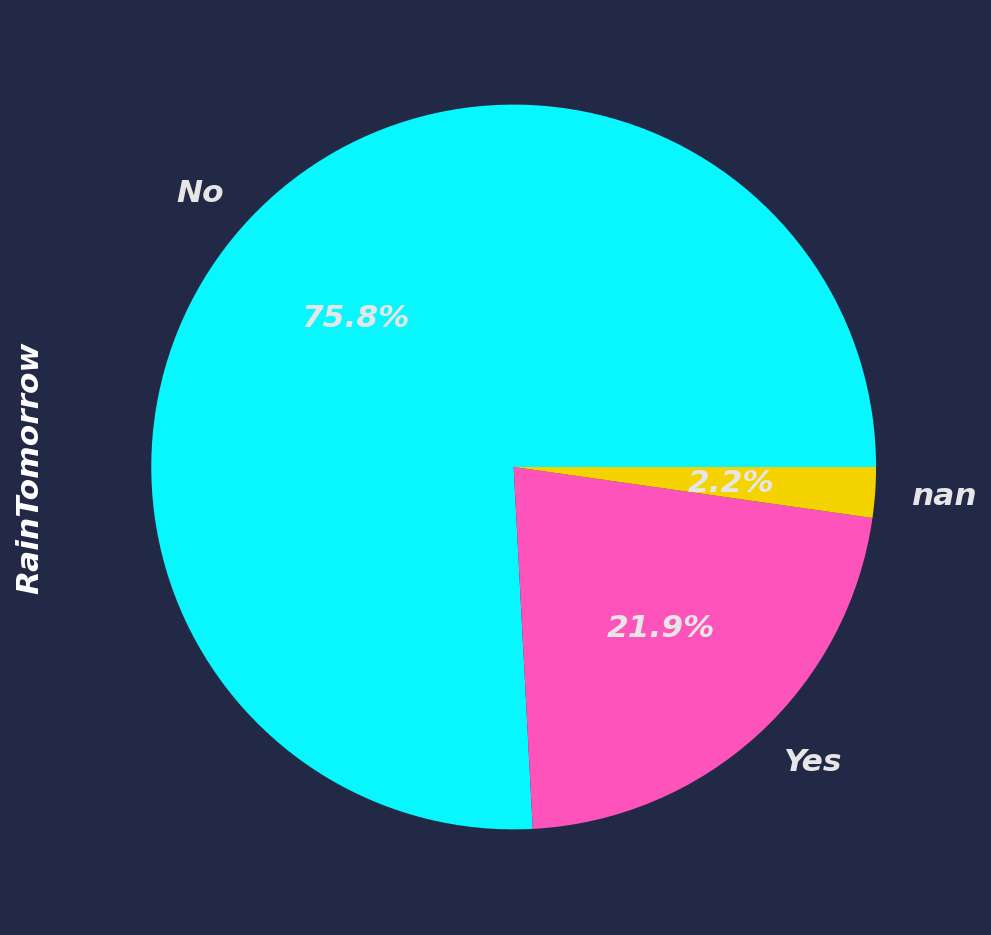

In [8]:
df.RainTomorrow.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False, normalize=True).to_frame() 

In [9]:
# drop na of RainTomorrow

df.dropna(subset=["RainTomorrow"], inplace=True) 

In [10]:
# ubah format nilai RainTomorrow ke int 
rain = {"Yes":1,"No":0}

df.RainTomorrow = df.RainTomorrow.replace(rain).astype("int") 

RainTomorrow
0      0.775819
1      0.224181

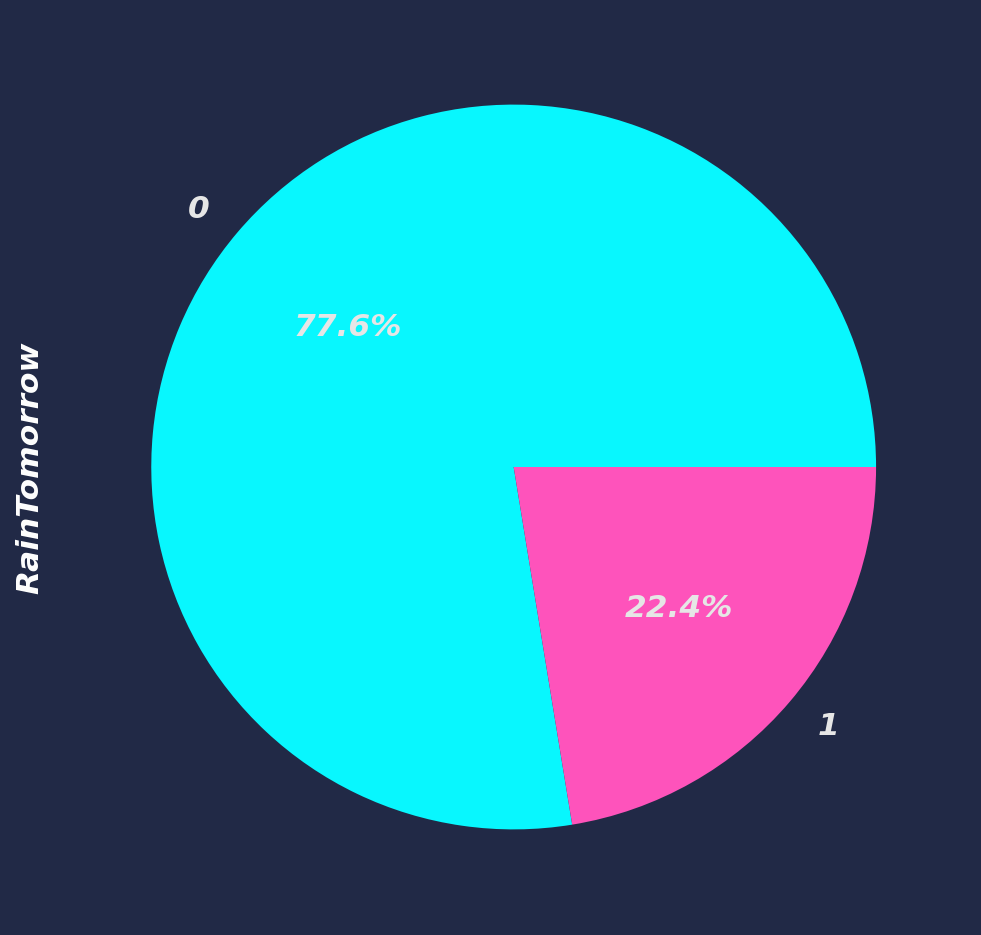

In [11]:
# after dropna 

df.RainTomorrow.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False, normalize=True).to_frame() 

## Univariat analysis & Bivariat Analysis

In [12]:
# pisahkan sesuai kategori

In [13]:
cater = df.select_dtypes("object").columns
number = df.select_dtypes("number").columns

## Categorical features

In [14]:
df[cater].describe()

Date  Location  ... WindDir3pm RainToday
count       142193    142193  ...     138415    140787
unique        3436        49  ...         16         2
top     2013-04-10  Canberra  ...         SE        No
freq            49      3418  ...      10663    109332

[4 rows x 6 columns]

### Date 

In [15]:
df["Date"] = pd.to_datetime(df.Date) 

In [16]:
date = df.Date.dt.strftime("%Y-%m") 

Text(0, 0.5, 'RainTomorrow ')

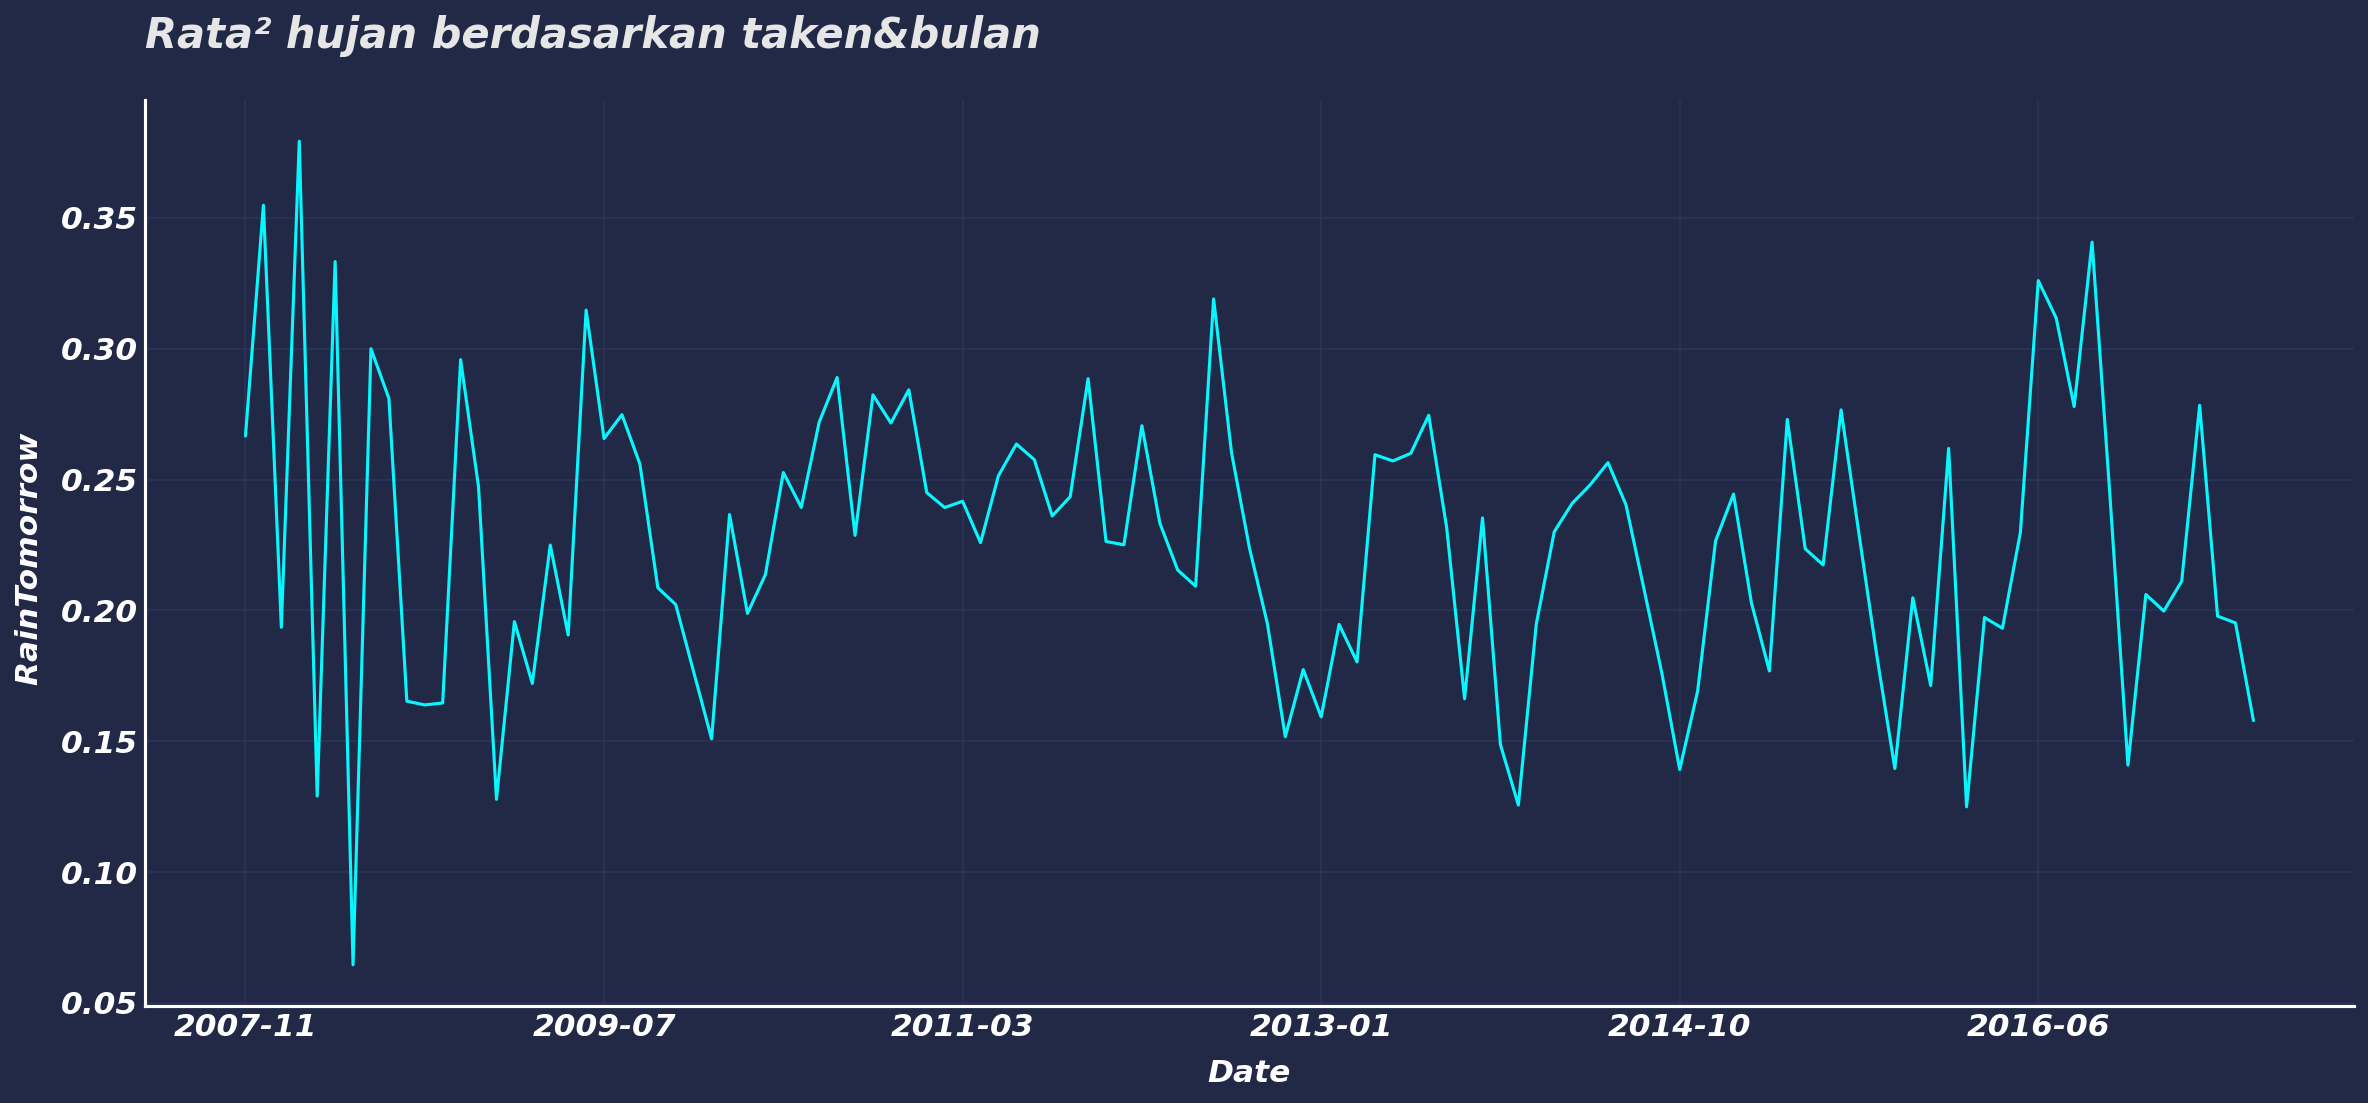

In [17]:
df.groupby(date)["RainTomorrow"].mean().plot(figsize=(19, 8)) 
plt.title("Rata² hujan berdasarkan taken&bulan") 
plt.xlabel("Date") 
plt.ylabel("RainTomorrow ") 

In [18]:
# extract year from date

In [19]:
# extract year from date 
year = df.Date.dt.year

In [20]:
year.value_counts().sort_index().to_frame()

Date
2007     61
2008   2246
2009  16595
2010  16419
2011  15126
2012  15044
2013  16097
2014  17400
2015  17231
2016  17508
2017   8466

Text(0.5, 0, 'Years')

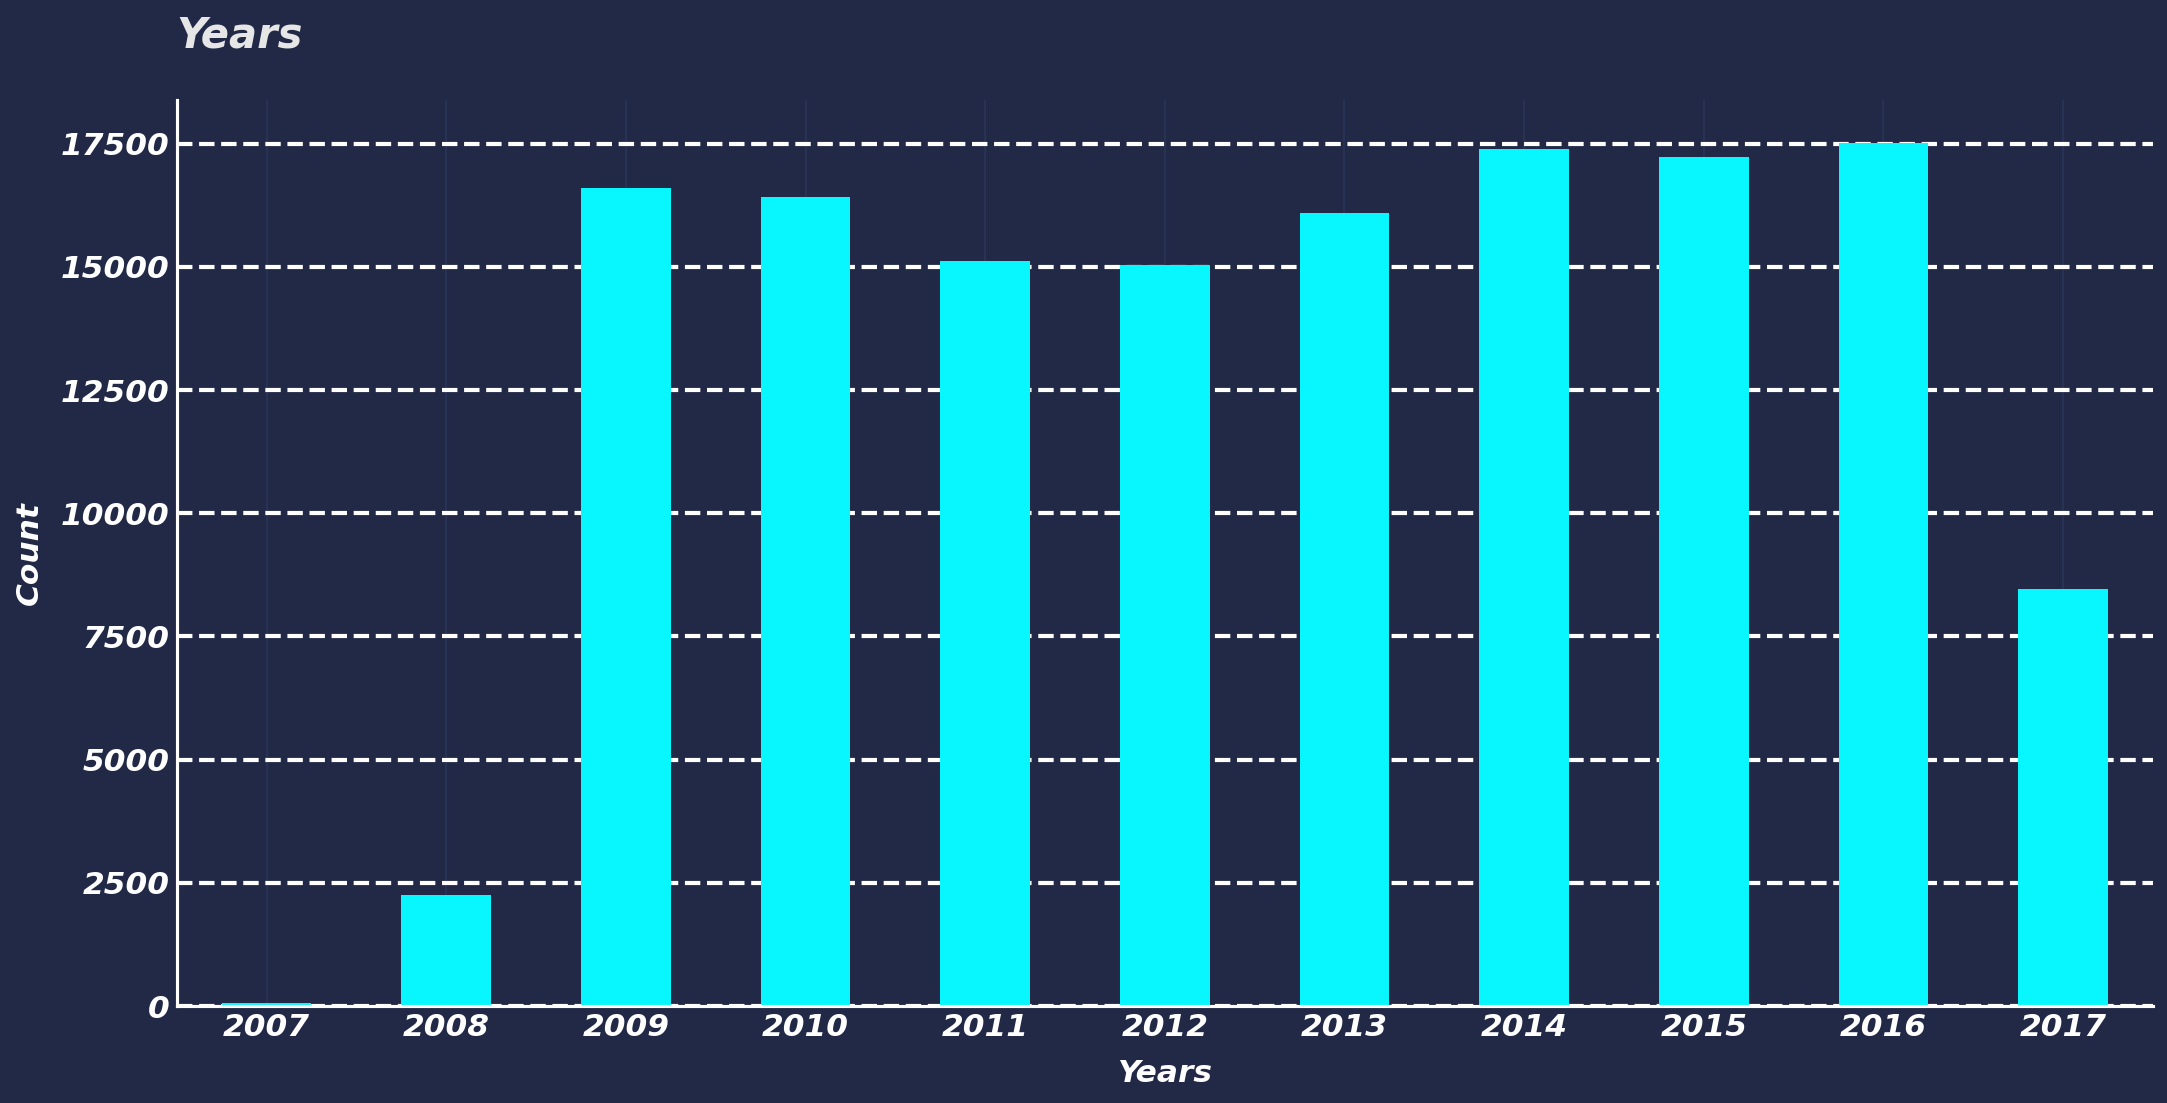

In [21]:
# plot 
year.value_counts().sort_index().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Years") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Years")


In [22]:
# rata² hujan berdasarkan year 

df.groupby(year)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

Text(0.5, 0, 'Years')

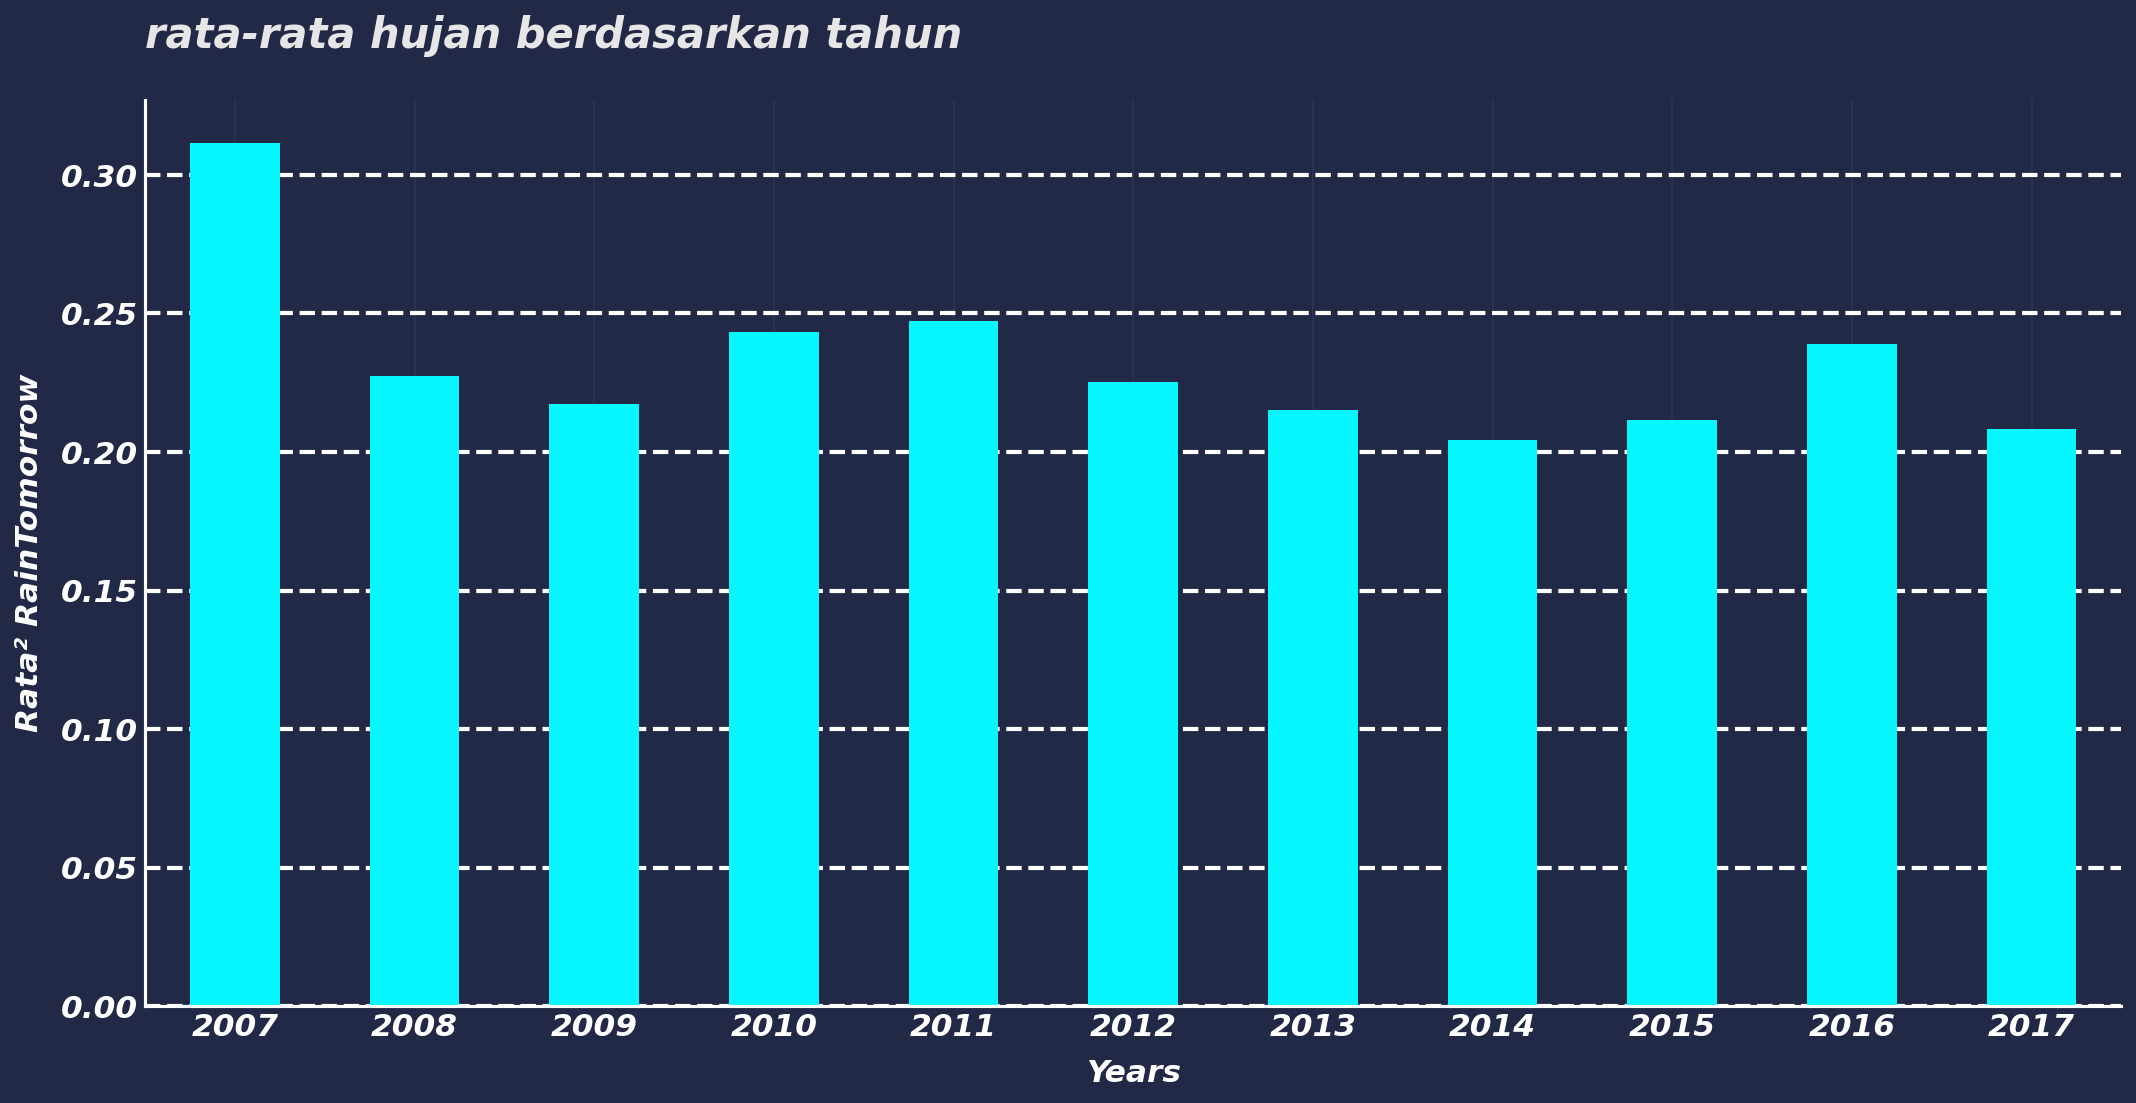

In [23]:
# plot 
df.groupby(year)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan tahun") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Years")


In [ ]:
# rata RainTomorrow ter banyak ada di tahun  2007


In [25]:
df["Years"] = df.Date.dt.year.astype("object") 

In [26]:
# filter 2007
df.query("Years == 2007")["RainTomorrow"].value_counts().to_frame() 

RainTomorrow
0            42
1            19

In [27]:
df.Years.describe()

count     142193
unique        11
top         2016
freq       17508
Name: Years, dtype: int64

In [29]:
# binning years untuk mencegah high cardinality

bins = [2007,2010, 2012,2017]
year_bin = pd.cut(df.Years, bins=bins) 

In [30]:
year_bin.value_counts()

(2012, 2017]    76702
(2007, 2010]    35260
(2010, 2012]    30170
Name: Years, dtype: int64

In [31]:
df.groupby(year_bin)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

In [ ]:
# extract months

In [32]:
months = df.Date.dt.month.astype("object") 

In [33]:
months.describe()

count     142193
unique        12
top            5
freq       13055
Name: Date, dtype: int64

In [34]:
months.value_counts().sort_index().to_frame() 

Date
1   12921
2   10525
3   13036
4   11306
5   13055
6   12389
7   11779
8   11762
9   11345
10  11804
11  11461
12  10810

Text(0.5, 0, 'Months')

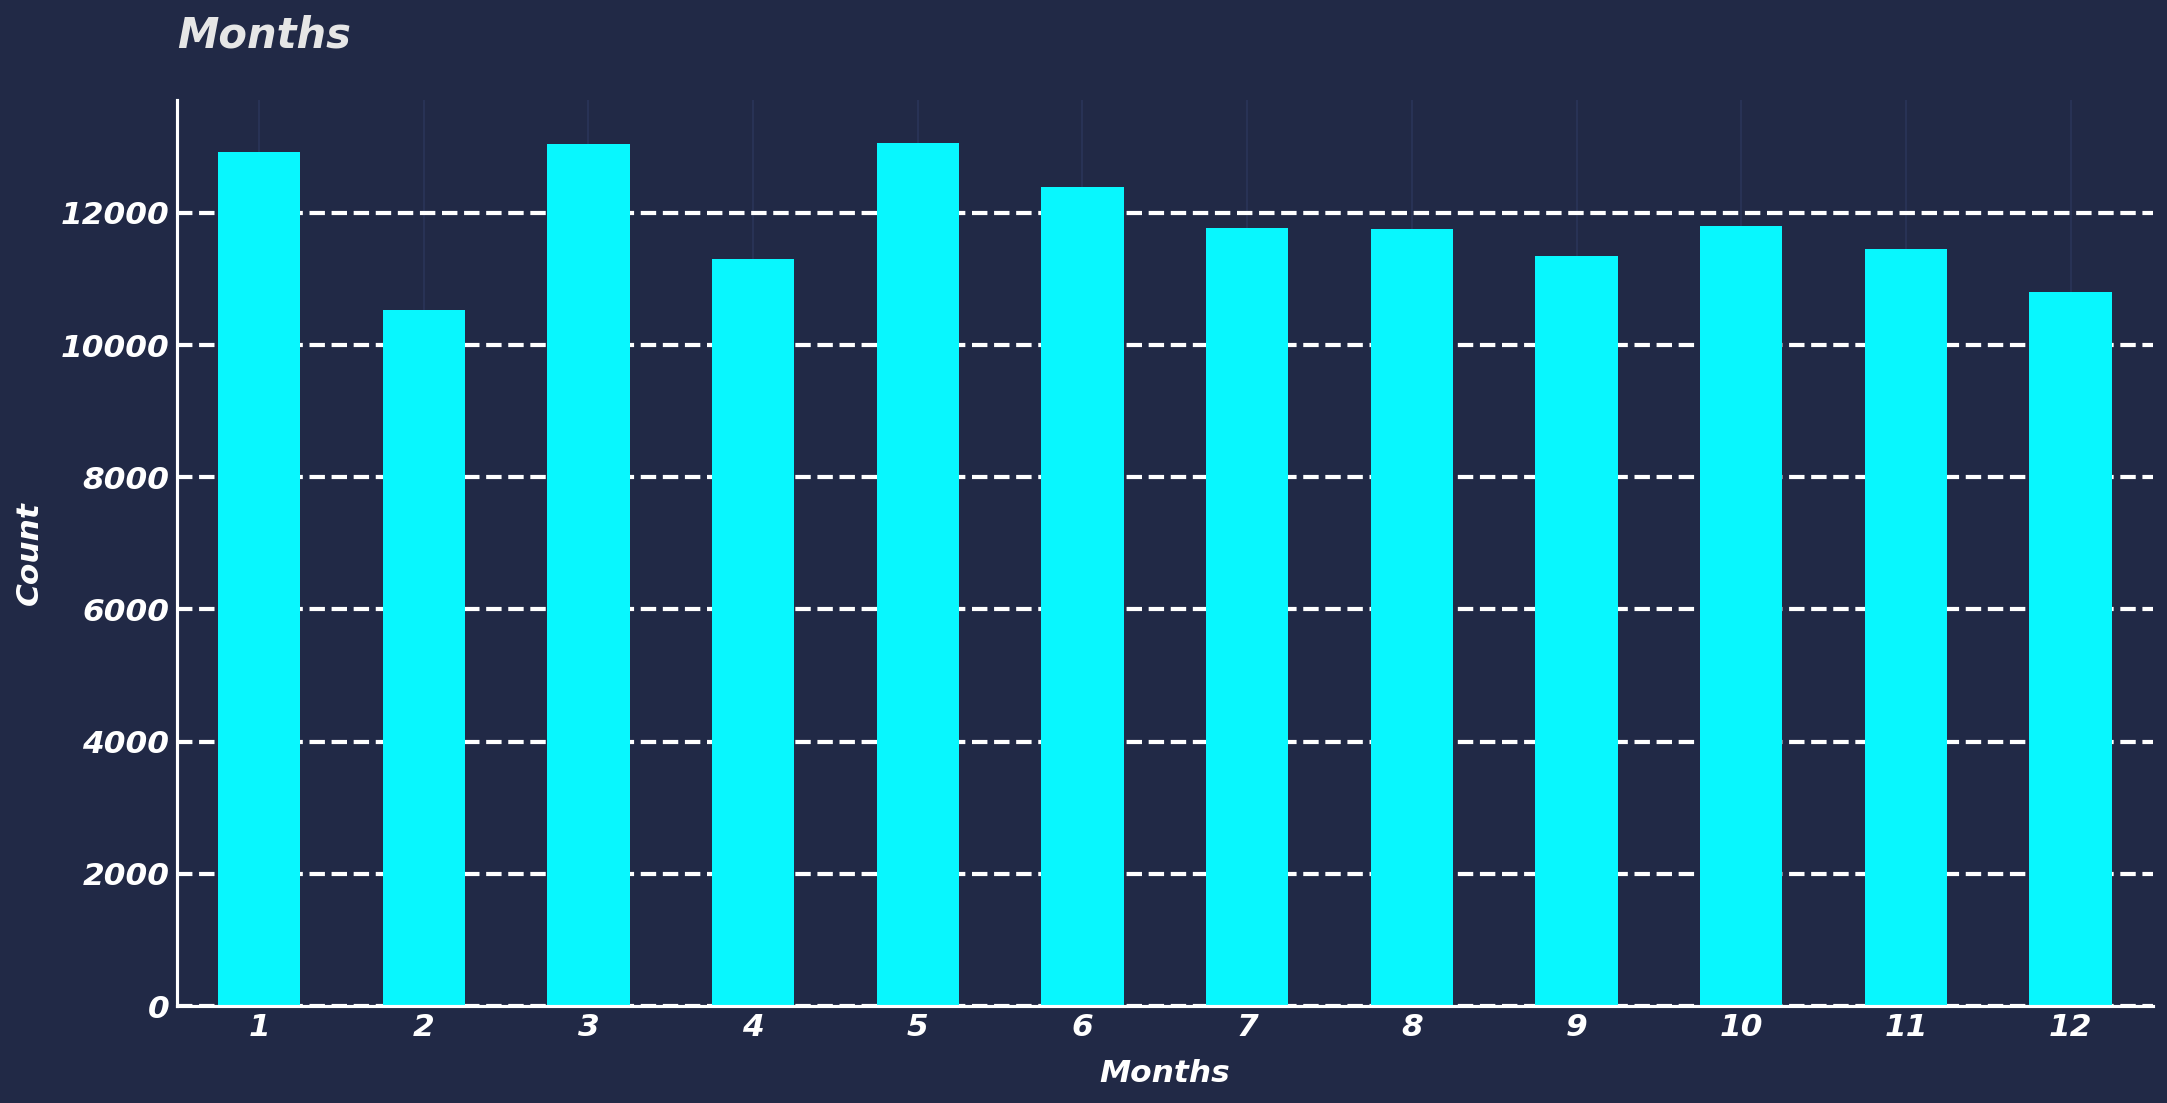

In [35]:
# plot 
months.value_counts().sort_index().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Months") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Months")


In [36]:
# rata² hujan berdasarkan bulan 

df.groupby(months)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

Text(0.5, 0, 'Months')

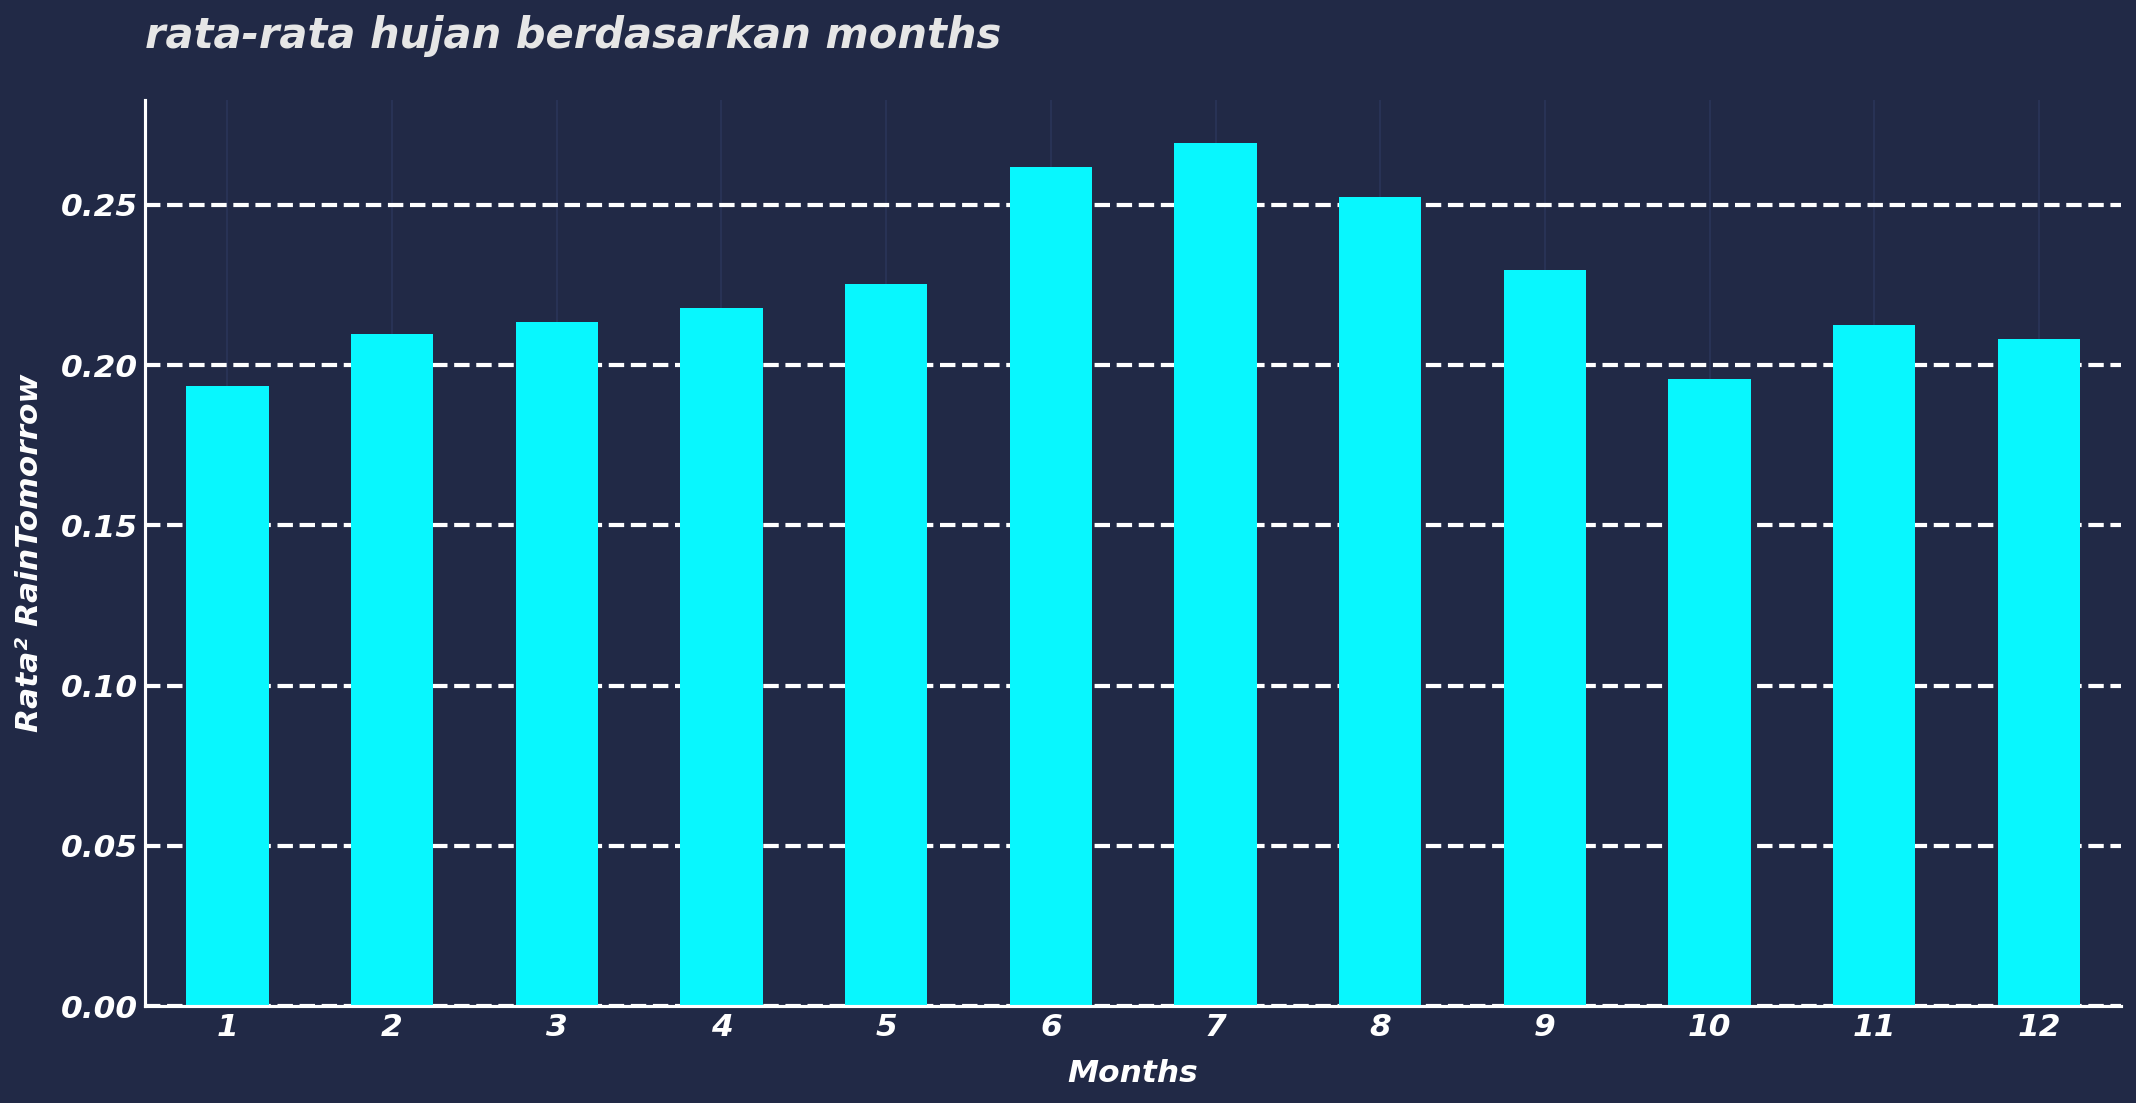

In [37]:
# plot 
df.groupby(months)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan months") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Months")


In [38]:
df["Months"] = df.Date.dt.month.astype("object") 

In [ ]:
# extract tanggal

In [39]:
# extract tanggal 

tgl = df.Date.dt.day.astype("object") 

In [40]:
tgl.describe()

count     142193
unique        31
top            1
freq        4688
Name: Date, dtype: int64

In [41]:
tgl.value_counts().sort_index() 

1     4688
2     4686
3     4683
4     4674
5     4667
6     4684
7     4680
8     4671
9     4672
10    4664
11    4668
12    4682
13    4686
14    4677
15    4688
16    4687
17    4671
18    4665
19    4676
20    4675
21    4677
22    4684
23    4672
24    4666
25    4665
26    4637
27    4627
28    4630
29    4374
30    4280
31    2737
Name: Date, dtype: int64

In [42]:
# rata² hujan berdasarkan tanggal

df.groupby(tgl)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

In [43]:
df["date"] = df.Date.dt.day.astype("object")

In [ ]:
#extract hari 

In [44]:
days = df.Date.dt.day_name() 

In [45]:
days.describe() 

count     142193
unique         7
top       Sunday
freq       20489
Name: Date, dtype: object

In [46]:
days.value_counts().to_frame()

Date
Sunday     20489
Wednesday  20478
Monday     20445
Tuesday    20426
Thursday   20298
Saturday   20065
Friday     19992

Text(0.5, 0, 'Days')

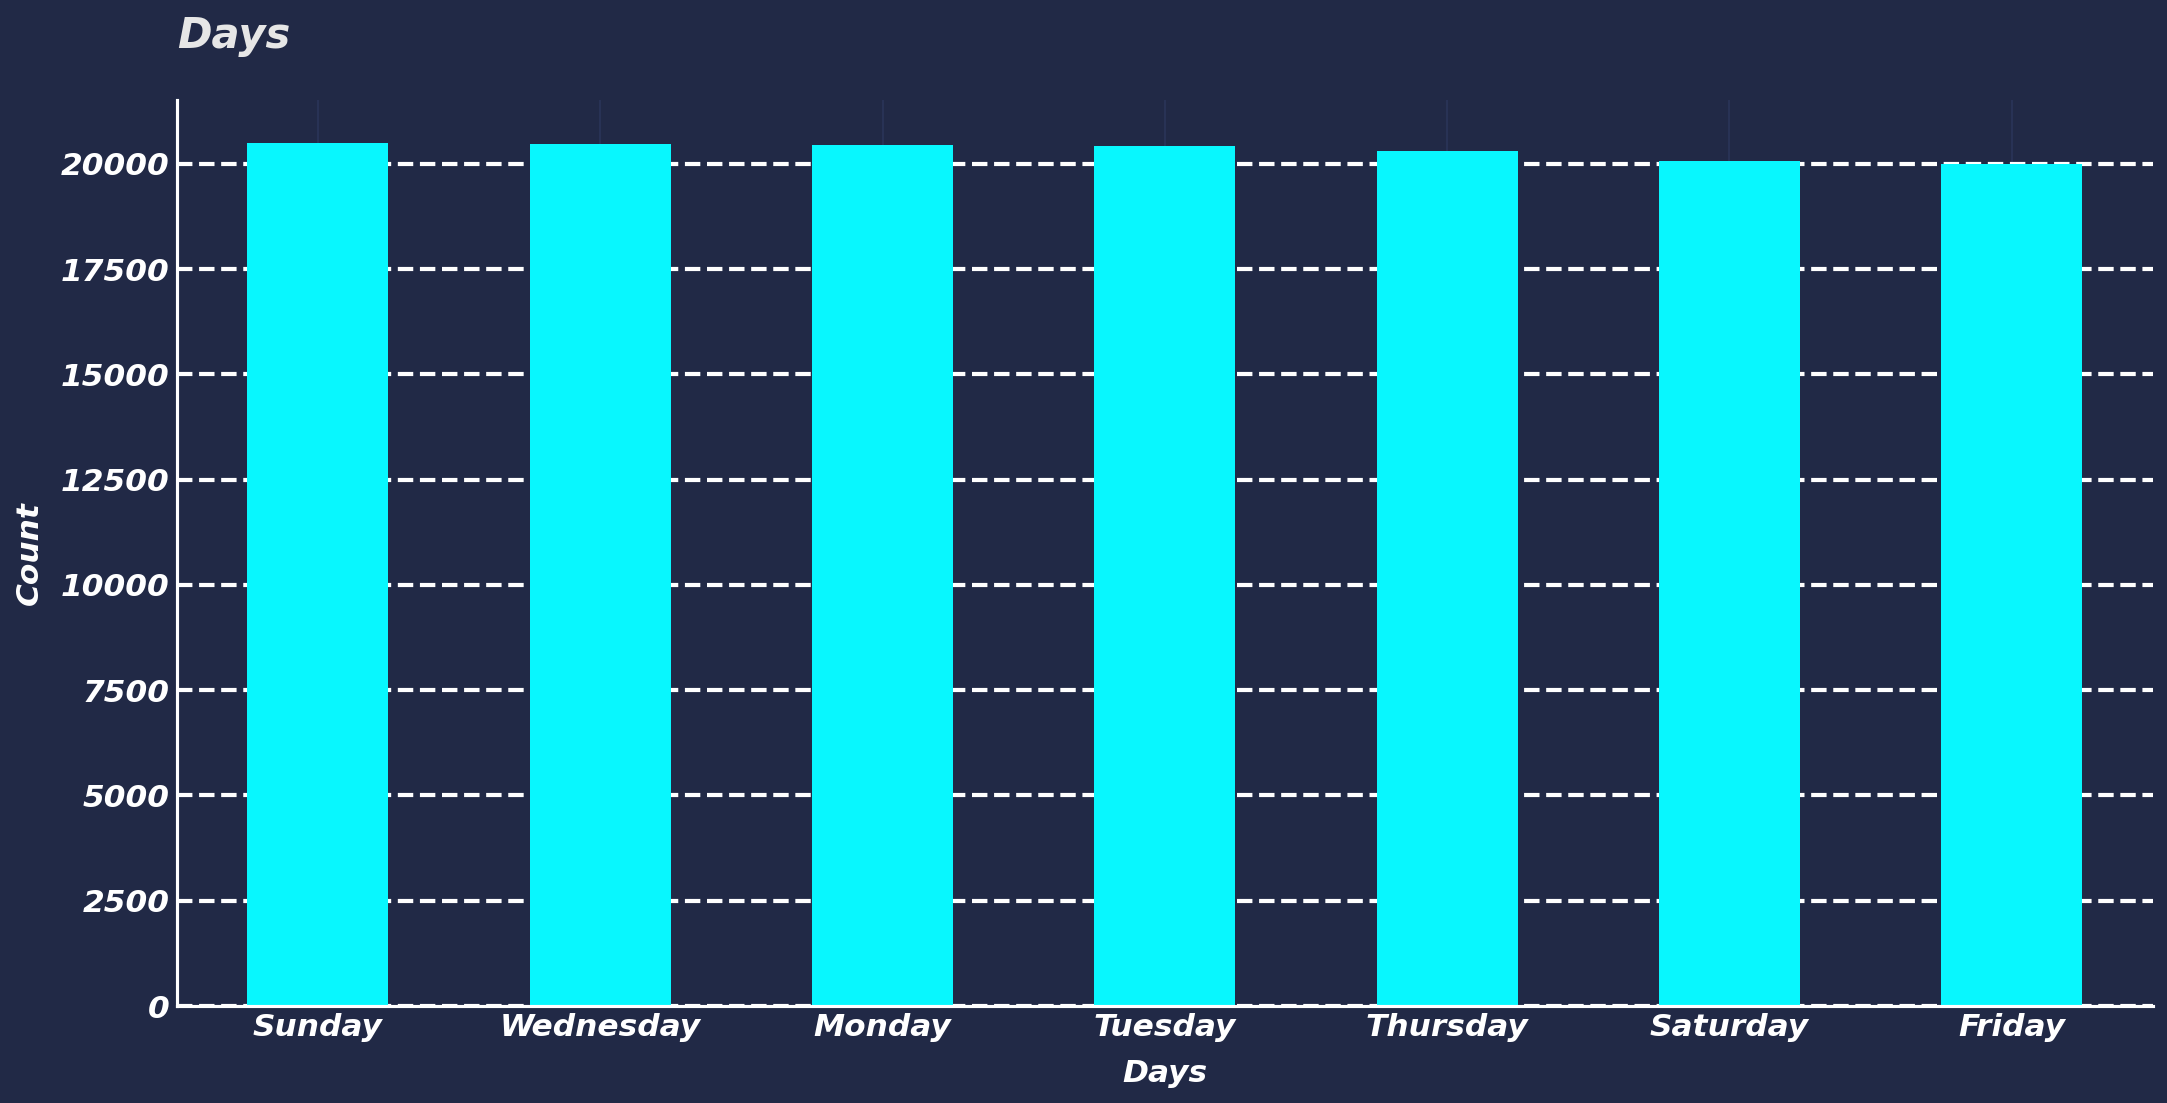

In [47]:
# plot 
days.value_counts().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Days") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("Days")


In [48]:
# rata² hujan berdasarkan hari

df.groupby(days)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

Text(0.5, 0, 'Days')

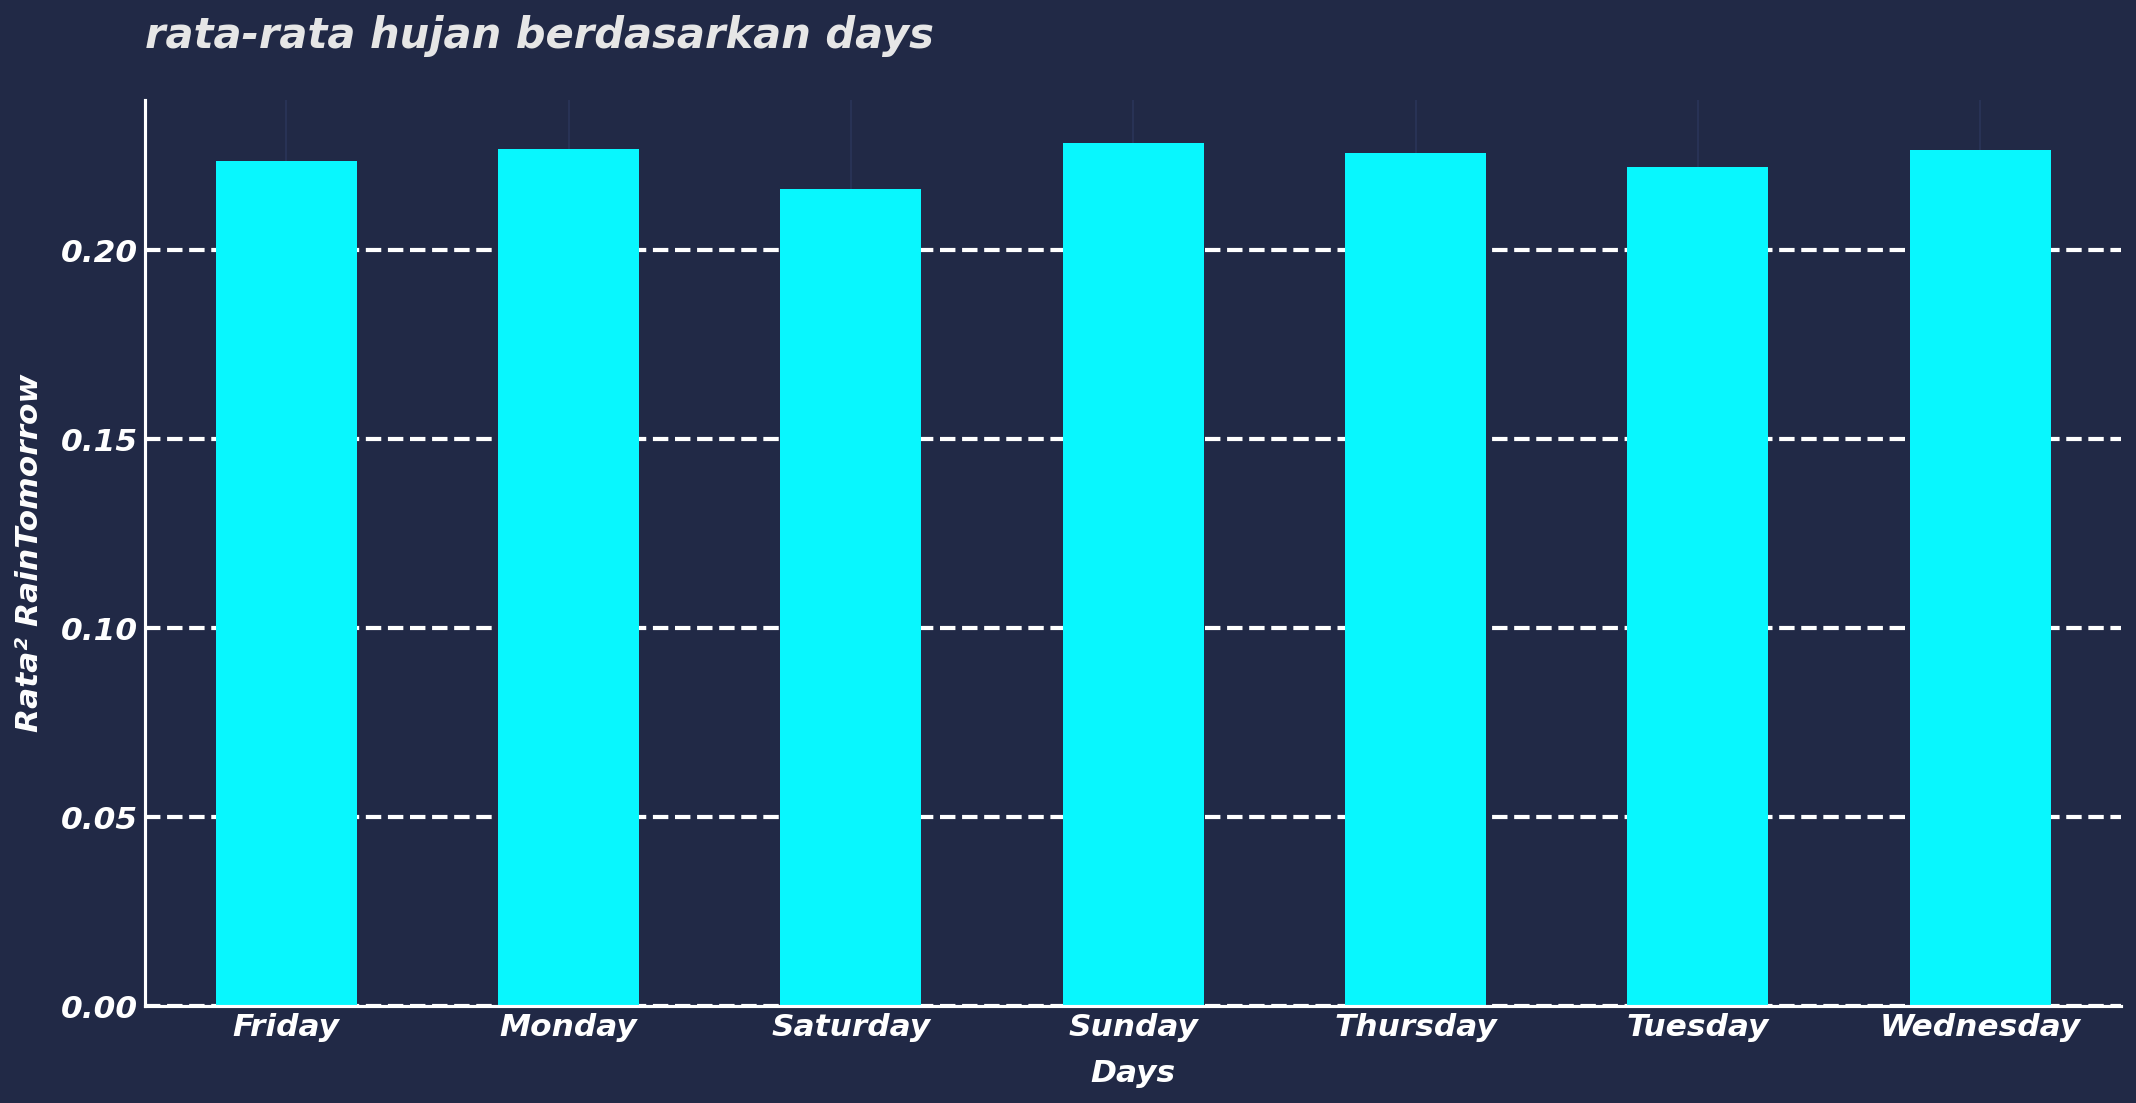

In [49]:
# plot 
df.groupby(days)["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan days") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("Days")


In [50]:
df["Days"] = df.Date.dt.day_name()

### Location

(-0.5, 1999.5, 1199.5, -0.5)

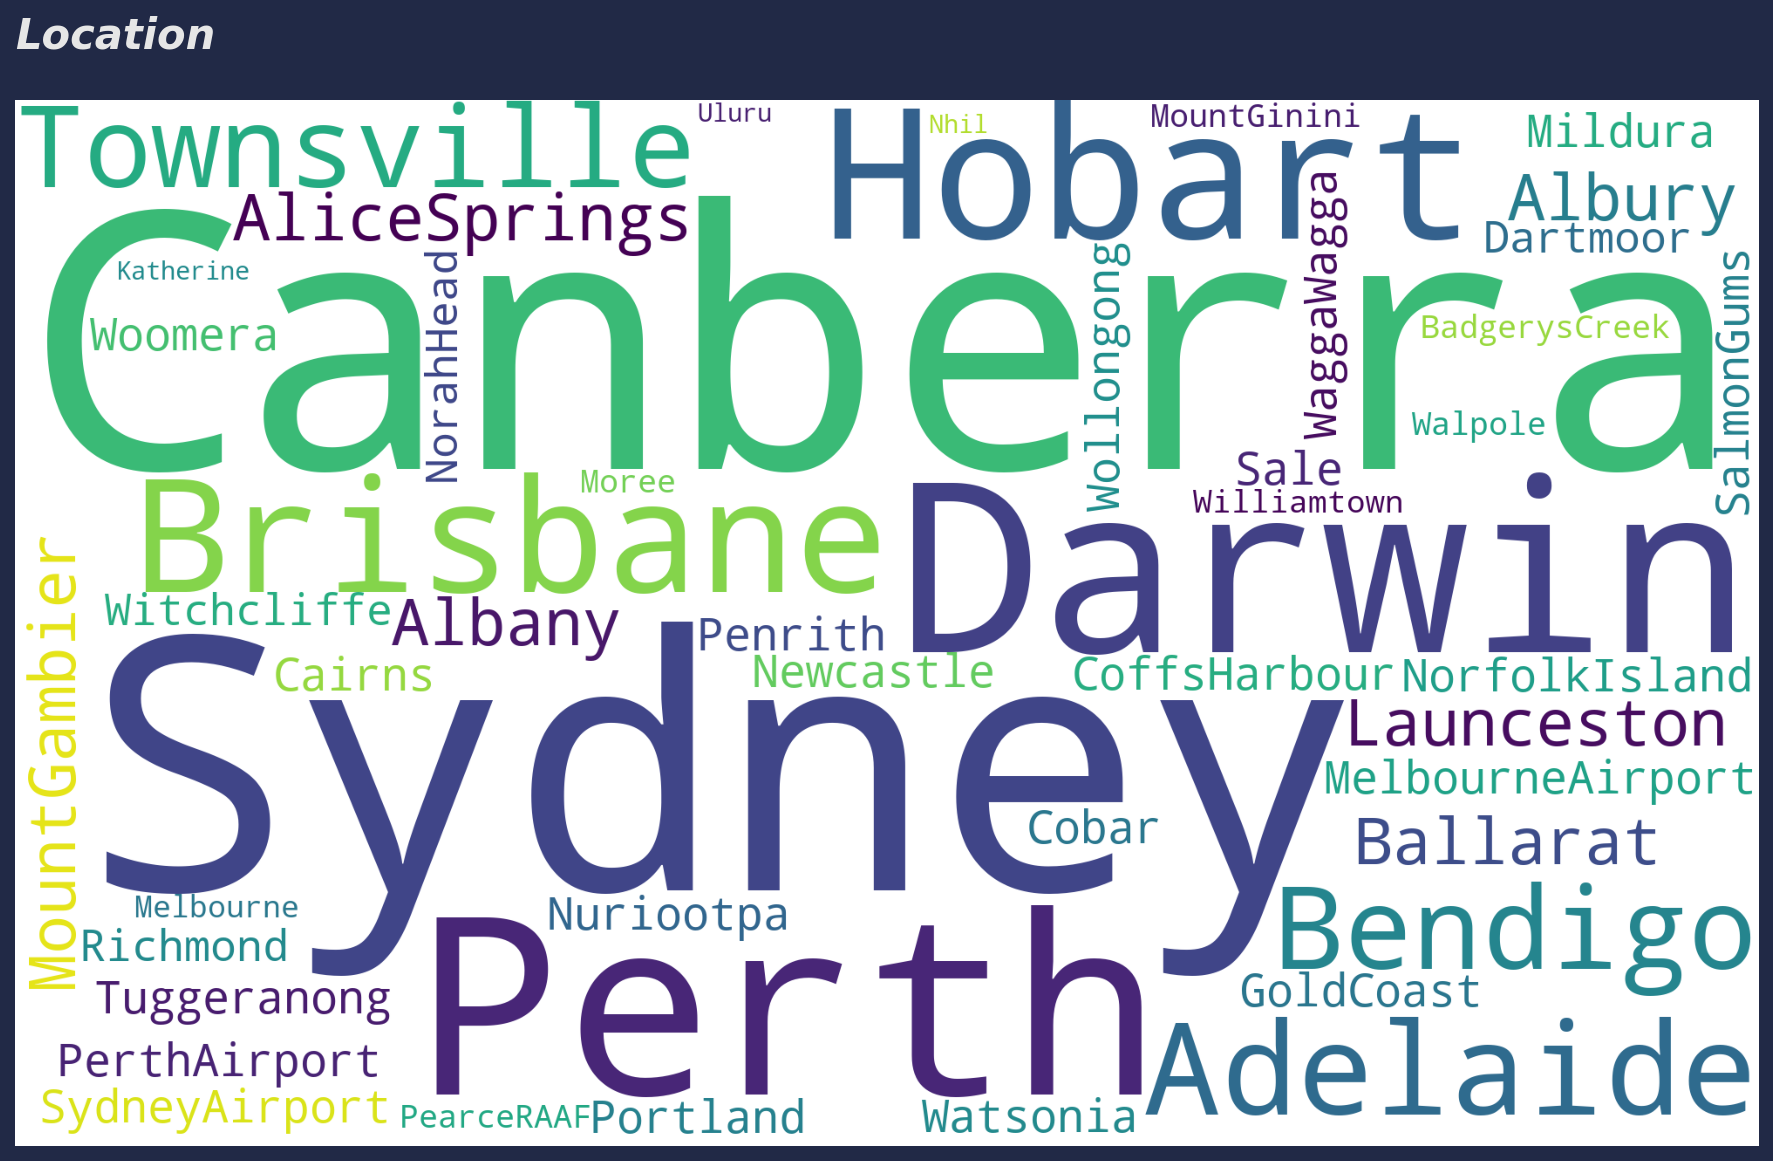

In [51]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(
    background_color='white',
    width = 2000,
    height = 1200
).generate_from_frequencies(df["Location"].value_counts()) 
plt.title("Location")
plt.imshow(wordcloud)
plt.axis('off')

In [53]:
location = df.groupby("Location")["RainTomorrow"].mean().sort_values(ascending=False).to_frame() 

In [55]:
# top 10 location paling tinggi rata² hujan

location.head(10) 

RainTomorrow
Location                   
Portland           0.365487
Walpole            0.336644
Cairns             0.317938
Dartmoor           0.313286
NorfolkIsland      0.310054
MountGambier       0.303630
Albany             0.299072
Witchcliffe        0.297764
CoffsHarbour       0.294277
MountGinini        0.281734

In [56]:
# top 10 dari bawah location paling rendah rata² hujan

location.tail(10) 

RainTomorrow
Location                  
Townsville        0.171118
Katherine         0.169981
SalmonGums        0.159729
Nhil              0.154238
Moree             0.138052
Cobar             0.129183
Mildura           0.108746
AliceSprings      0.080501
Uluru             0.076266
Woomera           0.067559

### WindGustDir winddir9am winddir3pm

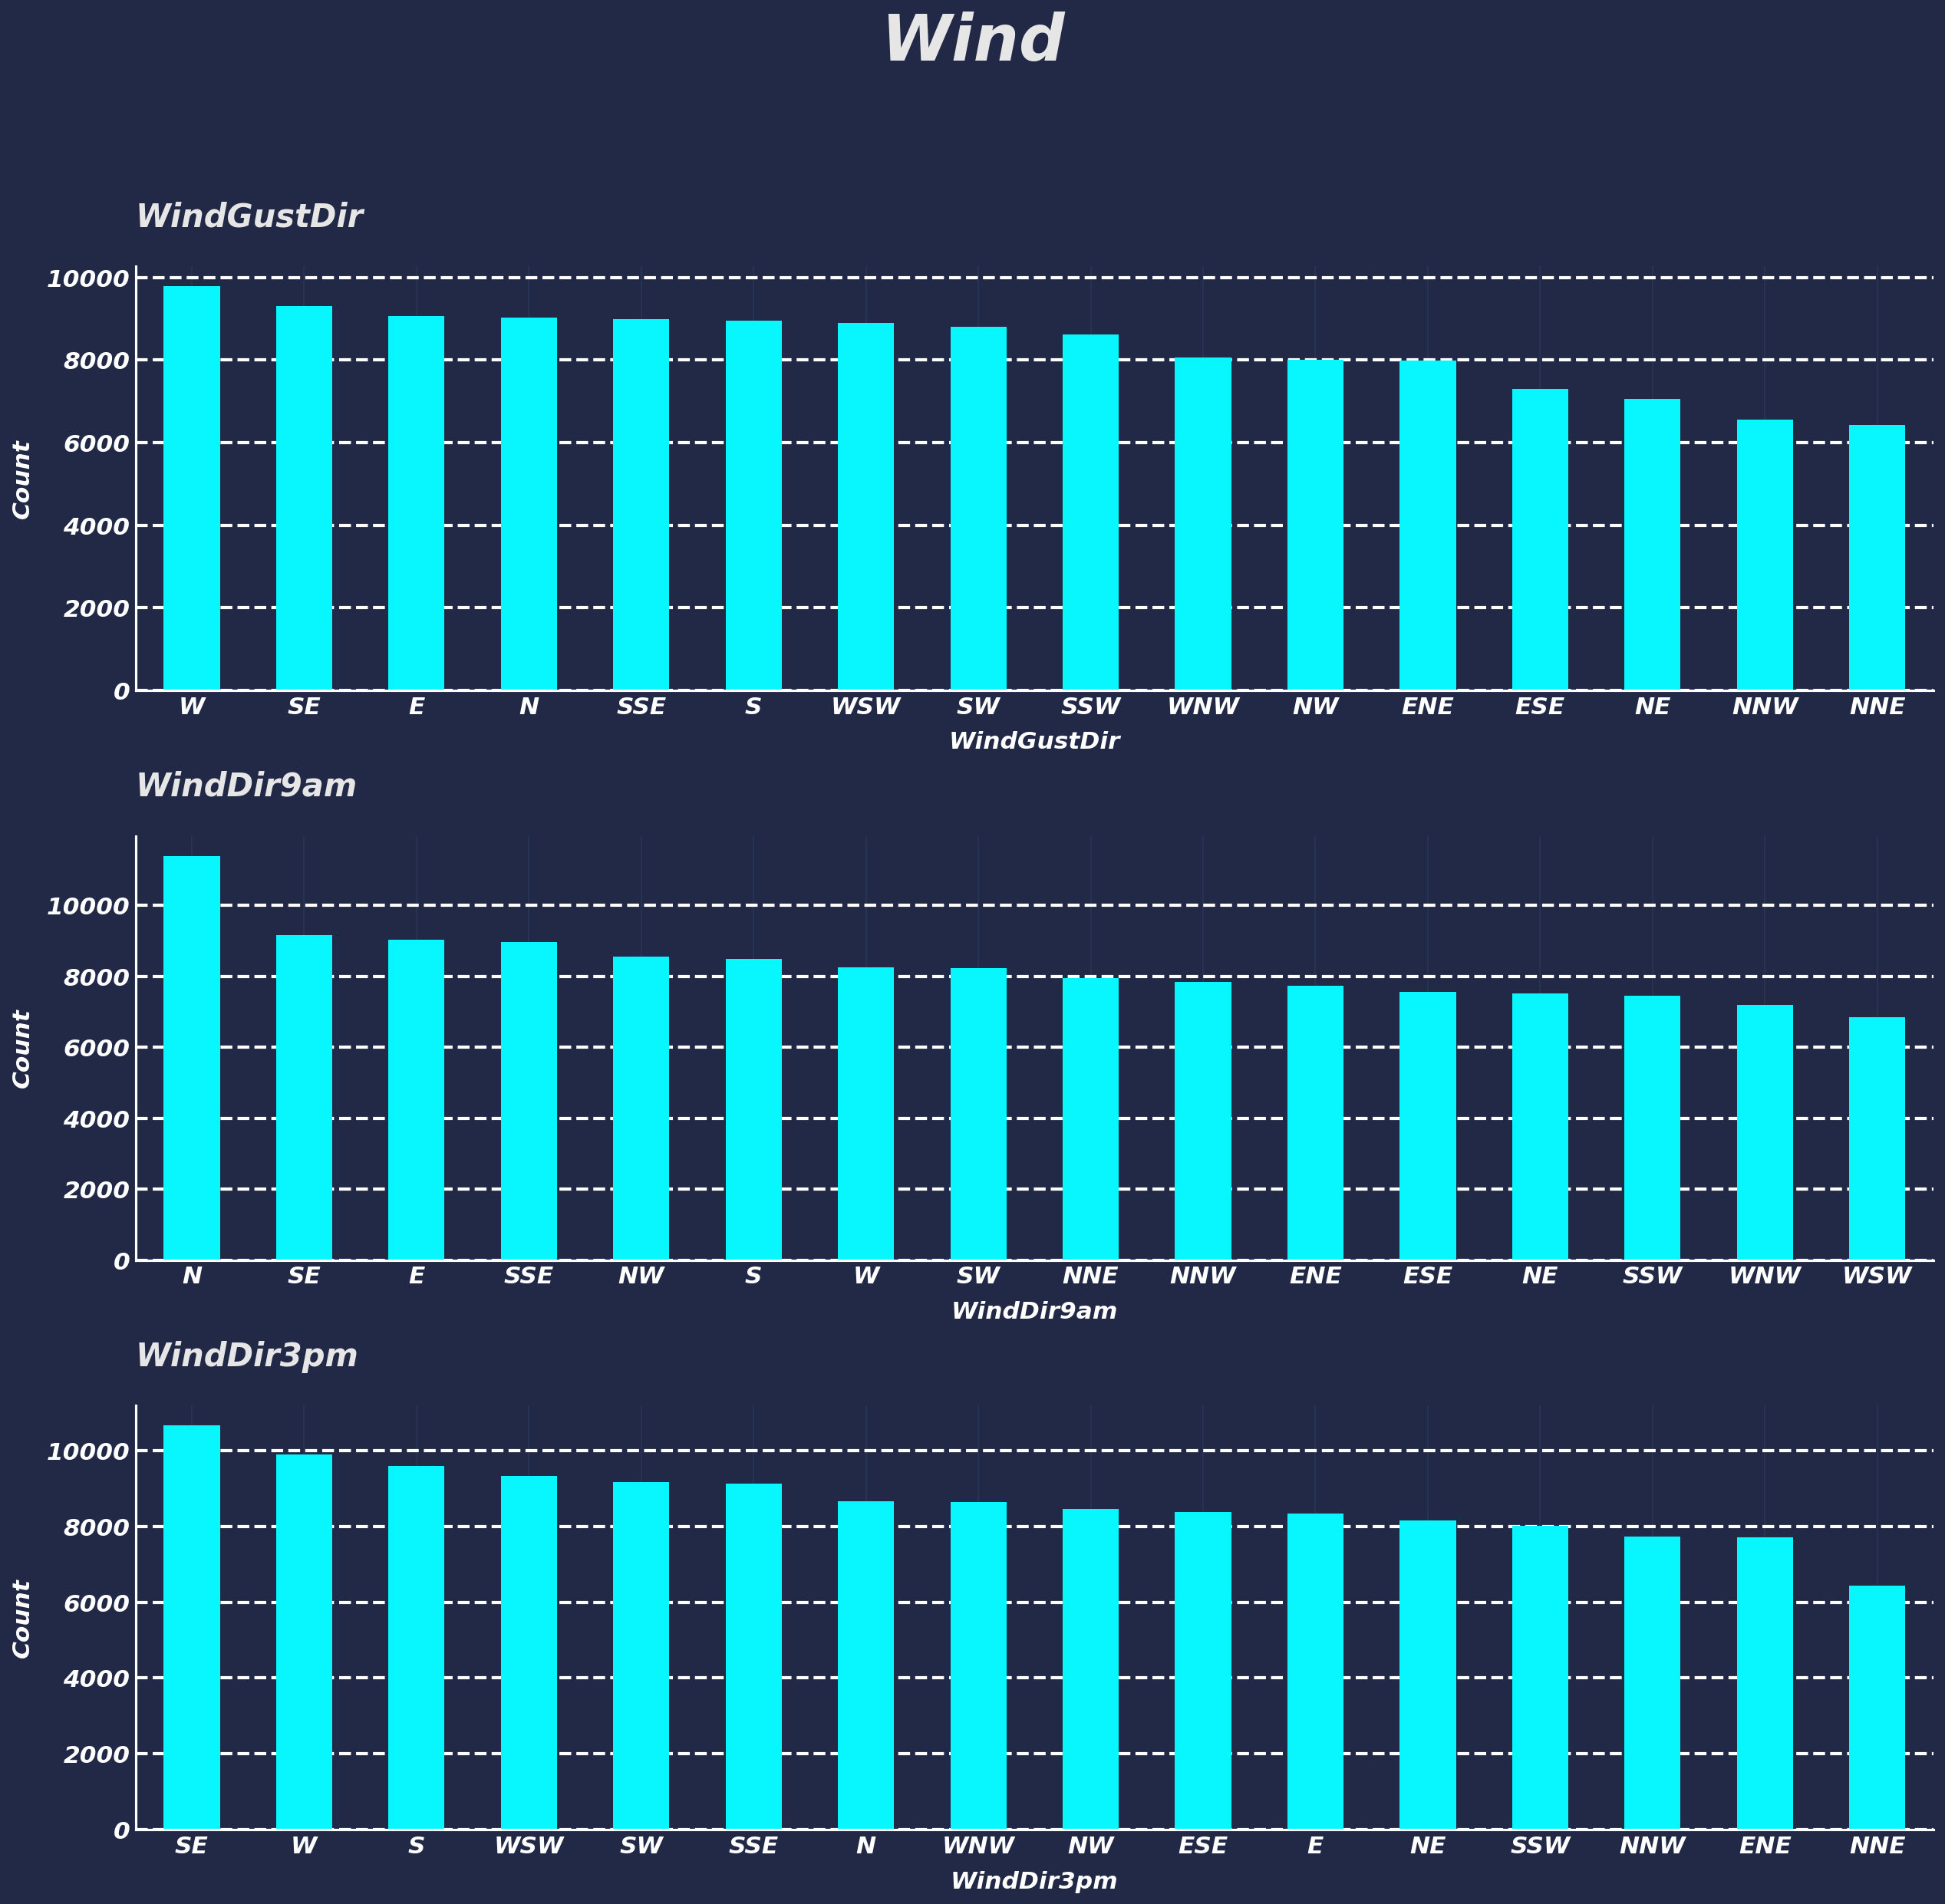

In [57]:
# plot 
plt.subplot(311)
df.WindGustDir.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindGustDir")

plt.subplot(312)
df.WindDir9am.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir9am")

plt.subplot(313)
df.WindDir3pm.value_counts().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir3pm")

plt.suptitle("Wind", y=1.1, size=40,fontweight="bold") 
plt.tight_layout()


In [58]:
# rata² hujan berdasarkan windgustdir

df.groupby("WindGustDir")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

In [59]:
# rata² hujan berdasarkan winddir3pm

df.groupby("WindDir3pm")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

In [60]:
# rata² hujan berdasarkan winddir9am

df.groupby("WindDir9am")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

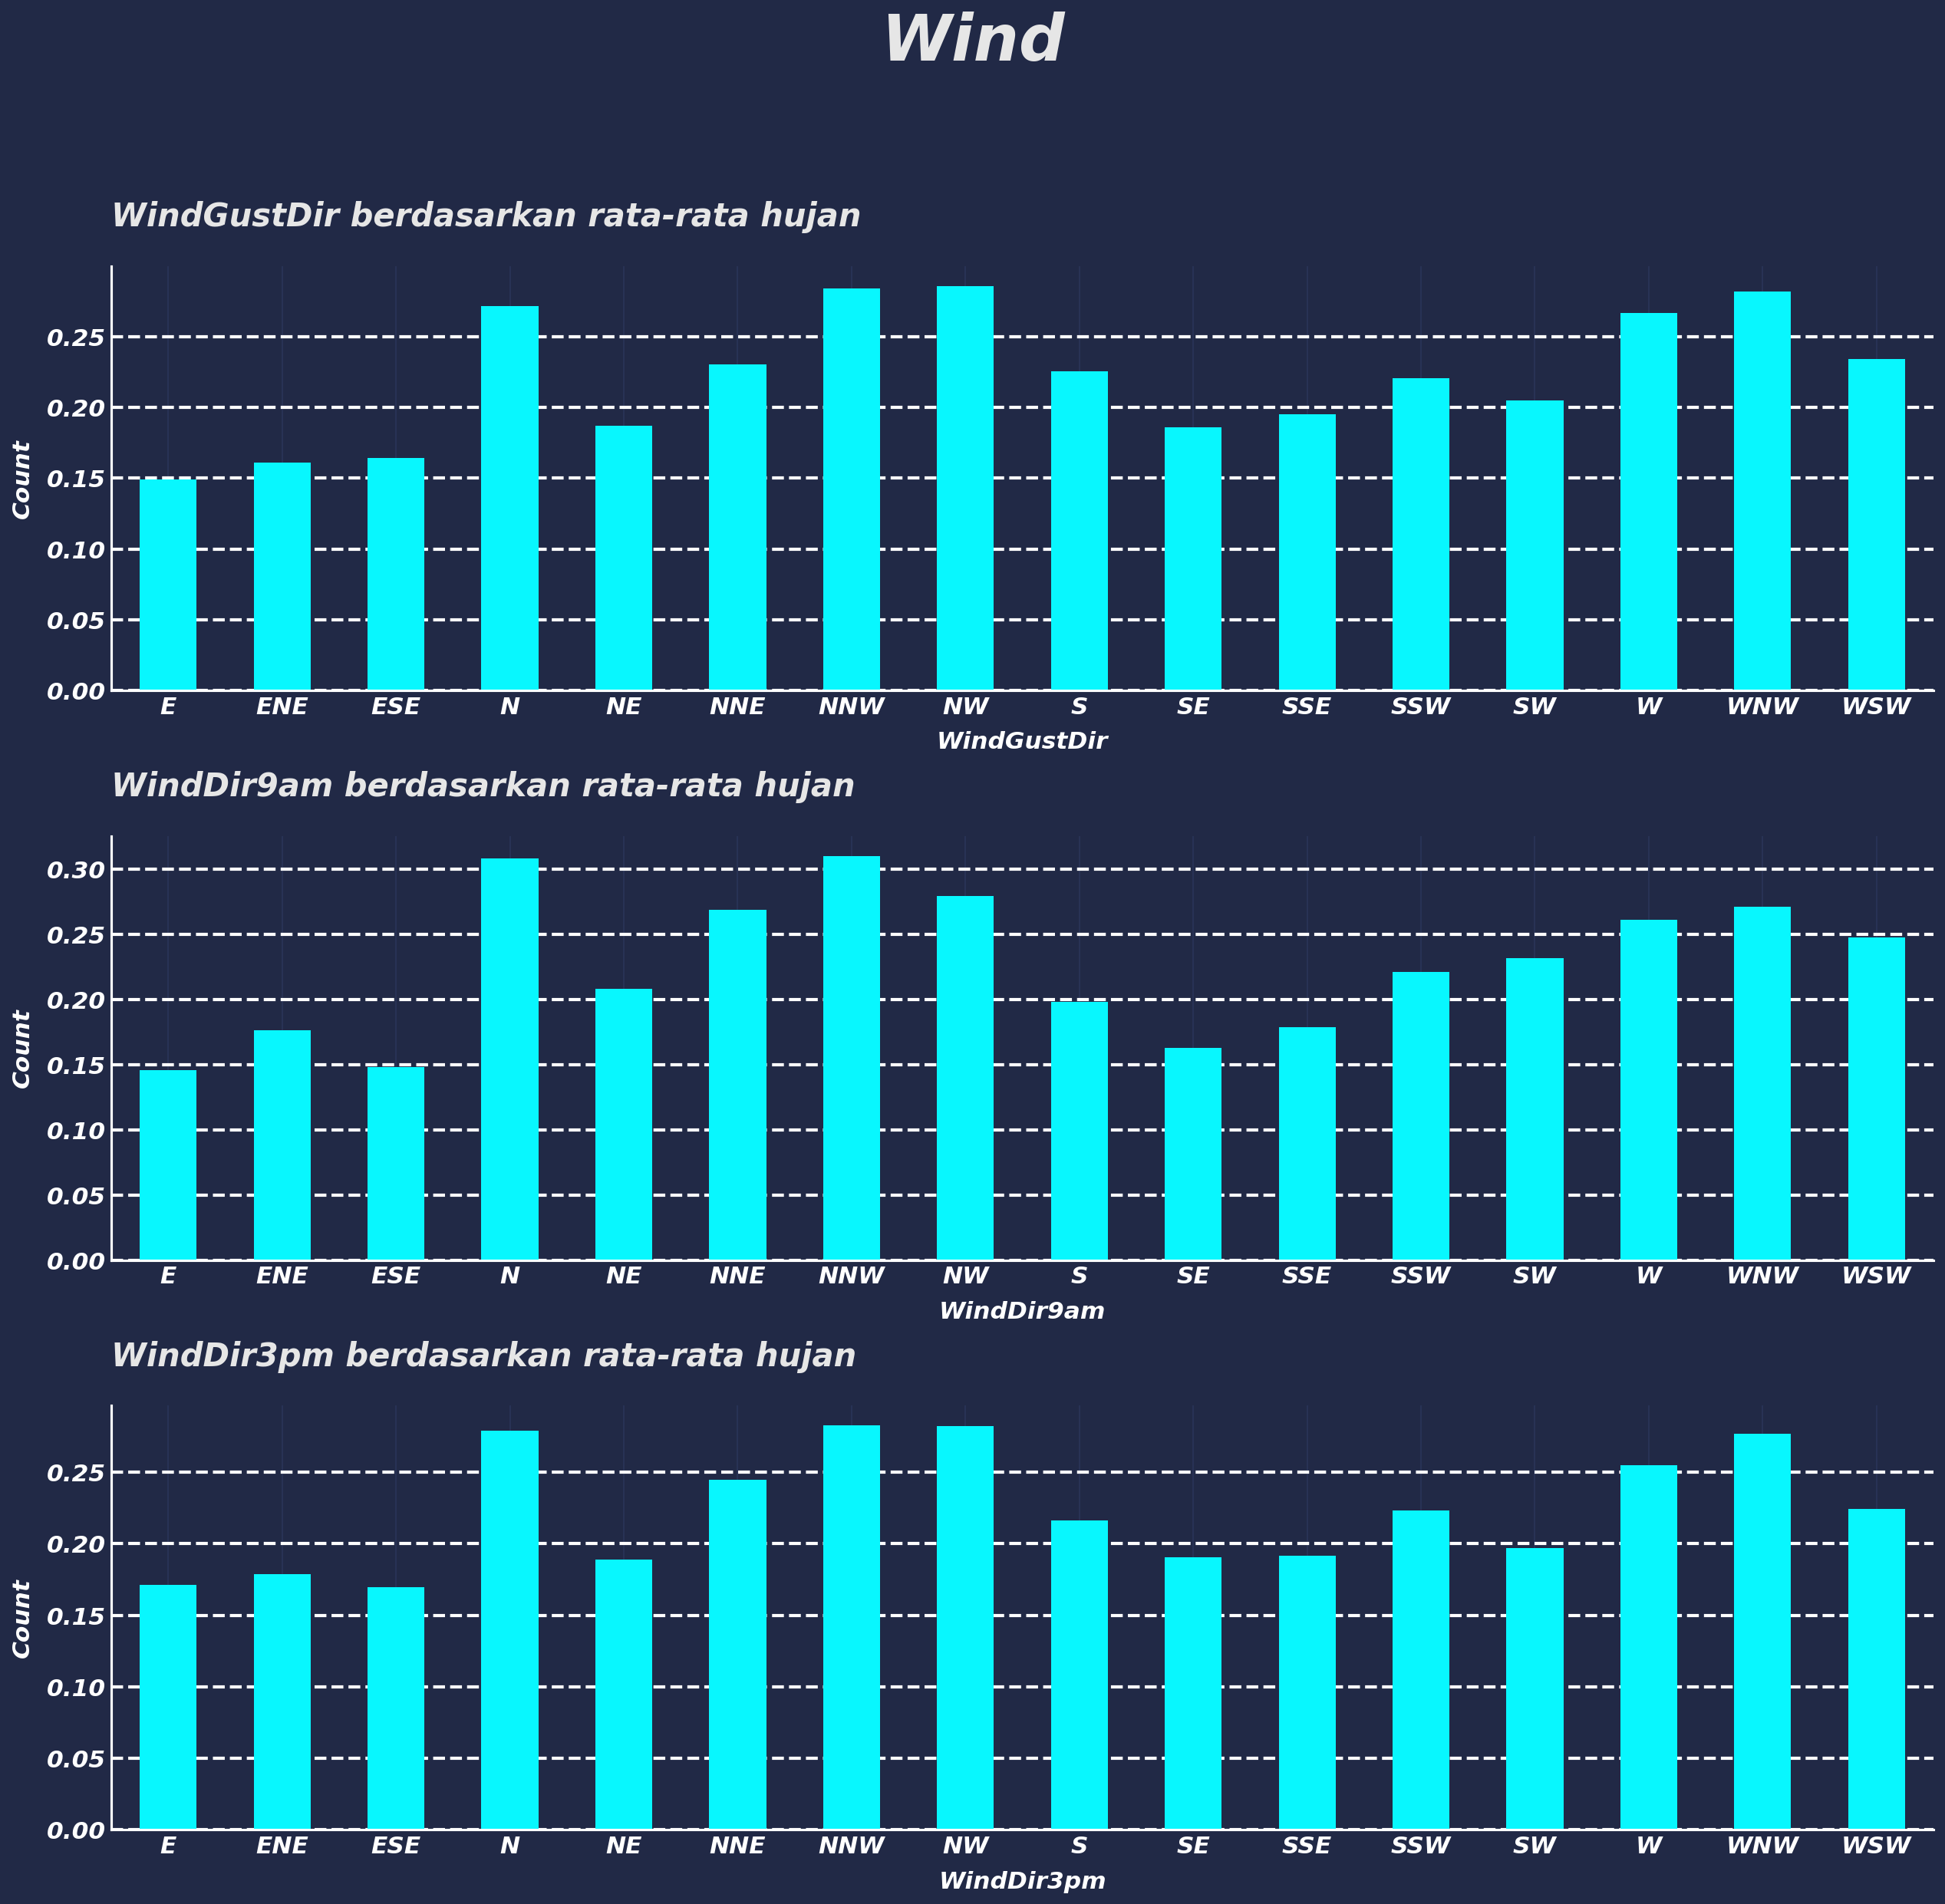

In [61]:
# plot 
plt.subplot(311)
df.groupby("WindGustDir")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindGustDir")

plt.subplot(312)
df.groupby("WindDir9am")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir9am")

plt.subplot(313)
df.groupby("WindDir3pm")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm berdasarkan rata-rata hujan") 
plt.ylabel("Count") 
plt.xticks(rotation=0) 
plt.xlabel("WindDir3pm")

plt.suptitle("Wind", y=1.1, size=40,fontweight="bold") 
plt.tight_layout()


In [62]:
# check sebab-akibat location & windgustdir

df.groupby(["Years","Months"])["WindGustDir"].describe()["top"].to_frame().sample(20) 

top
Years Months     
2015  10      ENE
2010  9       WSW
2013  5         N
      12       SW
2008  8       NNW
2011  3        SE
2015  7         N
2012  9         W
2008  11       SW
2014  1        SE
      9         N
2012  11      SSW
2013  7         N
2009  4         S
2014  10        W
2015  9         S
2016  2       SSE
2013  9         W
2008  10        N
2016  6         W

In [63]:
# fillna berdasarkan tahun&bulan 

df["WindGustDir"] = df.groupby(["Years","Months"])["WindGustDir"].apply(lambda x: x.fillna(x.mode()[0]))
df["WindDir3pm"] = df.groupby(["Years","Months"])["WindDir3pm"].apply(lambda x: x.fillna(x.mode()[0]))
df["WindDir9am"] = df.groupby(["Years","Months"])["WindDir9am"].apply(lambda x: x.fillna(x.mode()[0]))


### raintoday 

RainToday
No    0.768899
Yes   0.221213
NaN   0.009888

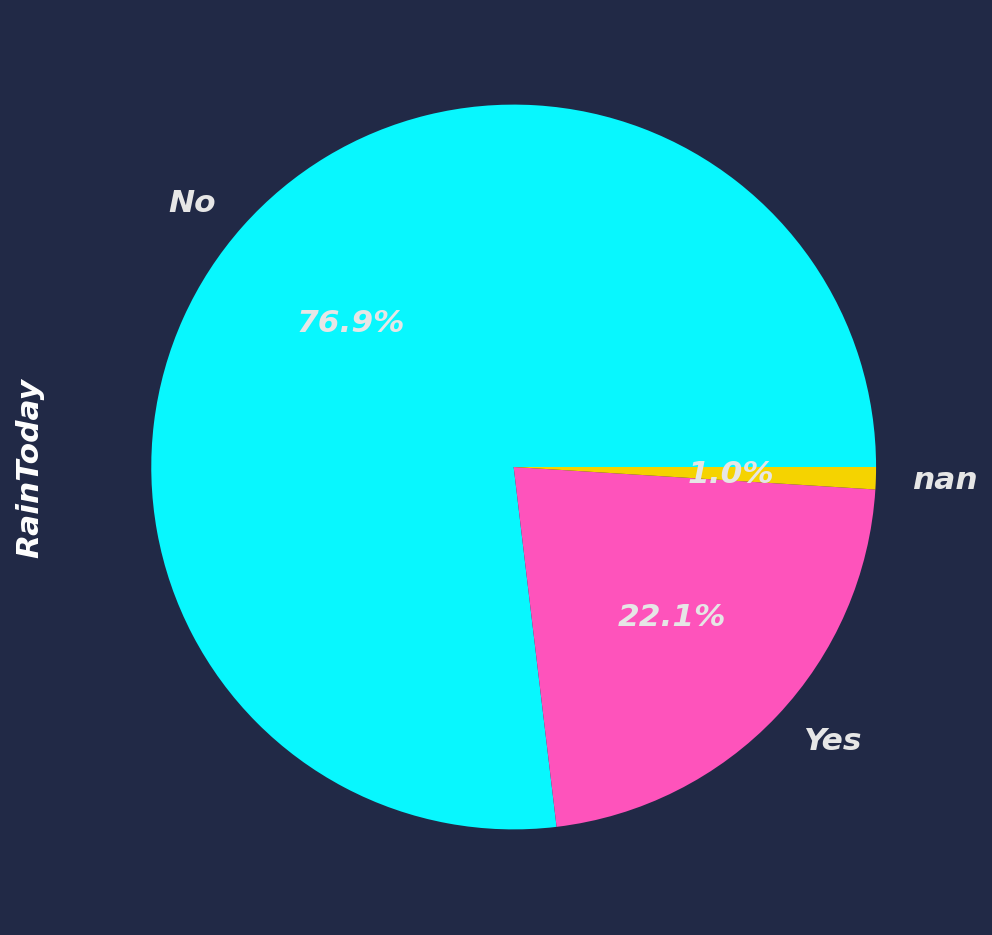

In [64]:
df.RainToday.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainToday.value_counts(dropna=False, normalize=True).to_frame() 

In [65]:
# fillna dwngan mode 
df["RainToday"].fillna("No", inplace=True) 

RainToday
No    0.778787
Yes   0.221213

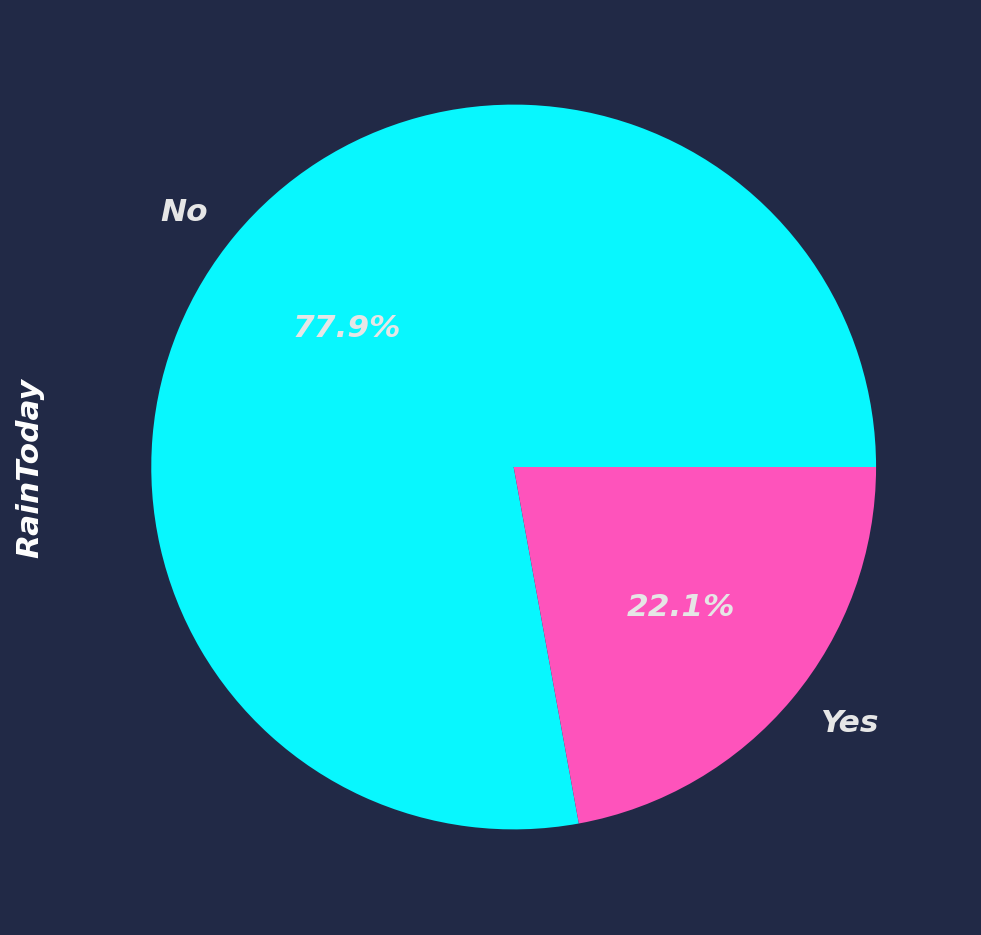

In [66]:
# after fillna

df.RainToday.value_counts(dropna=False).plot(kind="pie", autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainToday.value_counts(dropna=False, normalize=True).to_frame() 

In [67]:
df.groupby("RainToday")["RainTomorrow"].value_counts(normalize=True).to_frame()

RainTomorrow
RainToday RainTomorrow              
No        0                 0.843956
          1                 0.156044
Yes       0                 0.535940
          1                 0.464060

Text(0.5, 0, 'RainToday')

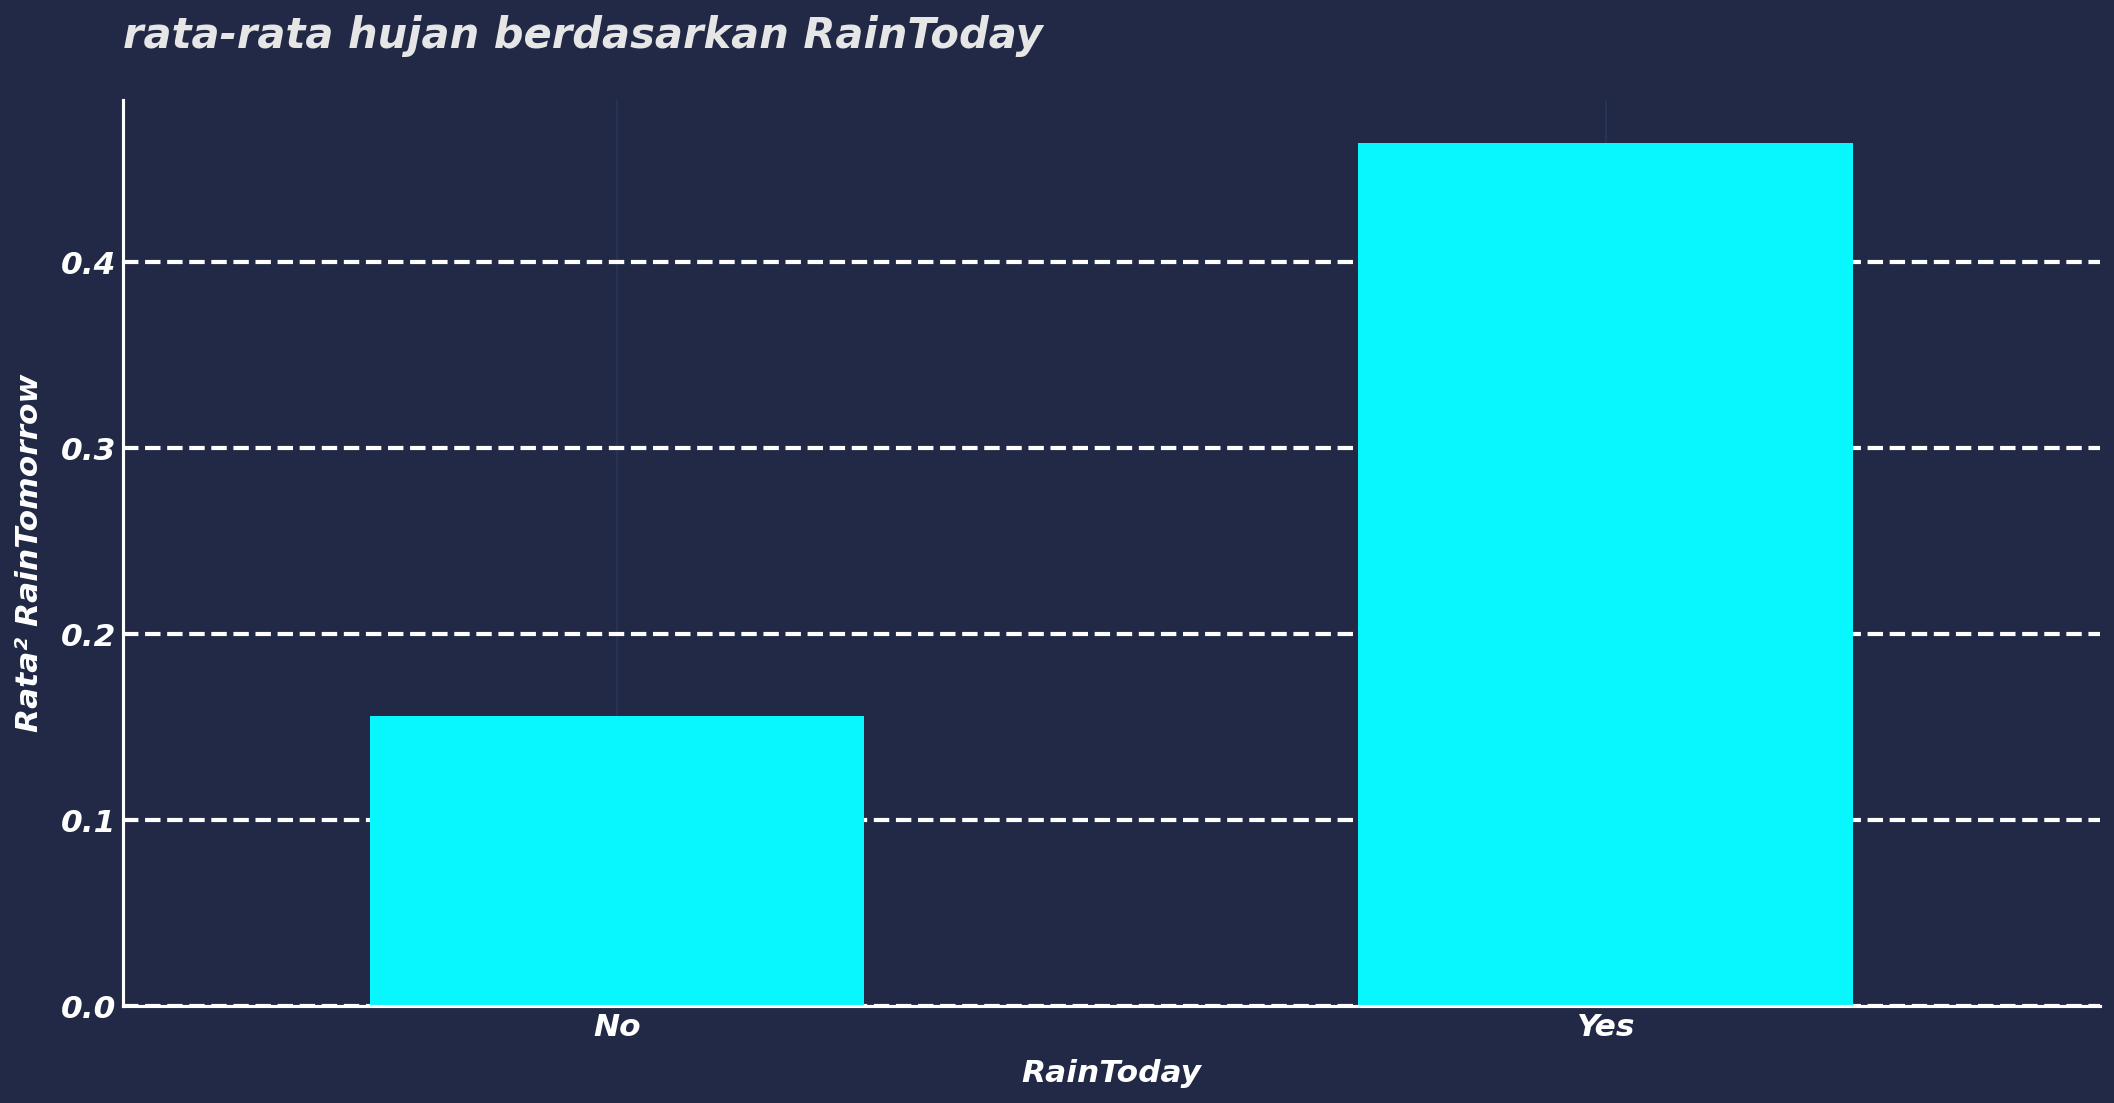

In [68]:
# plot 
df.groupby("RainToday")["RainTomorrow"].mean().plot(kind="bar", figsize=(17, 8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan RainToday") 
plt.ylabel("Rata² RainTomorrow") 
plt.xticks(rotation=0) 
plt.xlabel("RainToday")


### numerical features

In [69]:
df[number].describe()

MinTemp  ...   RainTomorrow
count  141556.000000  ...  142193.000000
mean       12.186400  ...       0.224181
std         6.403283  ...       0.417043
min        -8.500000  ...       0.000000
25%         7.600000  ...       0.000000
50%        12.000000  ...       0.000000
75%        16.800000  ...       0.000000
max        33.900000  ...       1.000000

[8 rows x 17 columns]

Text(0.0, 1.0, 'Correlation')

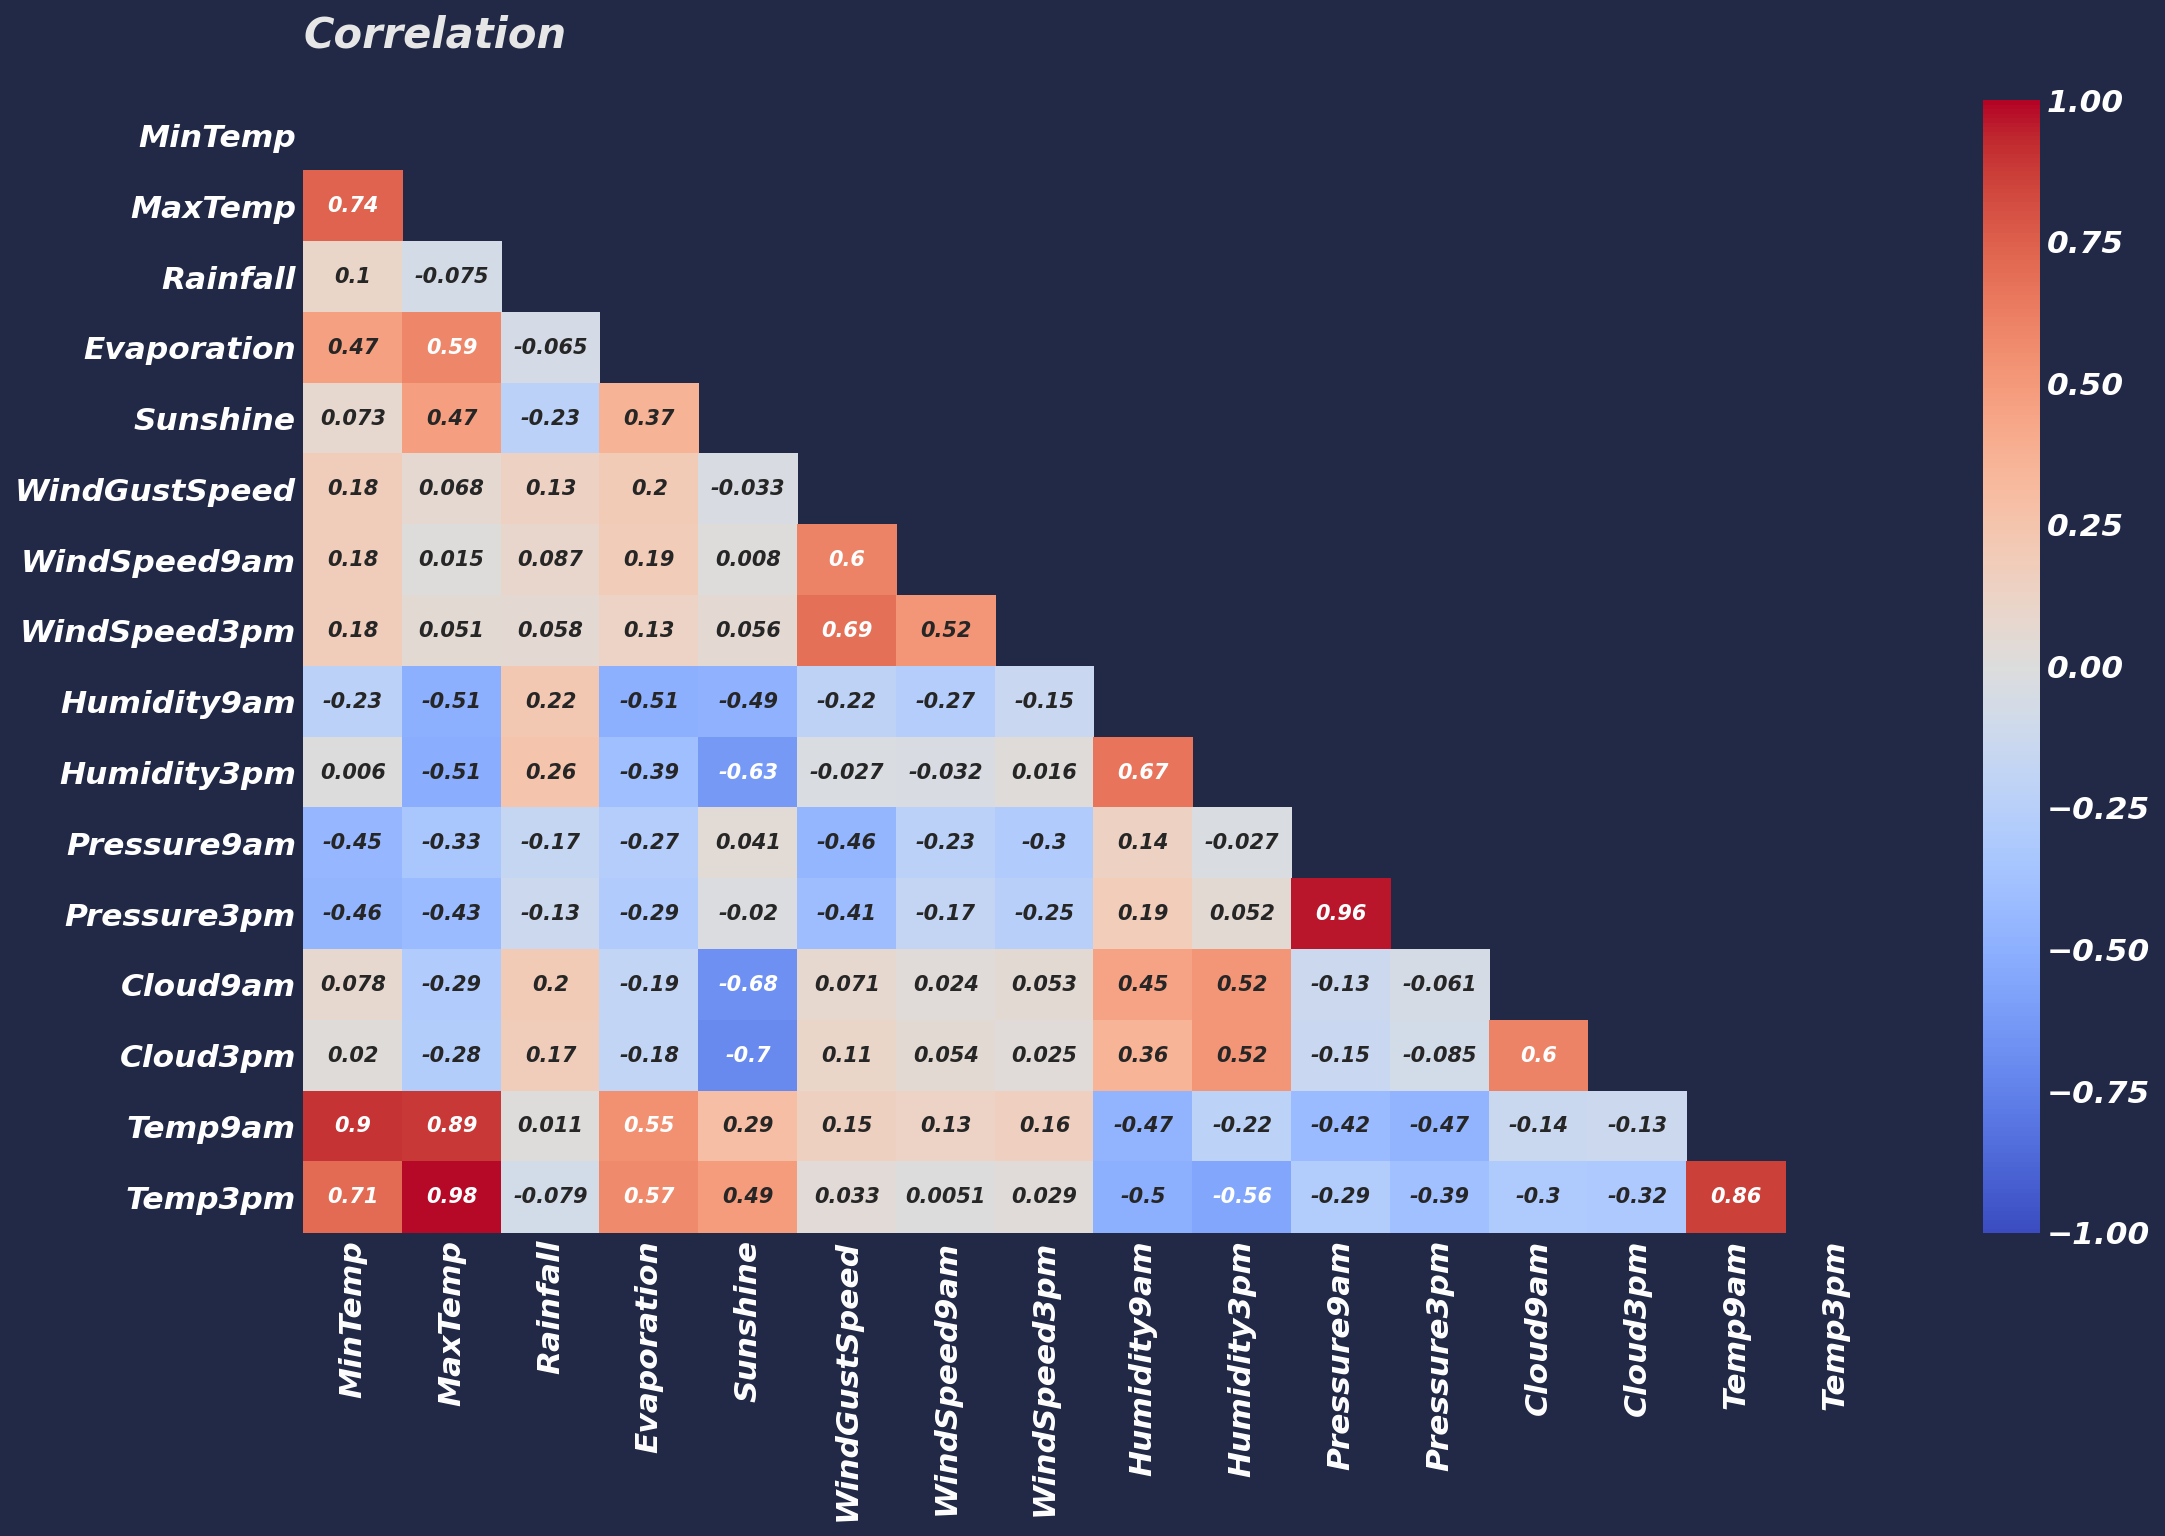

In [70]:
mask = np.triu(df[number].drop("RainTomorrow",axis=1).corr())

plt.figure(figsize=(17, 10)) 
sns.heatmap(df.drop("RainTomorrow", axis=1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title("Correlation") 

### mintemp maxtemp

MaxTemp skew: 0.22491661455913778
MaxTemp Kurt: -0.23844615039968753

MinTemp skew: 0.02389982065241537
MinTemp Kurt: -0.4872527487296816


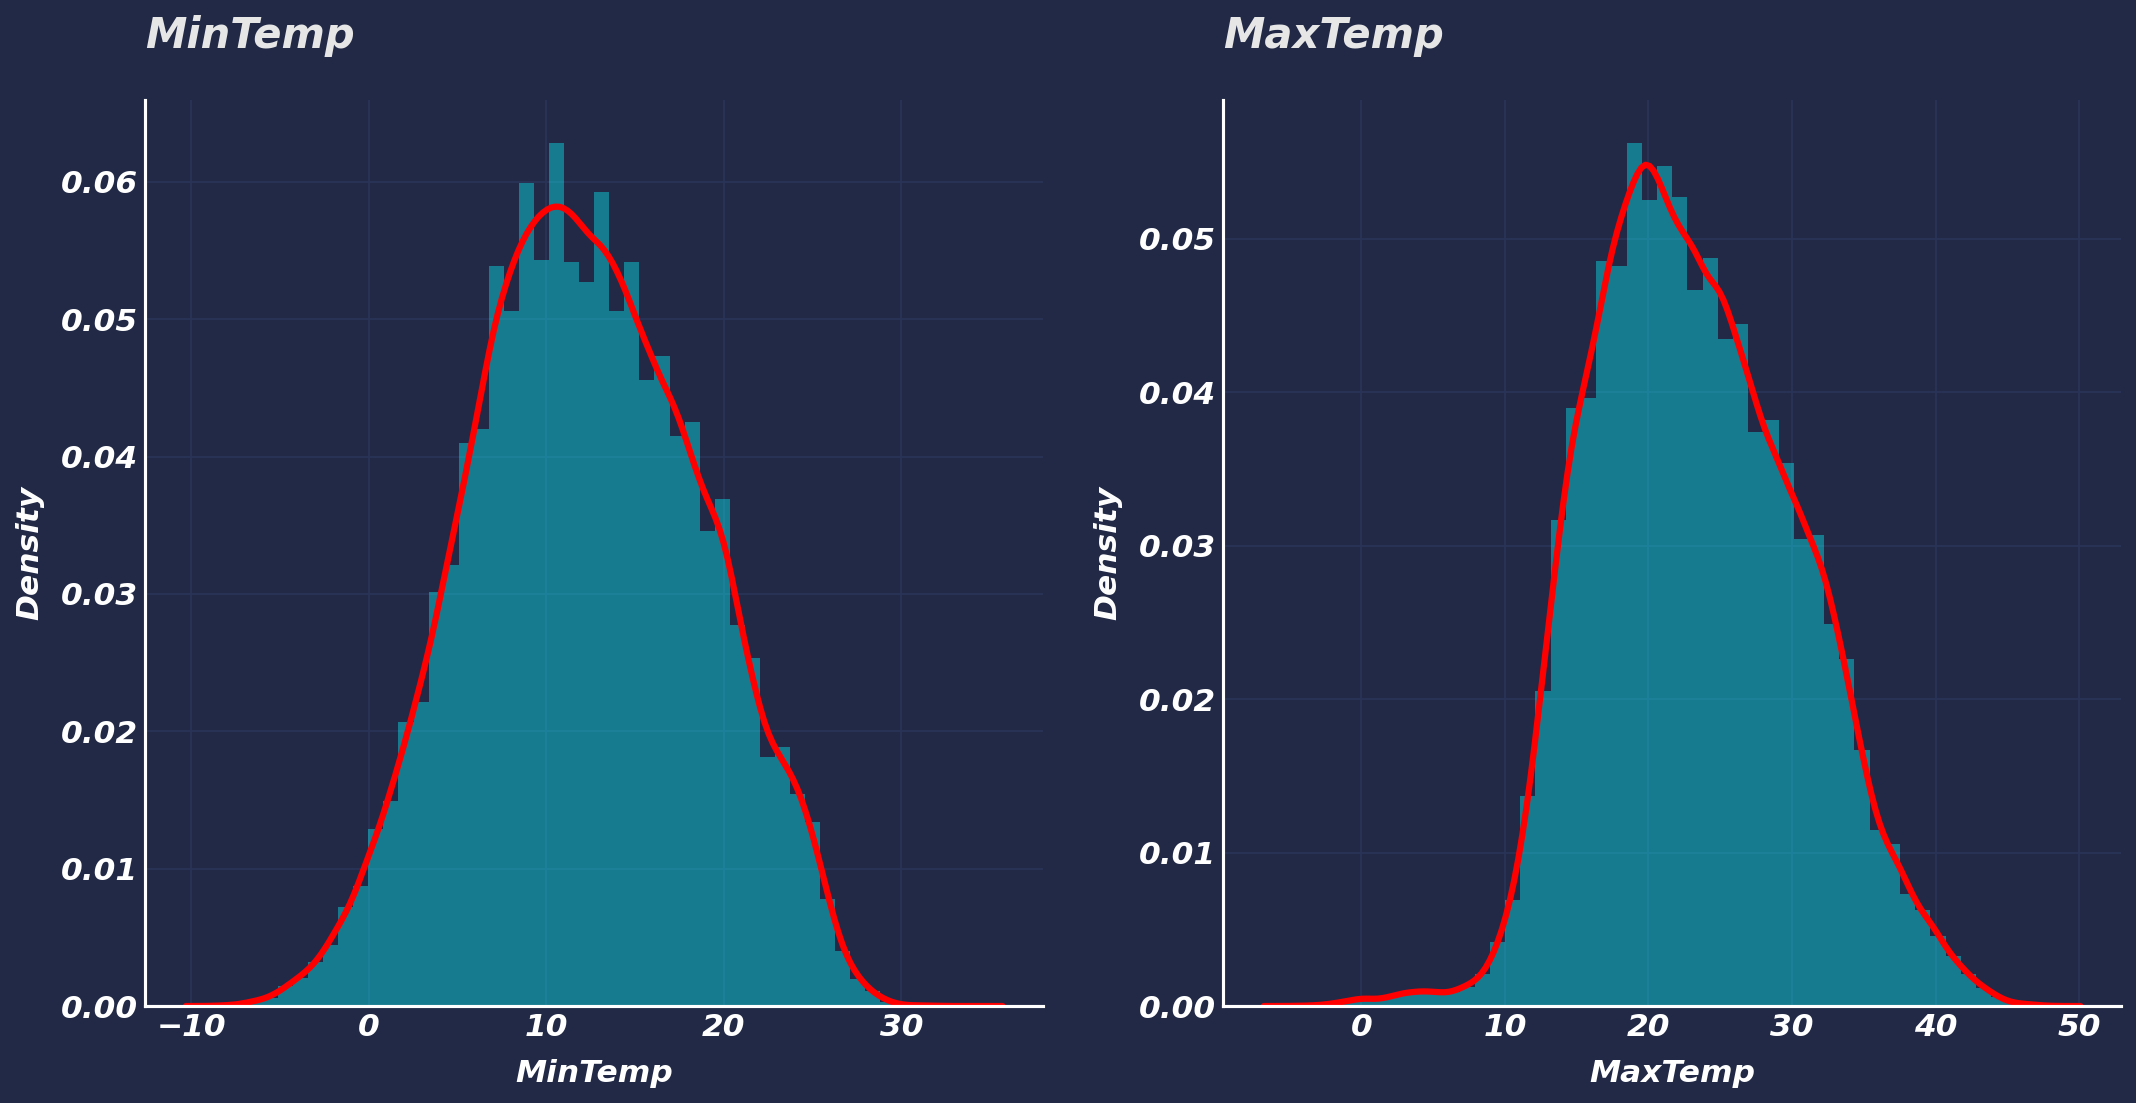

In [71]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#mintemp 
plt.subplot(121) 
sns.distplot(df.MinTemp, kde_kws={"linewidth": 3,"color": "red"})
plt.title("MinTemp")

#maxtemp
plt.subplot(122) 
sns.distplot(df.MaxTemp, kde_kws={"linewidth": 3,"color": "red"})
plt.title("MaxTemp")


print(f"MaxTemp skew: {df.MaxTemp.skew()}")
print(f"MaxTemp Kurt: {df.MaxTemp.kurt()}")
print("") 
print(f"MinTemp skew: {df.MinTemp.skew()}")
print(f"MinTemp Kurt: {df.MinTemp.kurt()}")

Text(0.0, 1.0, 'MaxTemp berdasarkan rain tomorrow')

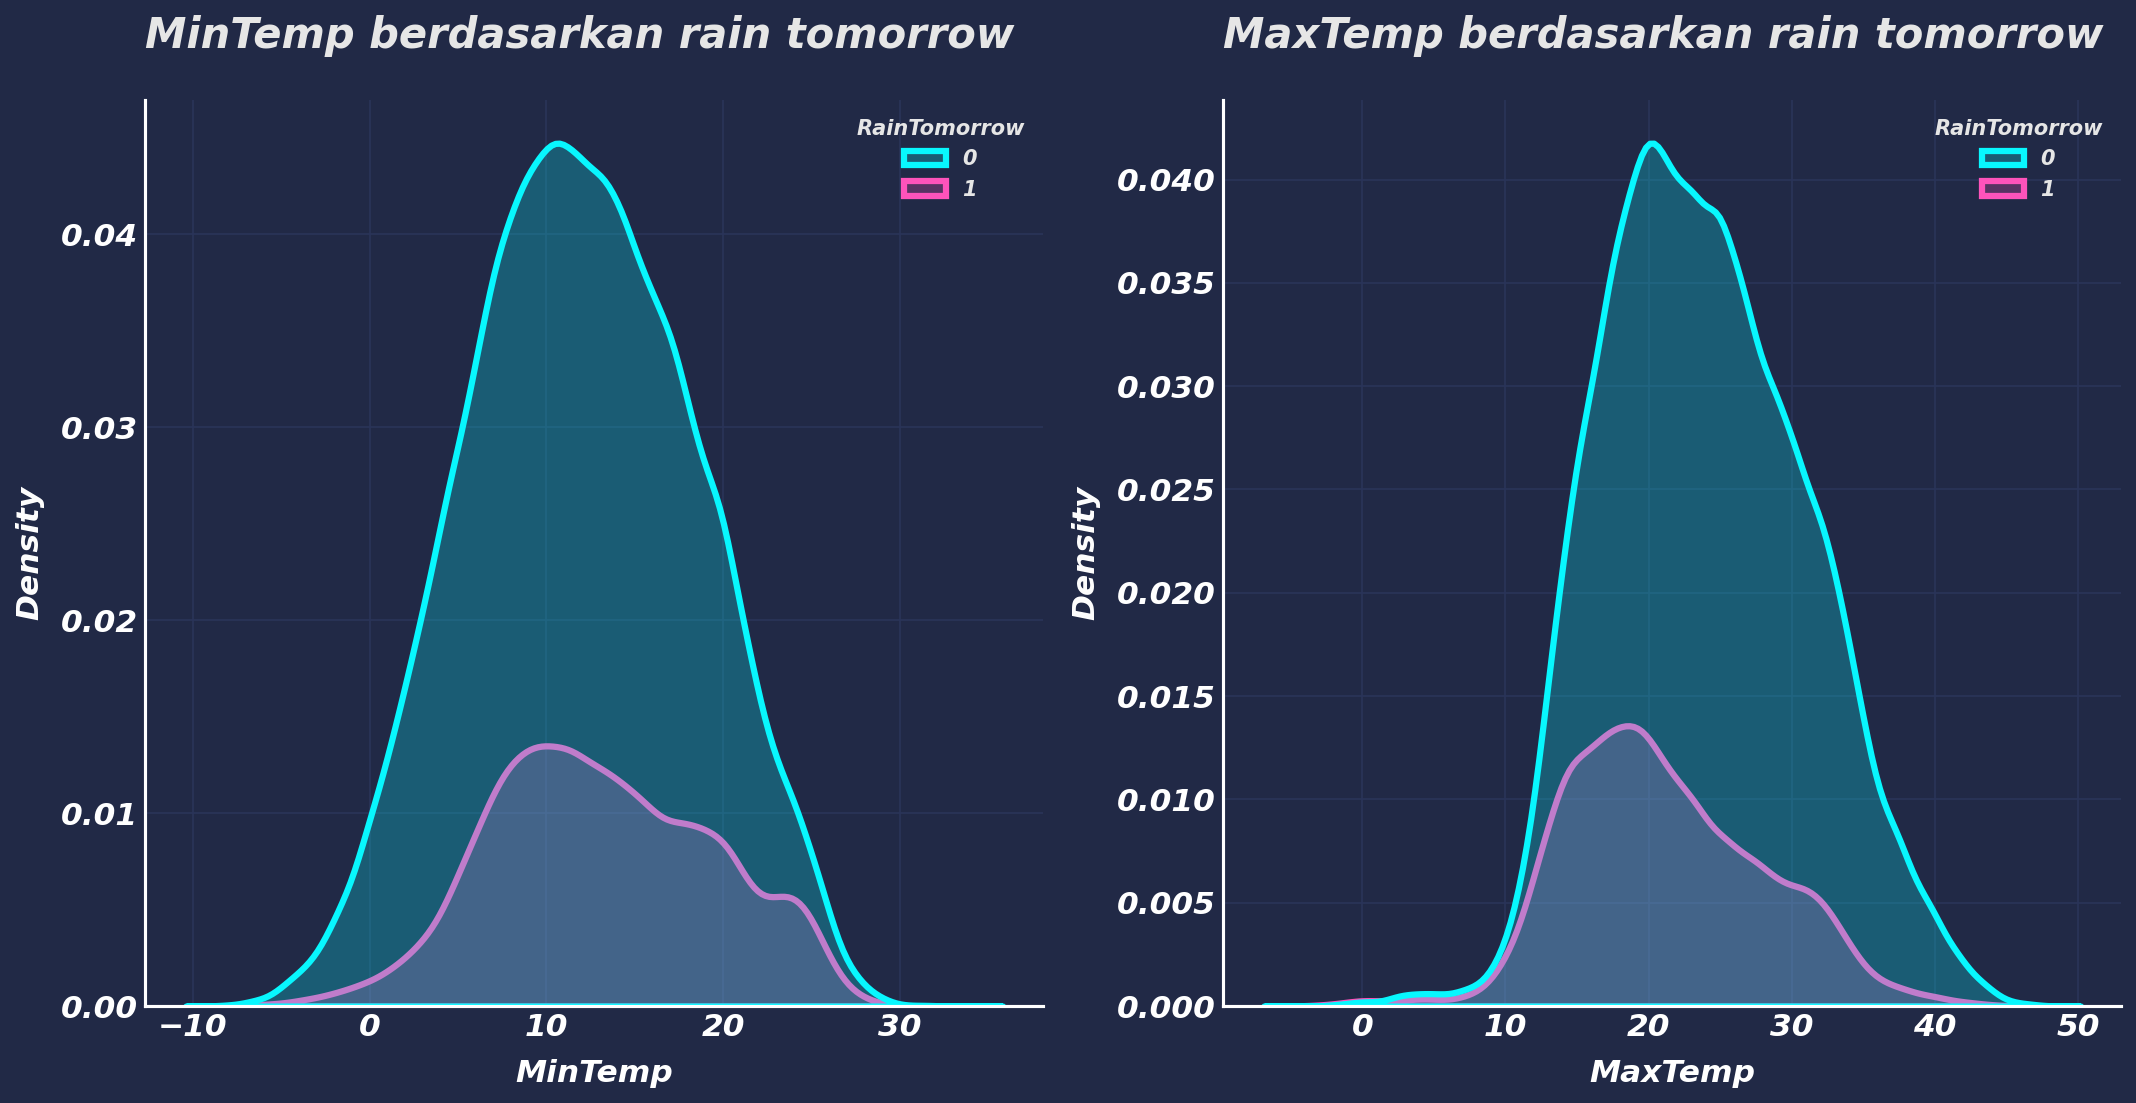

In [72]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#mintemp 
plt.subplot(121) 
sns.kdeplot(df.MinTemp, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("MinTemp berdasarkan rain tomorrow")

#maxtemp
plt.subplot(122) 
sns.kdeplot(df.MaxTemp, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("MaxTemp berdasarkan rain tomorrow")


In [73]:
#rata² min/max temp berdasarkam RainTomorrow

df.groupby("RainTomorrow")["MinTemp","MaxTemp"].mean()

MinTemp    MaxTemp
RainTomorrow                      
0             11.897675  23.836247
1             13.186890  21.119100

In [74]:
# fill min temp berdasarkan temp9am
df["MinTemp"] = df.groupby(["Temp9am"])["MinTemp"].apply(lambda x: x.fillna(x.median())) 
df["MinTemp"].fillna(method="bfill",inplace=True)

In [75]:
# fill maxtemp berdasarkan temp3pm
df["MaxTemp"] = df.groupby(["Temp3pm"])["MaxTemp"].apply(lambda x: x.fillna(x.median())) 
df["MaxTemp"].fillna(method="bfill",inplace=True)

### Rainfall 


Rainfall skew: 9.88806106787276
Rainfall Kurt: 180.00209682438856


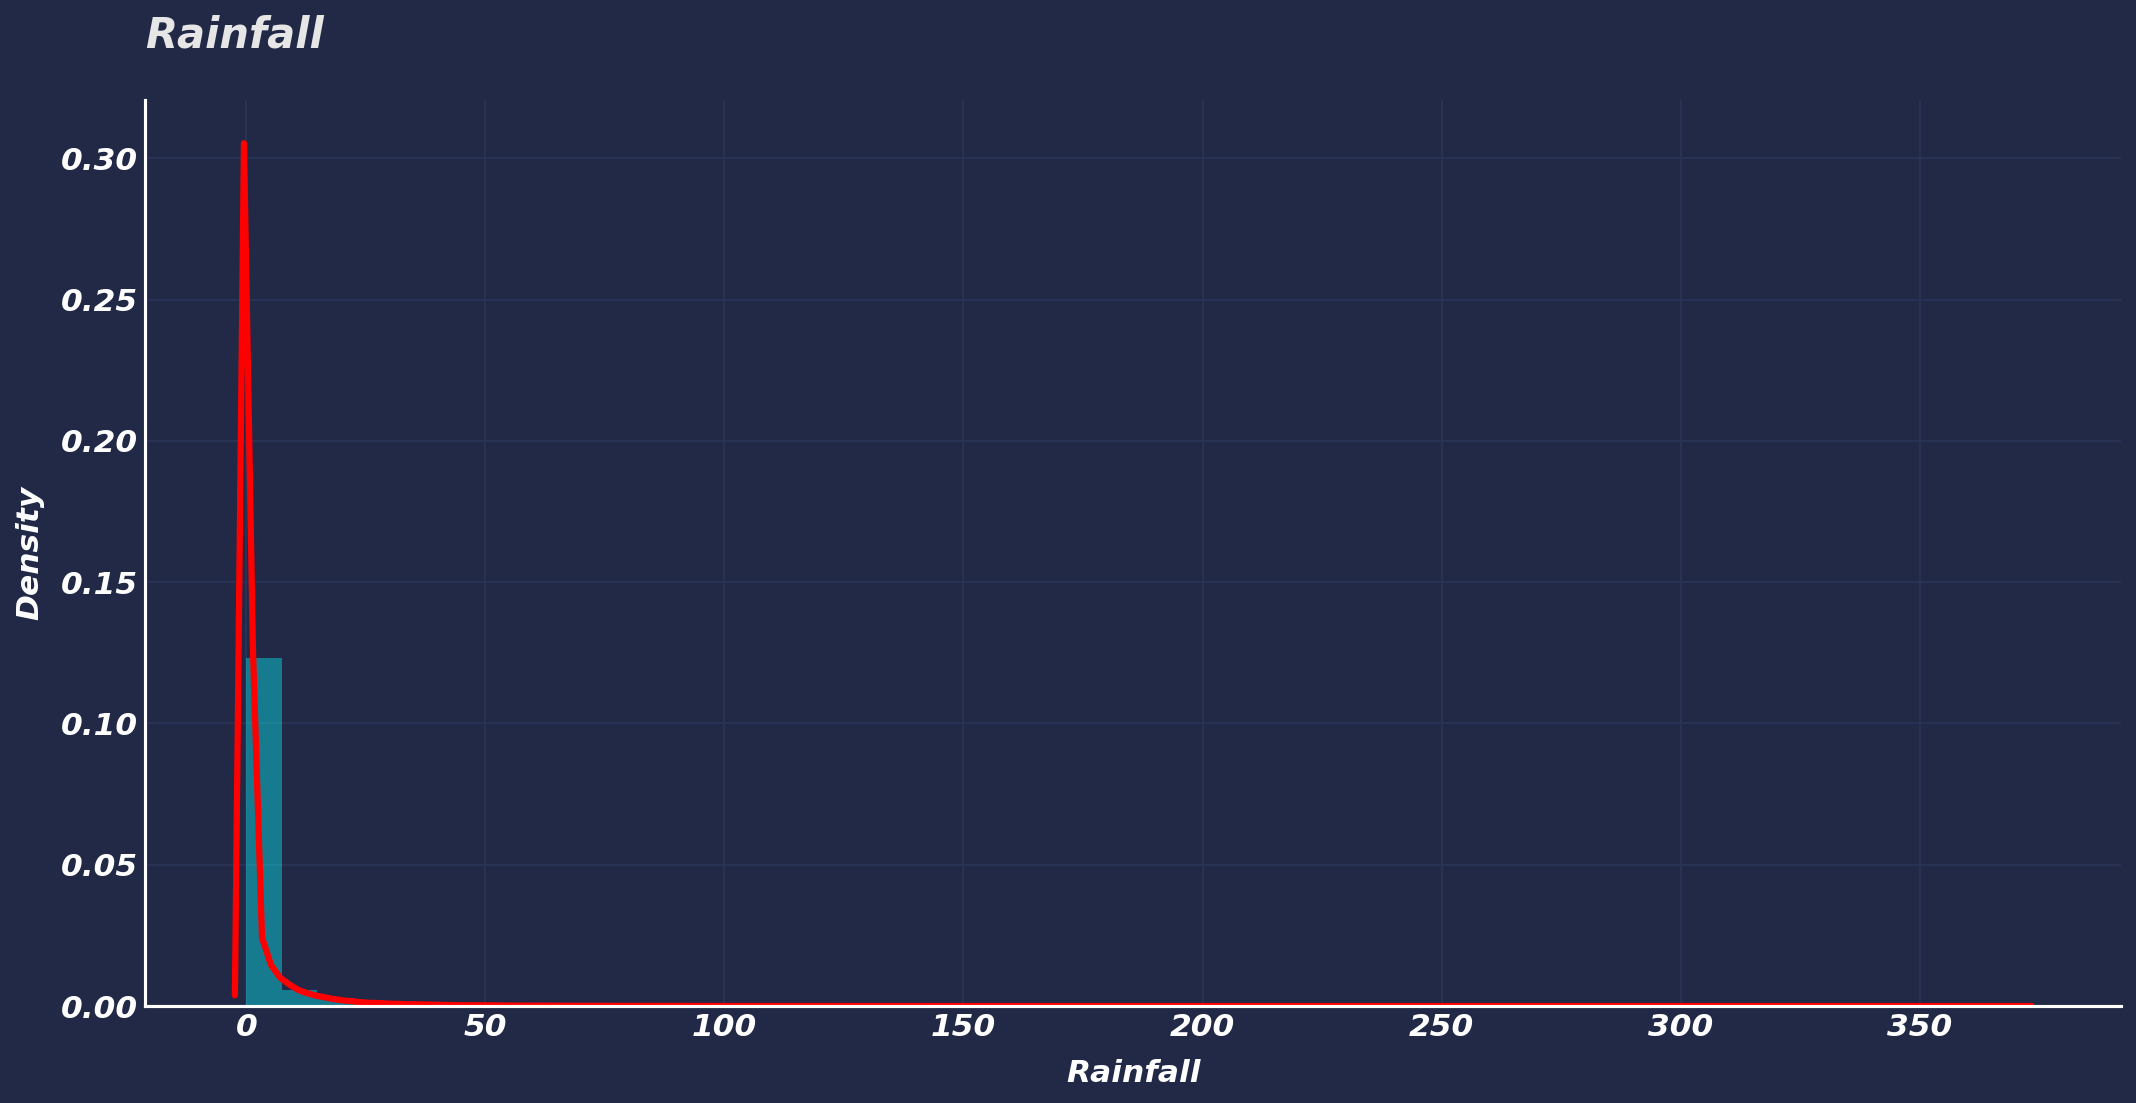

In [76]:
plt.figure(figsize=(17, 8)) 

#rainfall
sns.distplot(df.Rainfall, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Rainfall")

print(f"Rainfall skew: {df.Rainfall.skew()}")
print(f"Rainfall Kurt: {df.Rainfall.kurt()}")

In [77]:
#rata² rainfall berdasarkan RainTomorrow

df.groupby("RainTomorrow")["Rainfall"].mean().to_frame()

Rainfall
RainTomorrow          
0             1.270290
1             6.142104

In [78]:
df.query("Rainfall > 0")

Date Location  ...  date       Days
0      2008-12-01   Albury  ...     1     Monday
4      2008-12-05   Albury  ...     5     Friday
5      2008-12-06   Albury  ...     6   Saturday
9      2008-12-10   Albury  ...    10  Wednesday
11     2008-12-12   Albury  ...    12     Friday
...           ...      ...  ...   ...        ...
145391 2017-04-18    Uluru  ...    18    Tuesday
145392 2017-04-19    Uluru  ...    19  Wednesday
145393 2017-04-20    Uluru  ...    20   Thursday
145394 2017-04-21    Uluru  ...    21     Friday
145429 2017-05-26    Uluru  ...    26     Friday

[50512 rows x 27 columns]

Text(0.0, 1.0, 'Rainfall berdasarkan rain tomorrow ')

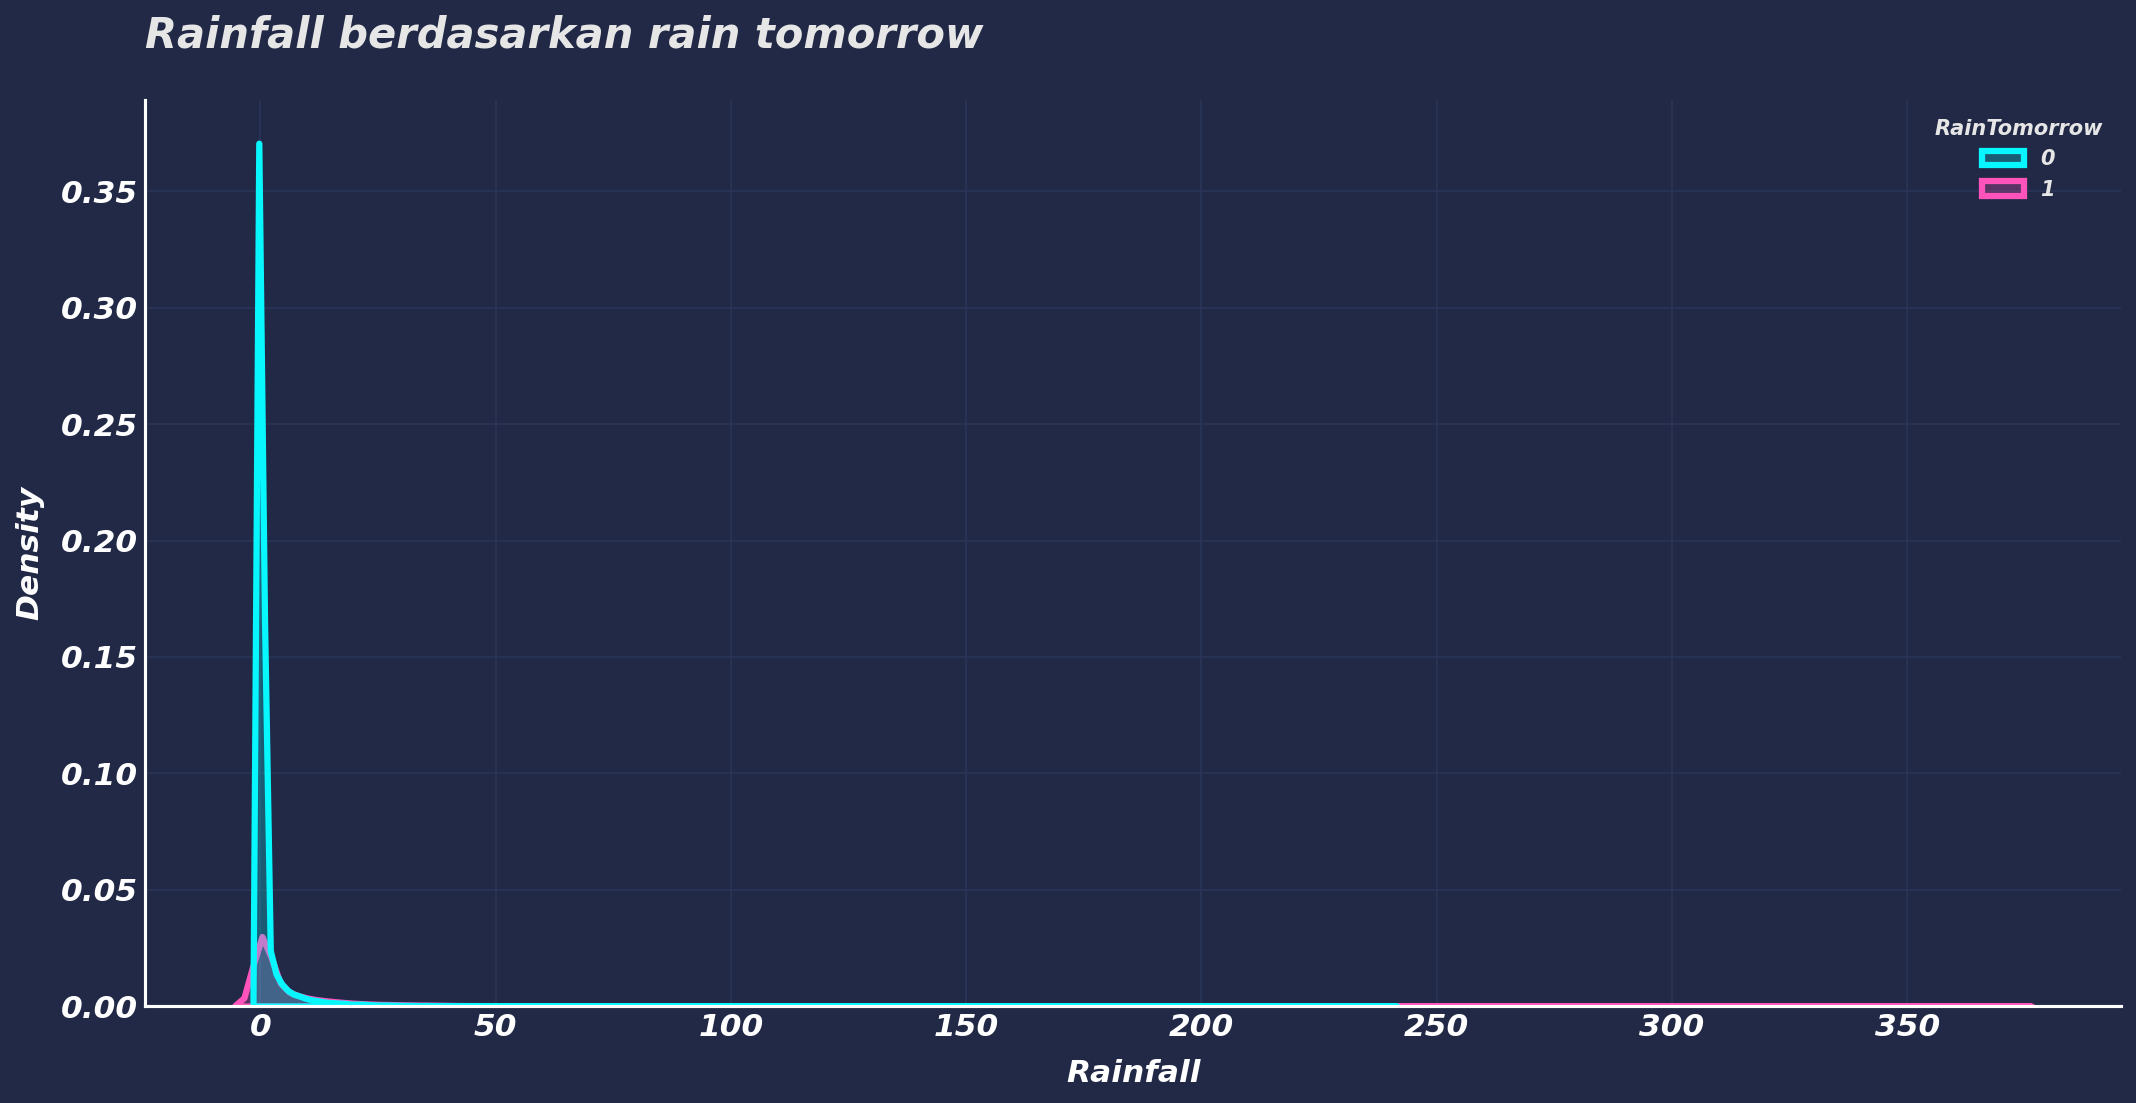

In [79]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Rainfall, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Rainfall berdasarkan rain tomorrow ") 

In [80]:
# fillna rainfall with median

df["Rainfall"].fillna(df.Rainfall.median(),inplace=True) 

### evaporation

Evaporation skew: 9.934022582520994
Evaporation Kurt: 181.65785073454452


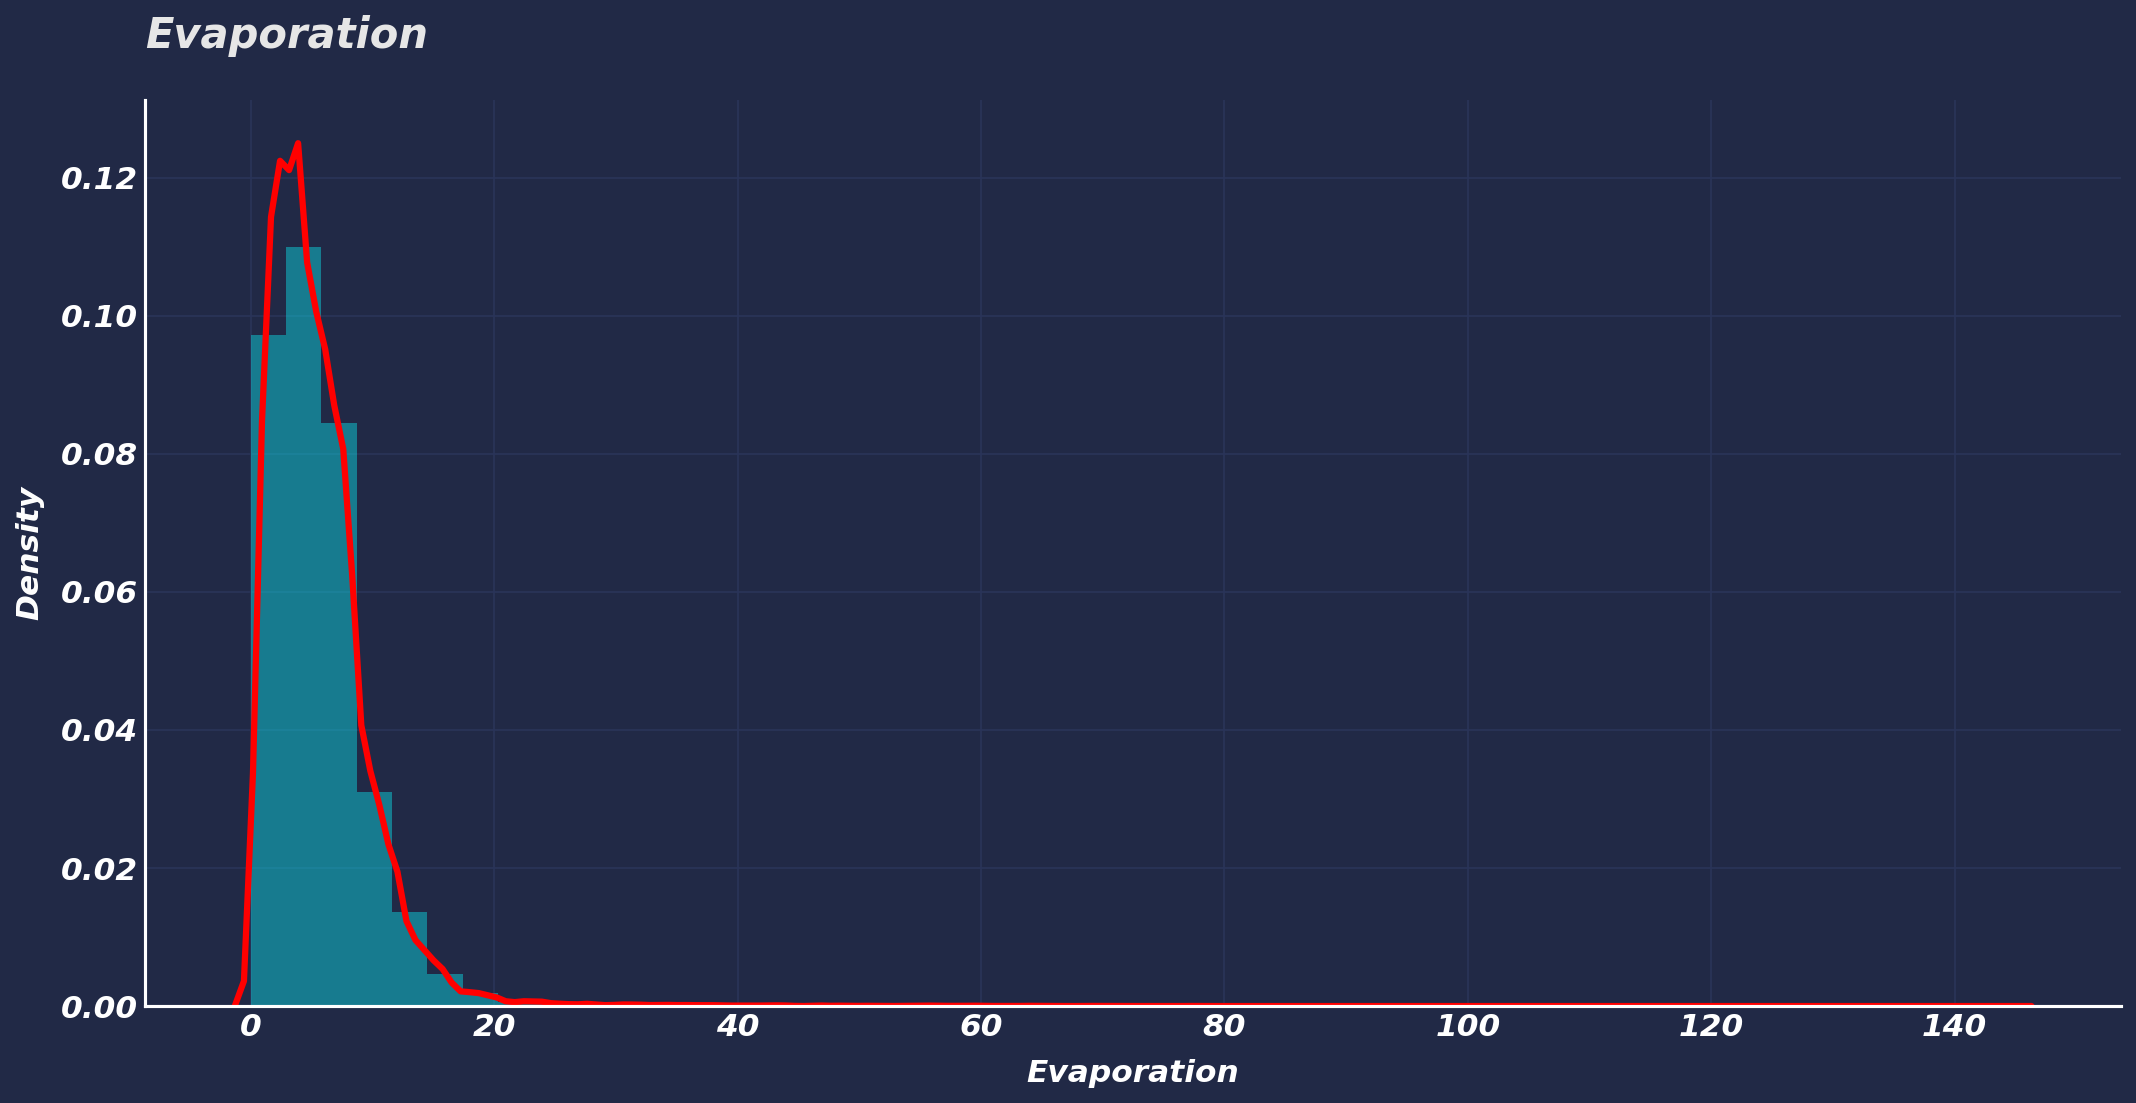

In [81]:
plt.figure(figsize=(17, 8)) 

#evaporation
sns.distplot(df.Evaporation, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Evaporation")

print(f"Evaporation skew: {df.Rainfall.skew()}")
print(f"Evaporation Kurt: {df.Rainfall.kurt()}")

Text(0.0, 1.0, 'Evaporation berdasarkan rain tomorrow ')

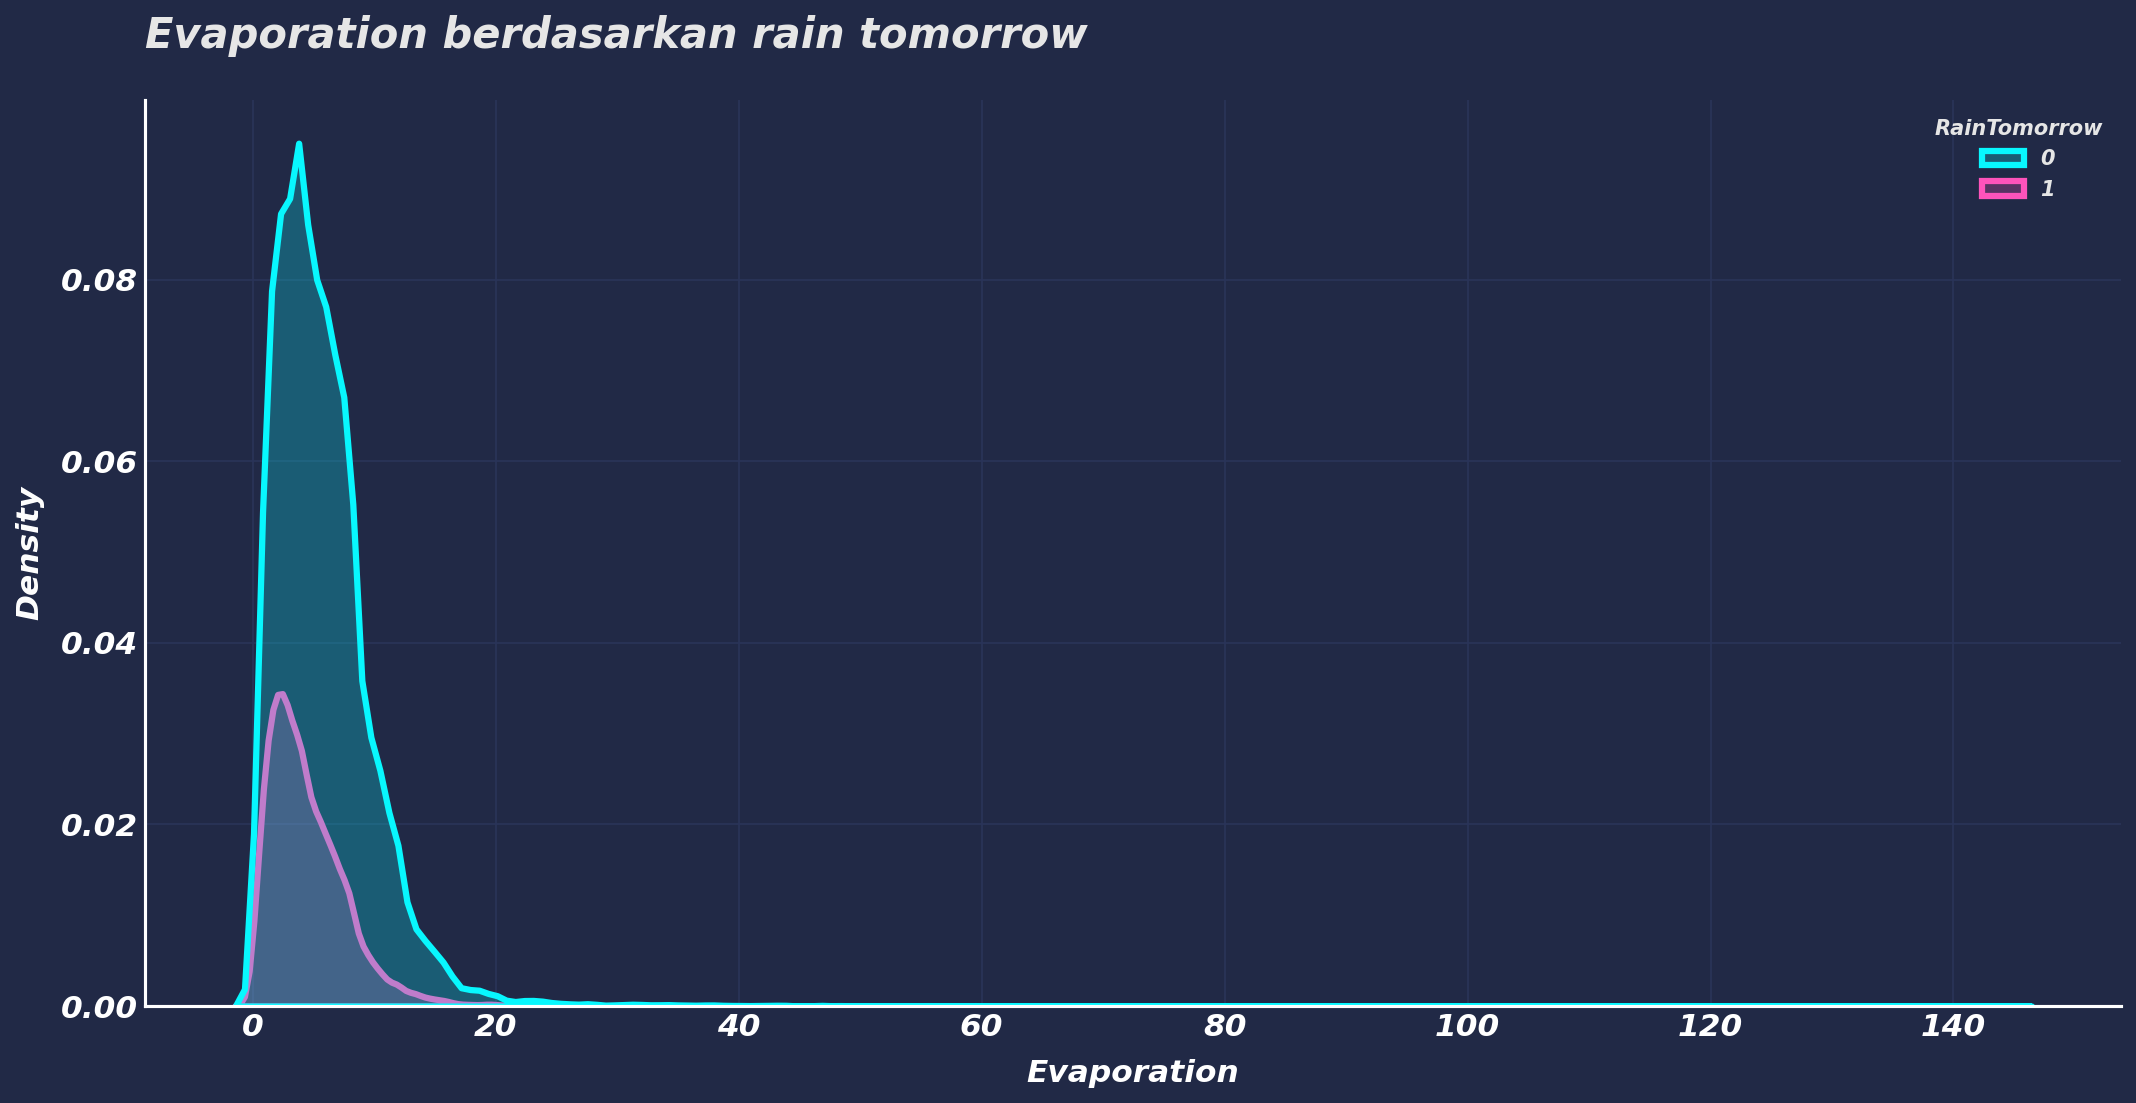

In [82]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Evaporation, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Evaporation berdasarkan rain tomorrow ") 

Text(0.0, 1.0, 'Evaporation berdasarkan rain tomorrow ')

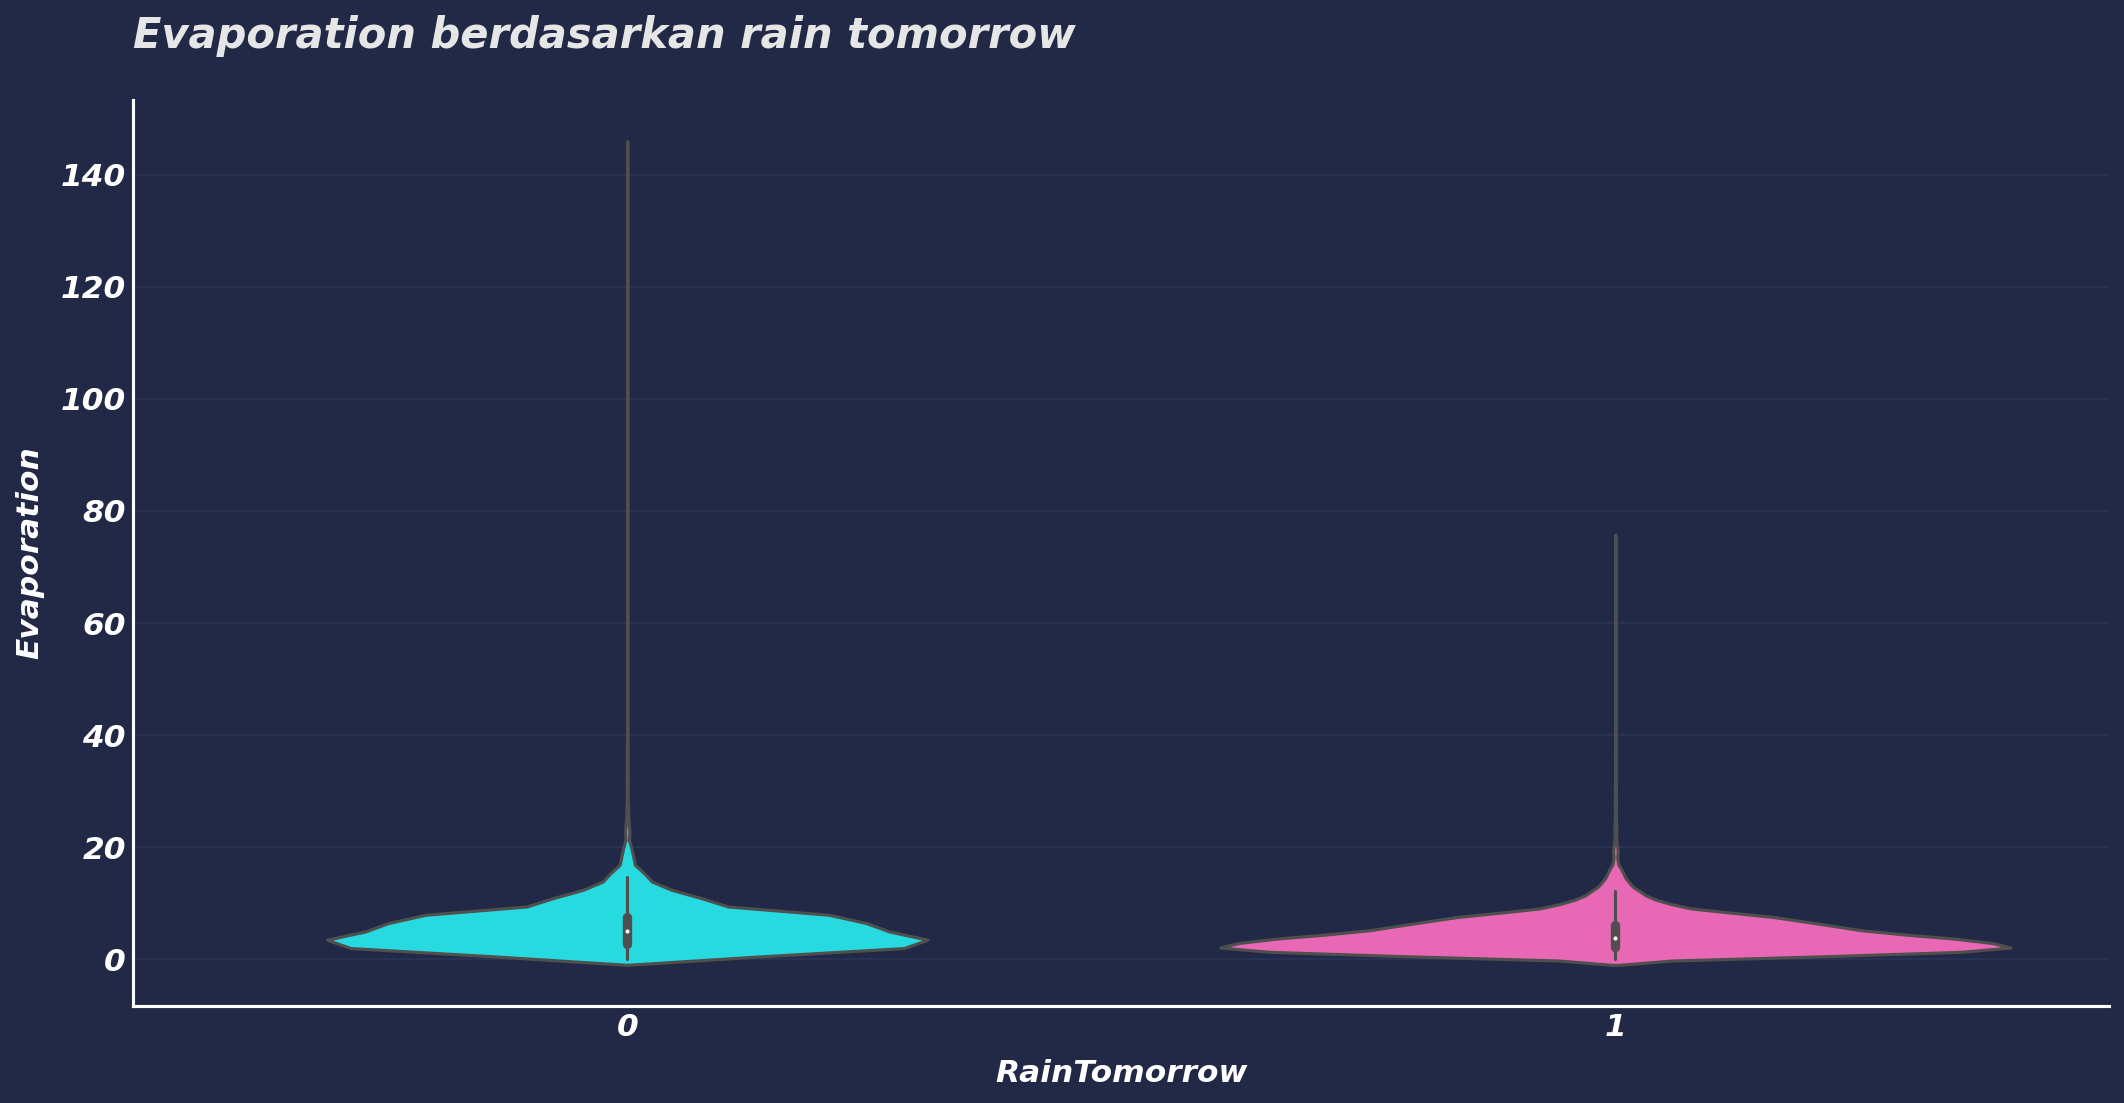

In [83]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Evaporation, x=df.RainTomorrow) 
plt.title("Evaporation berdasarkan rain tomorrow ") 

In [84]:
df.groupby("RainTomorrow")["Evaporation"].mean().to_frame() 

Evaporation
RainTomorrow             
0                5.734807
1                4.527779

In [85]:
# drop evaporation karena banyak nya null
df.drop("Evaporation",axis=1,inplace=True)

In [86]:
number = number.to_list()

In [87]:
#drop evaporation from numerical features

number.remove("Evaporation")

### Sunshine

Sunshine skew: -0.5029112767235805
Sunshine Kurt: -0.8203636955424218


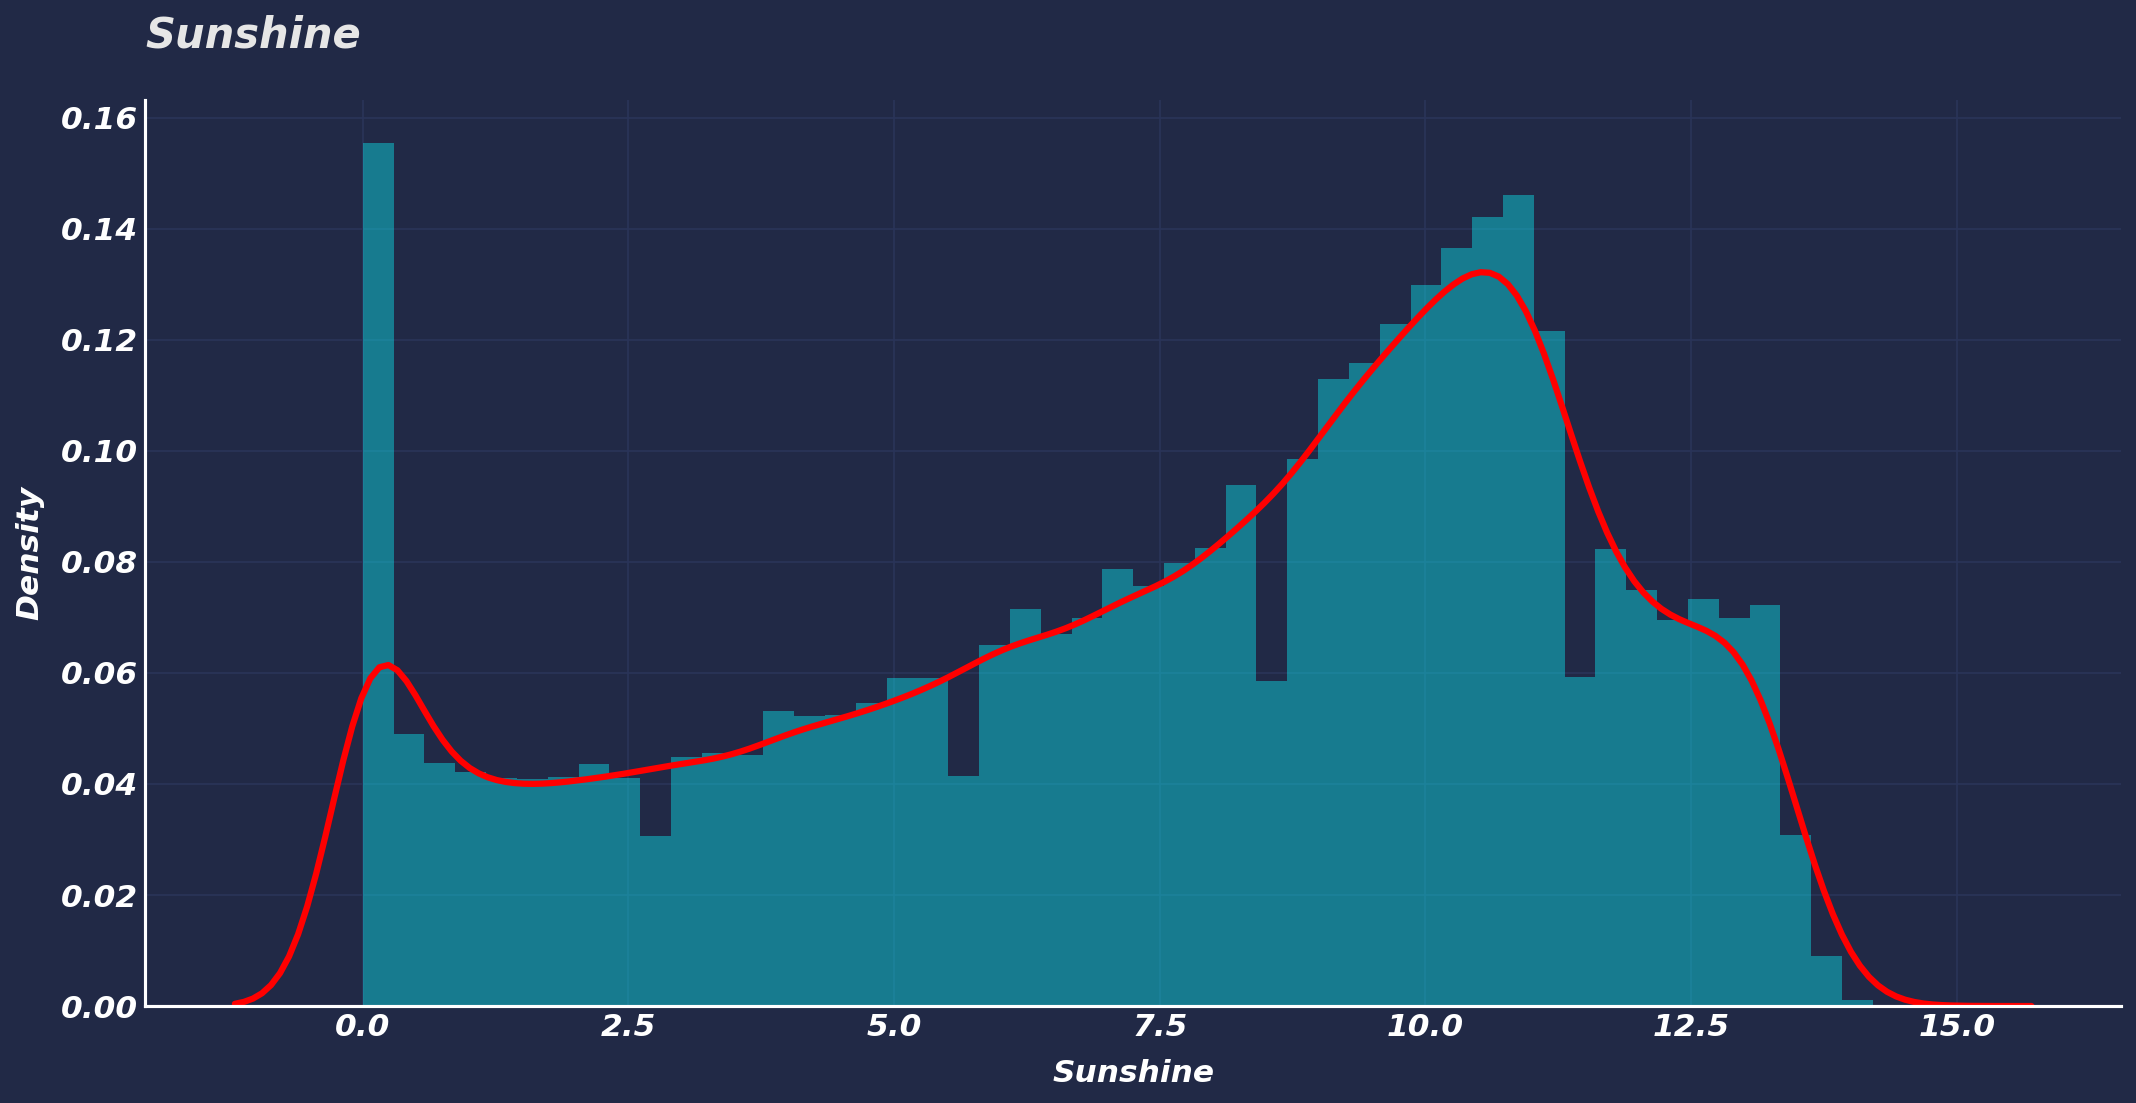

In [88]:
plt.figure(figsize=(17, 8)) 

#Sunshine
sns.distplot(df.Sunshine, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine Kurt: {df.Sunshine.kurt()}")

Text(0.0, 1.0, 'Sunshine berdasarkan rain tomorrow ')

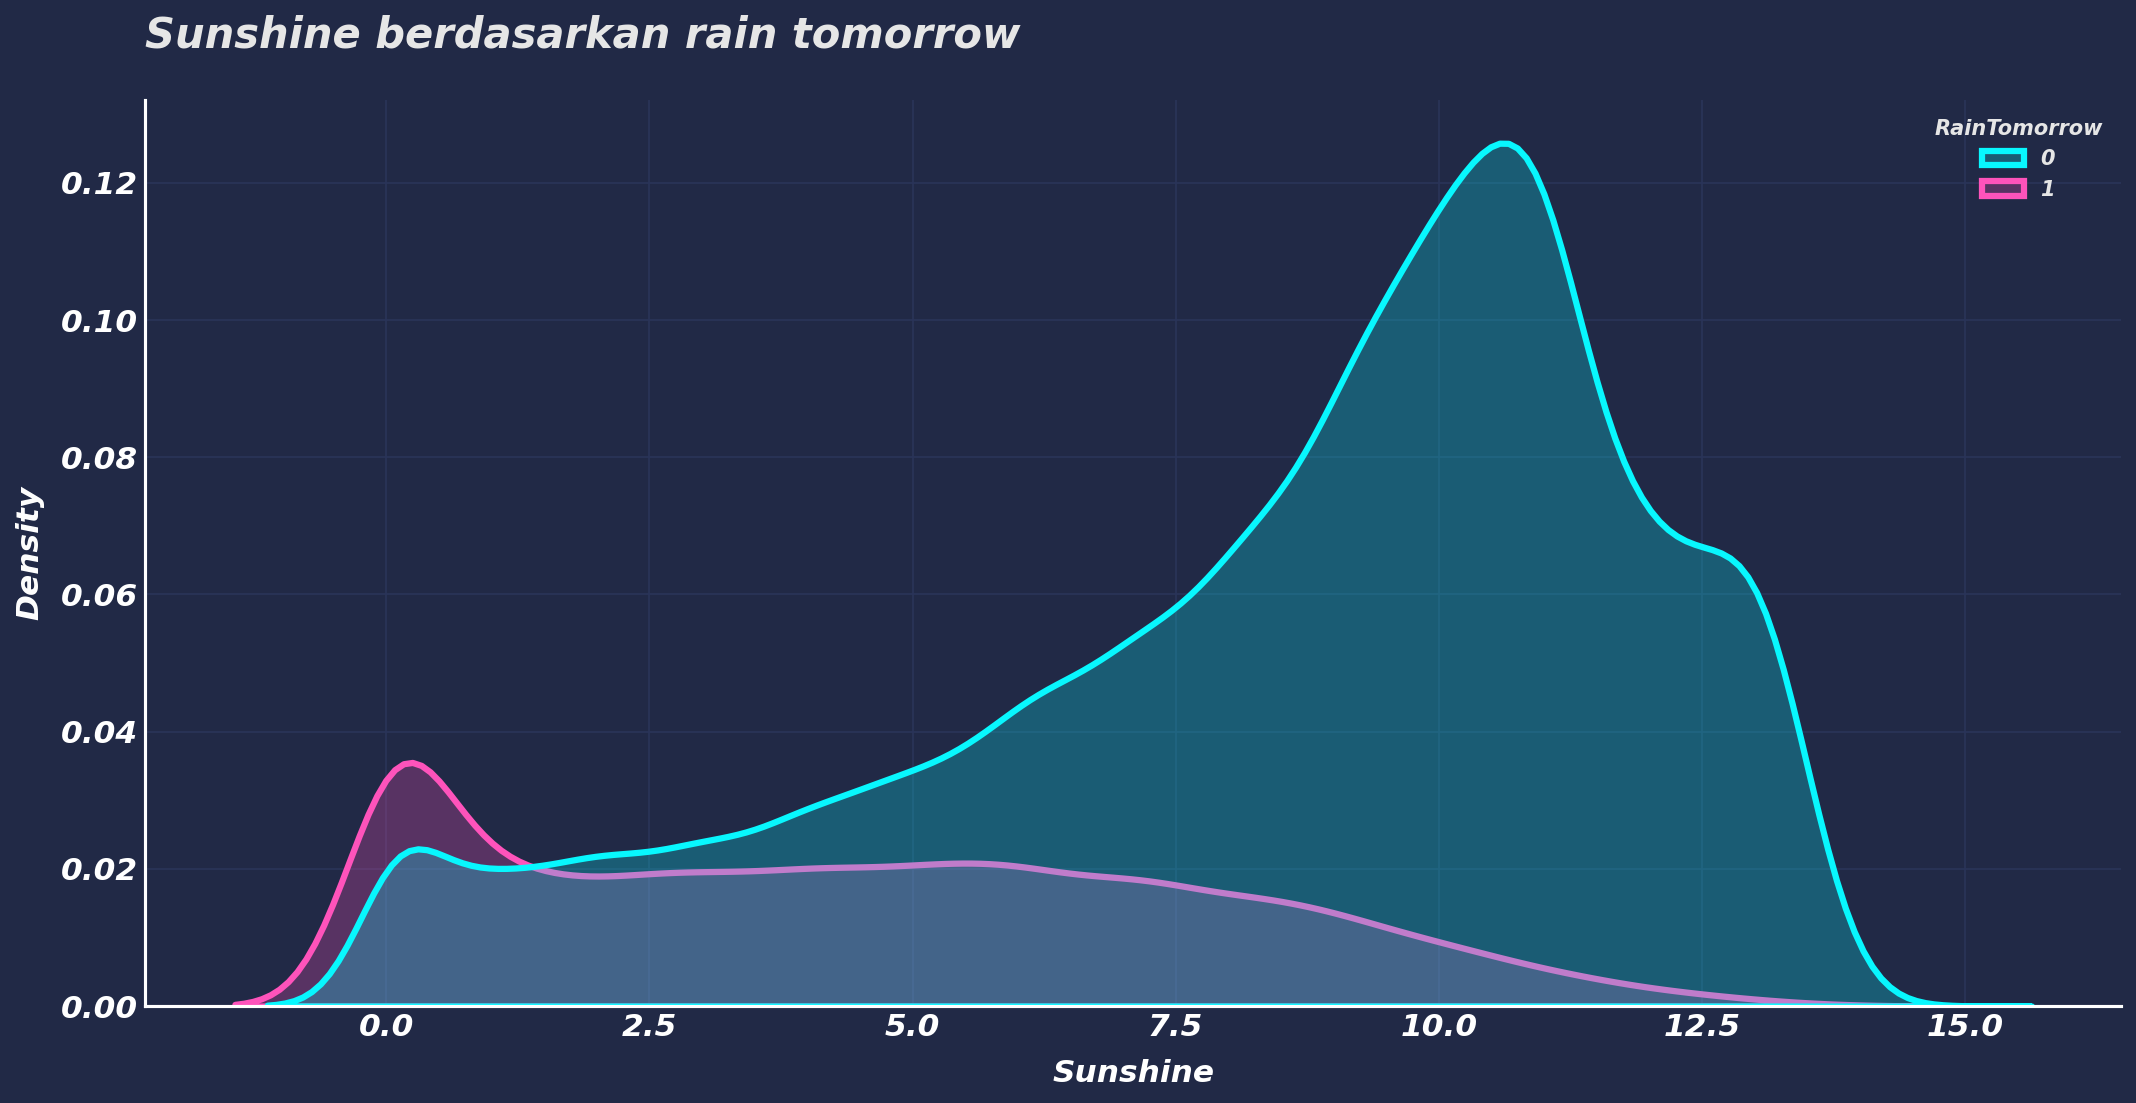

In [89]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Sunshine, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

Text(0.0, 1.0, 'Sunshine berdasarkan rain tomorrow ')

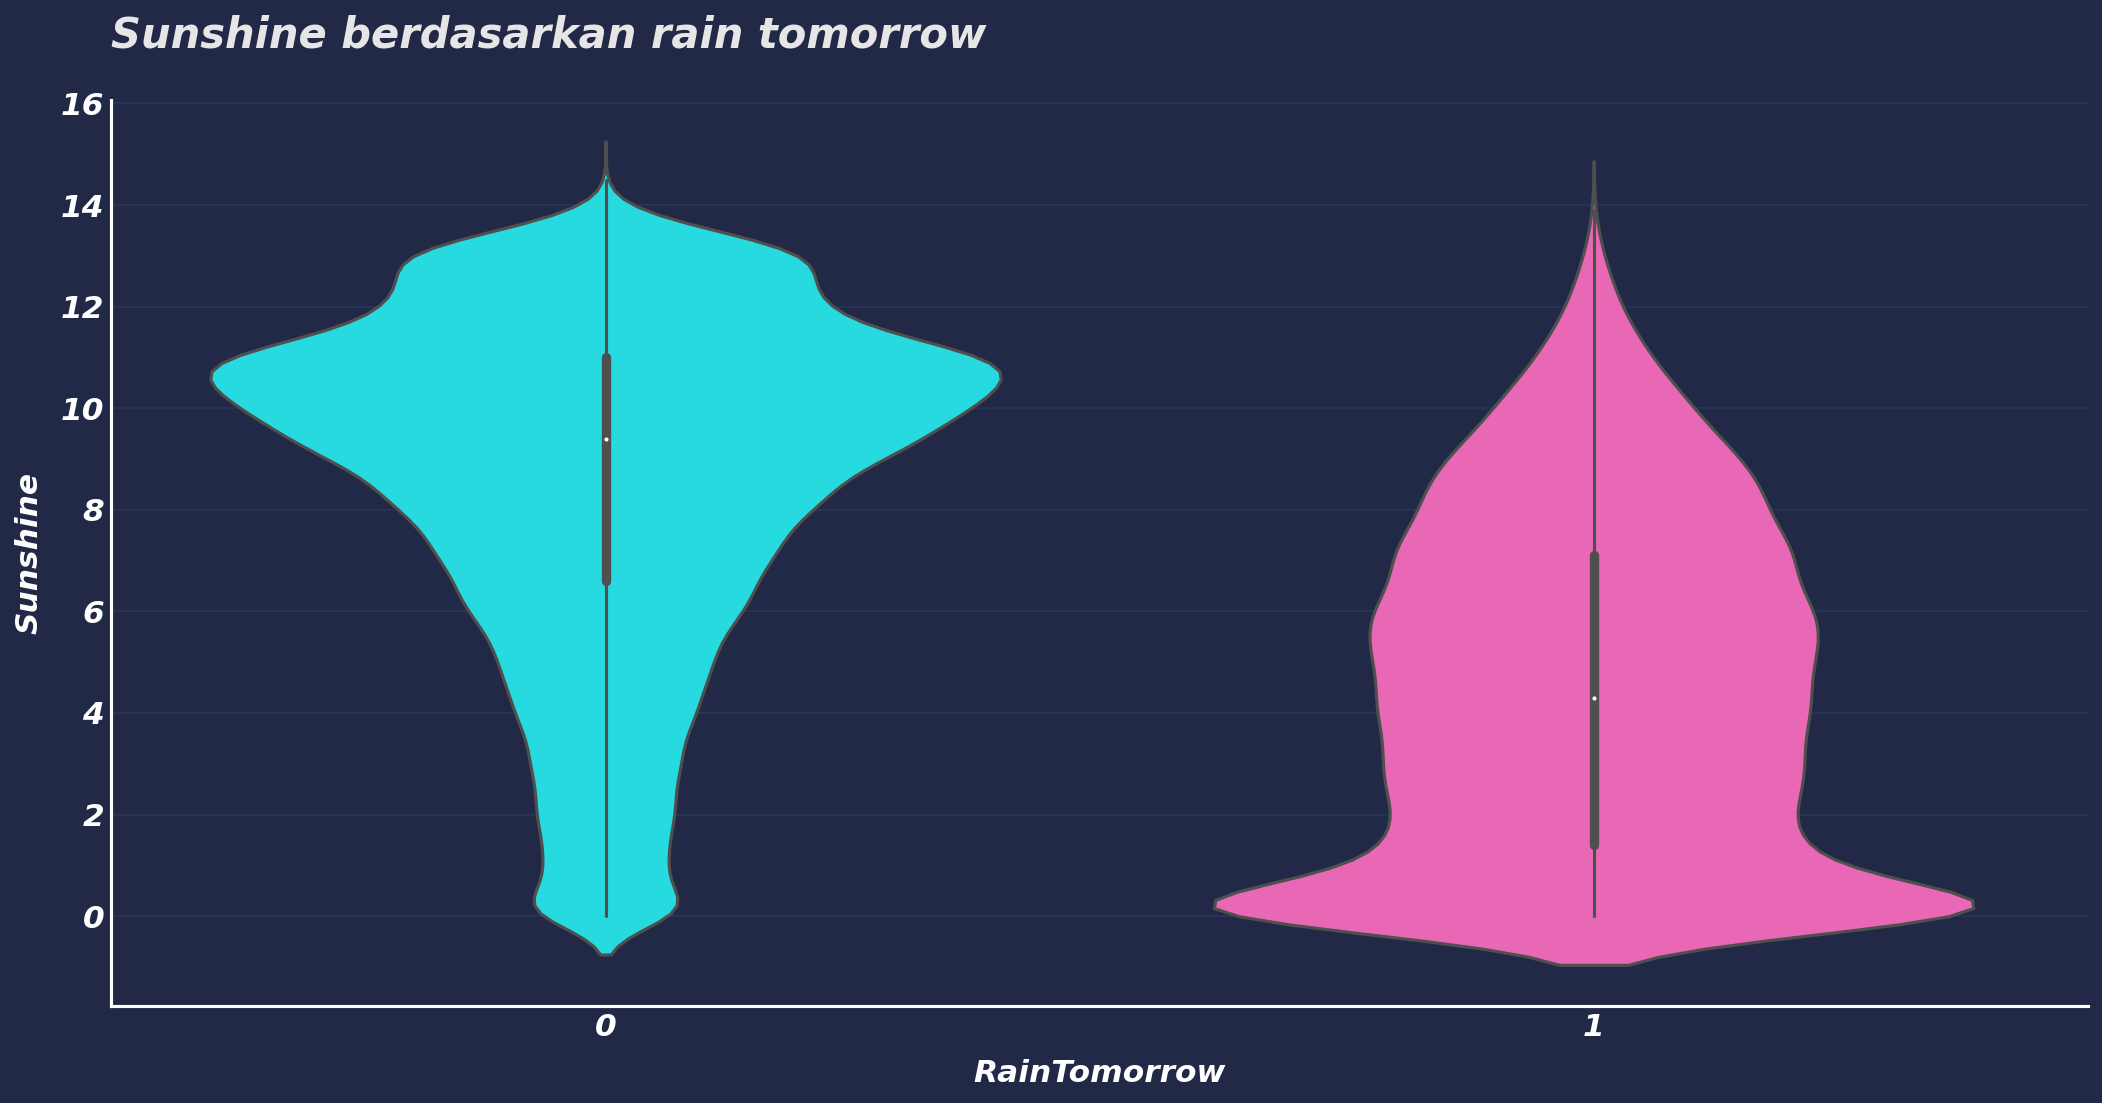

In [90]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine, x=df.RainTomorrow) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

In [91]:
# fill sunshine berdasarkan temp3pm & bfill

df["Sunshine"] = df.groupby("Temp3pm")["Sunshine"].apply(lambda x: x.fillna(x.median()))
df["Sunshine"].fillna(method="bfill",inplace=True) 

Sunshine skew: -0.652724109951126
Sunshine Kurt: -0.2112142941315085


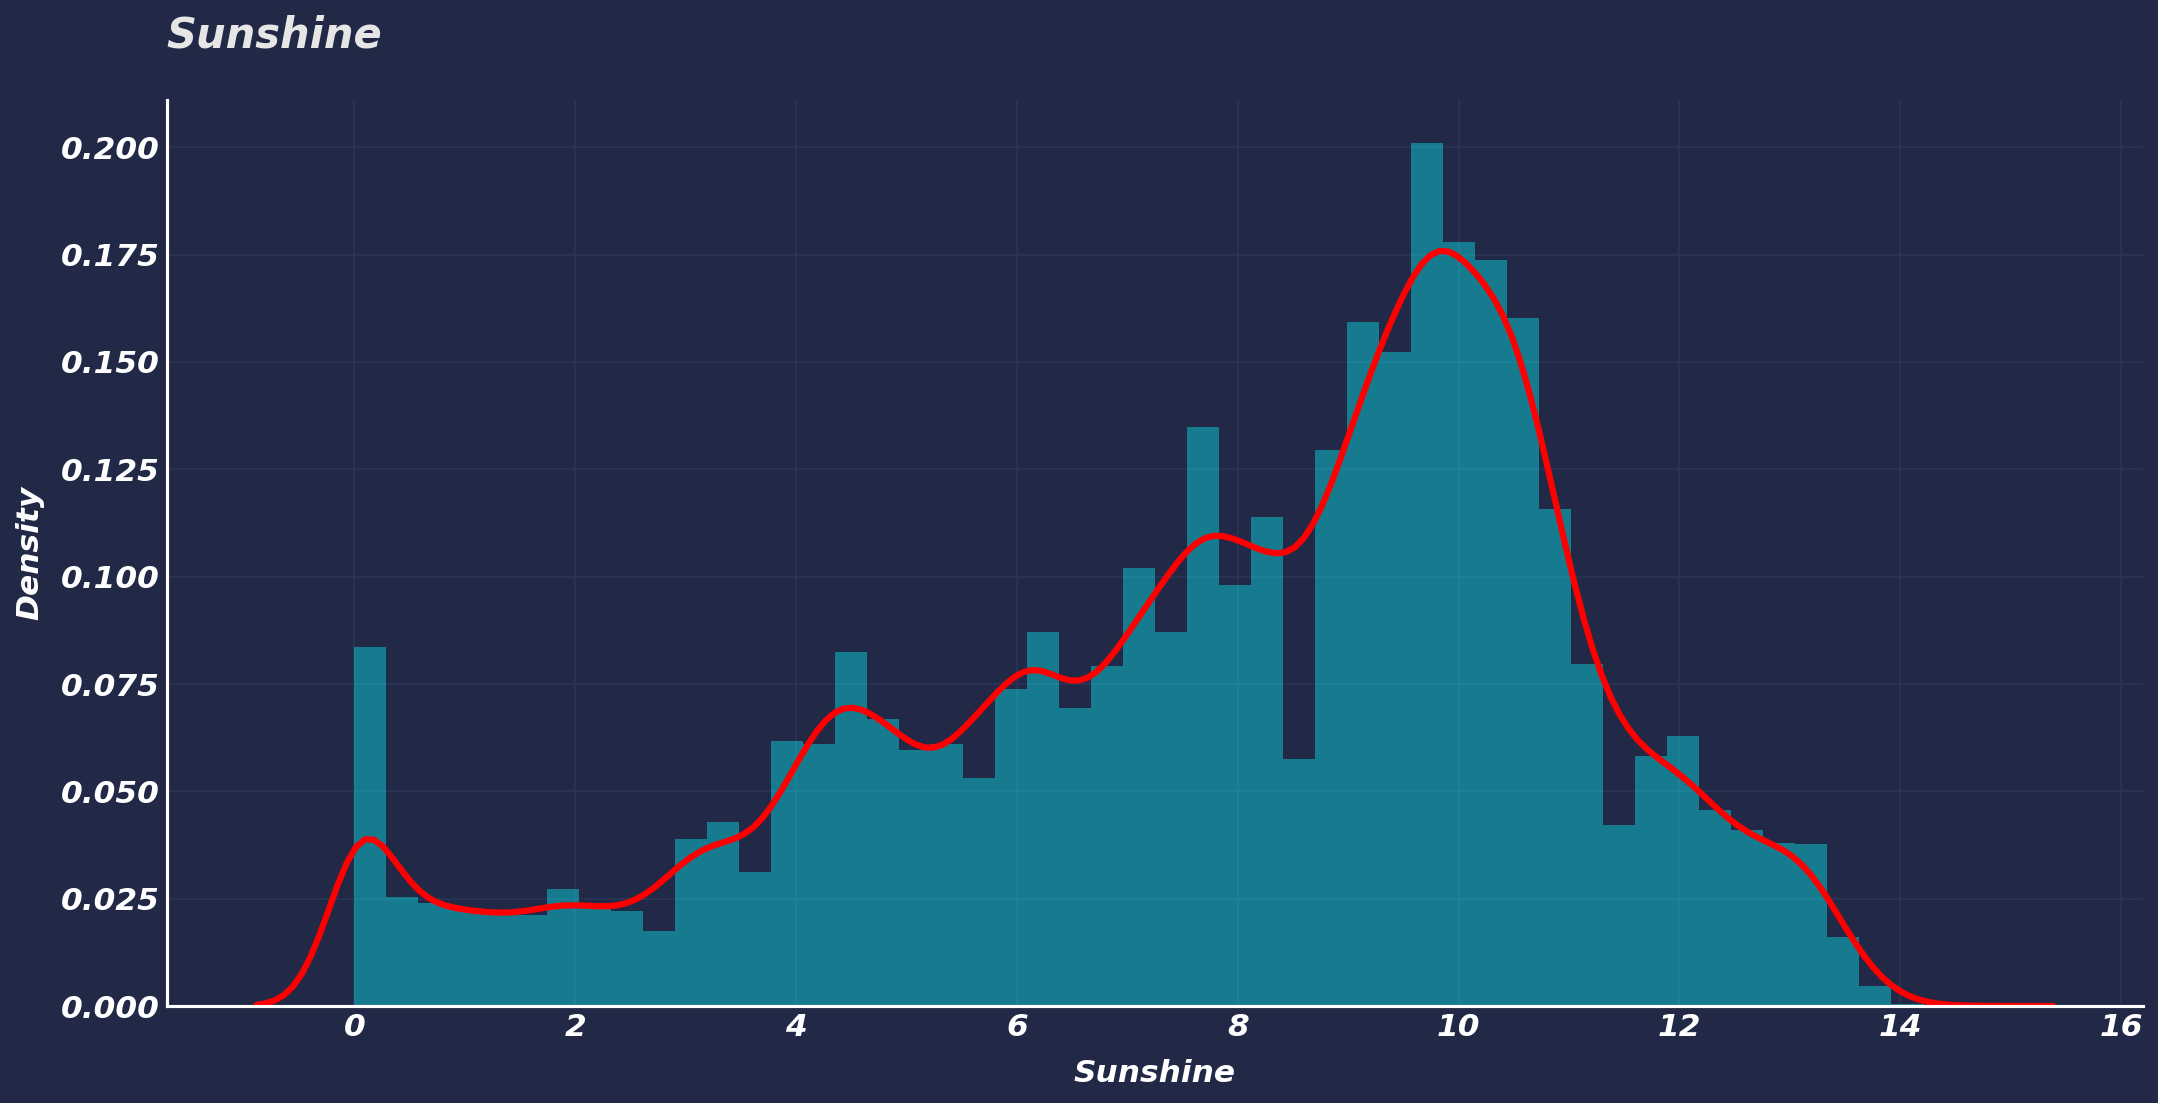

In [92]:
#after fillna 

plt.figure(figsize=(17, 8)) 

#Sunshine
sns.distplot(df.Sunshine, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine Kurt: {df.Sunshine.kurt()}")

Text(0.0, 1.0, 'Sunshine berdasarkan rain tomorrow ')

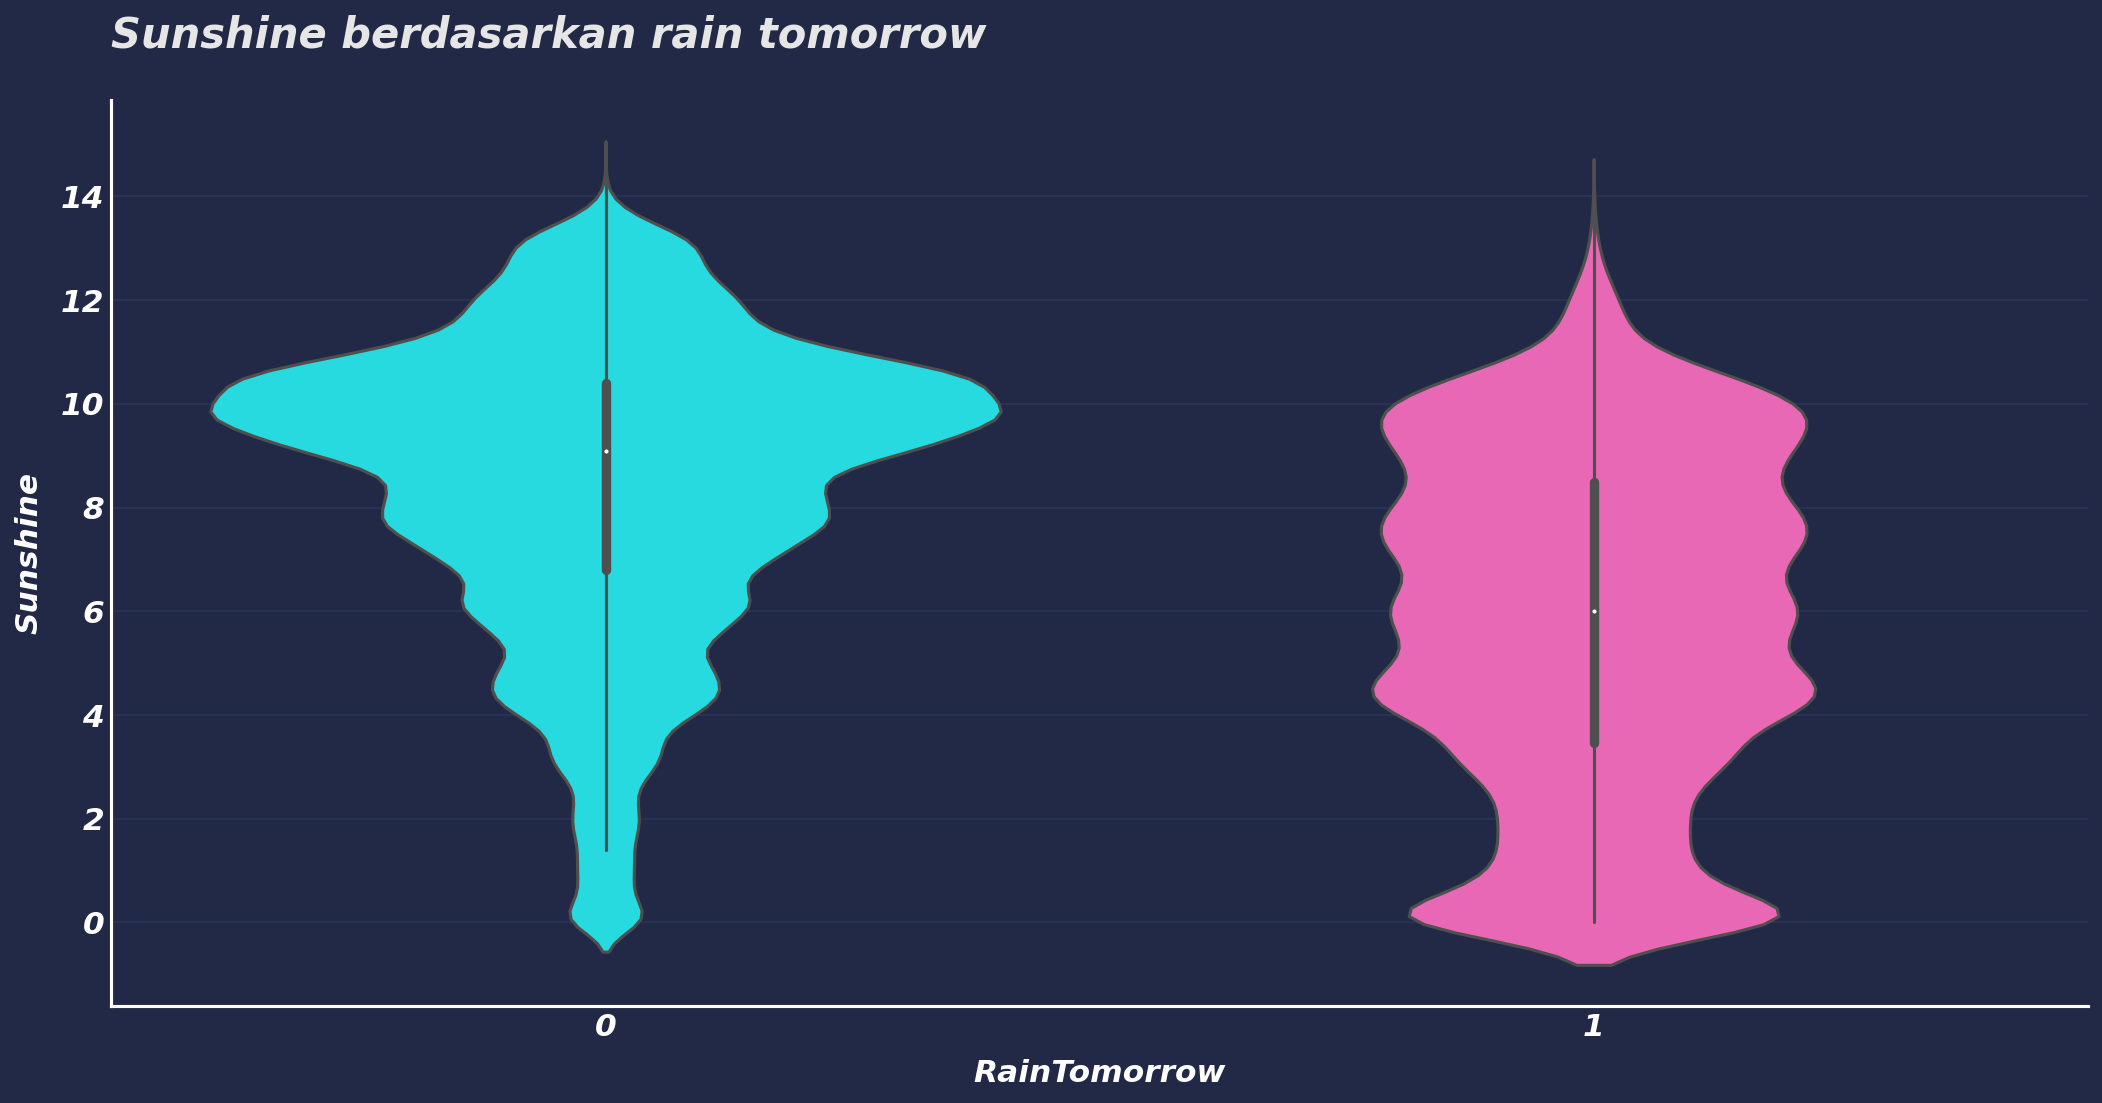

In [93]:
#after fillna 

plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine, x=df.RainTomorrow) 
plt.title("Sunshine berdasarkan rain tomorrow ") 

In [94]:
#rata² sunshine berdasarkan RainTomorrow
df.groupby("RainTomorrow")["Sunshine"].mean().to_frame() 

Sunshine
RainTomorrow          
0             8.447183
1             5.801816

### windgustspeed

WindGustSpeed skew: 0.8743045672925758
WindGustSpeed Kurt: 1.4178546324811987


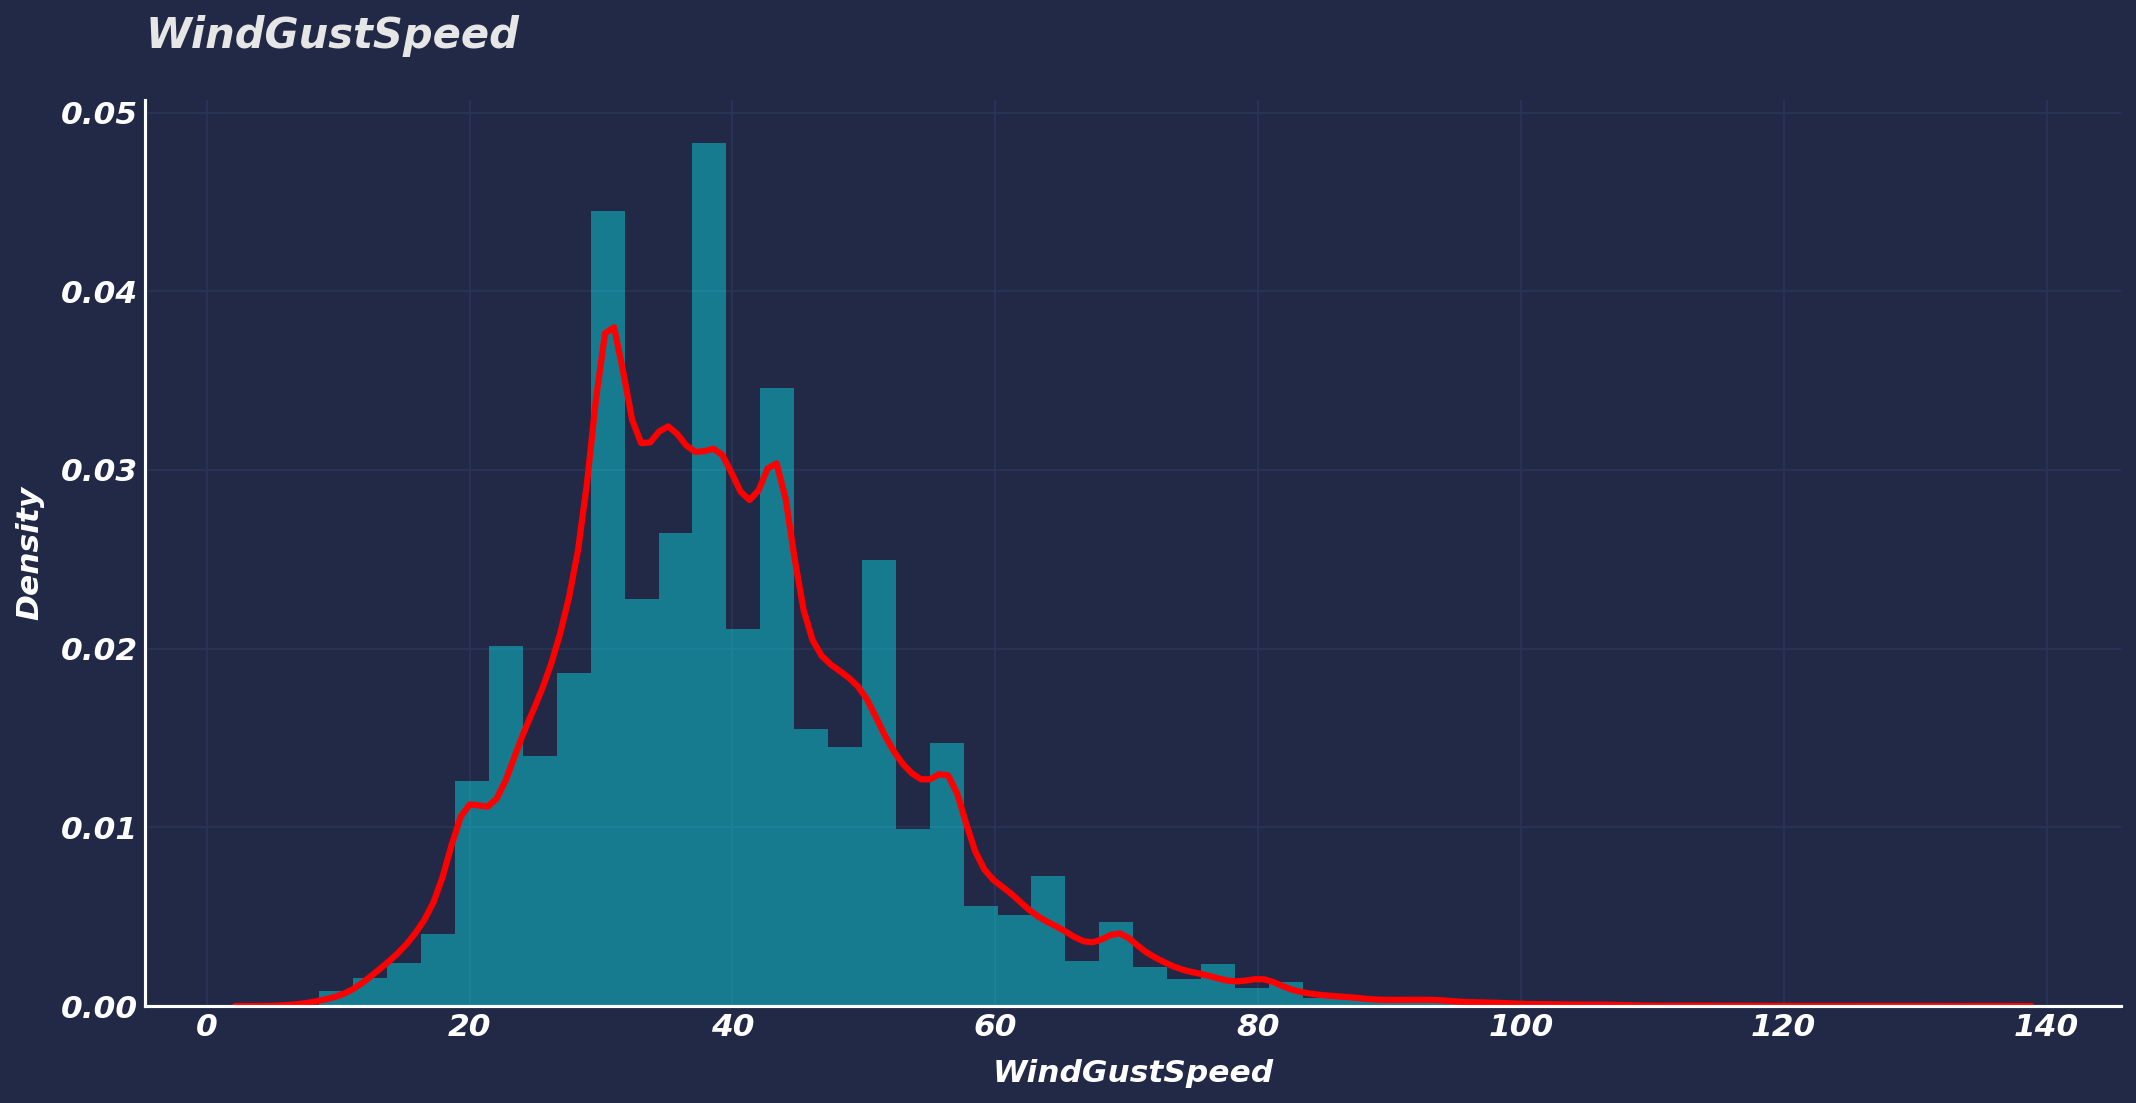

In [95]:
plt.figure(figsize=(17, 8)) 

#WindGustSpeed
sns.distplot(df.WindGustSpeed, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindGustSpeed")

print(f"WindGustSpeed skew: {df.WindGustSpeed.skew()}")
print(f"WindGustSpeed Kurt: {df.WindGustSpeed.kurt()}")

Text(0.0, 1.0, 'WindGustSpeed berdasarkan rain tomorrow ')

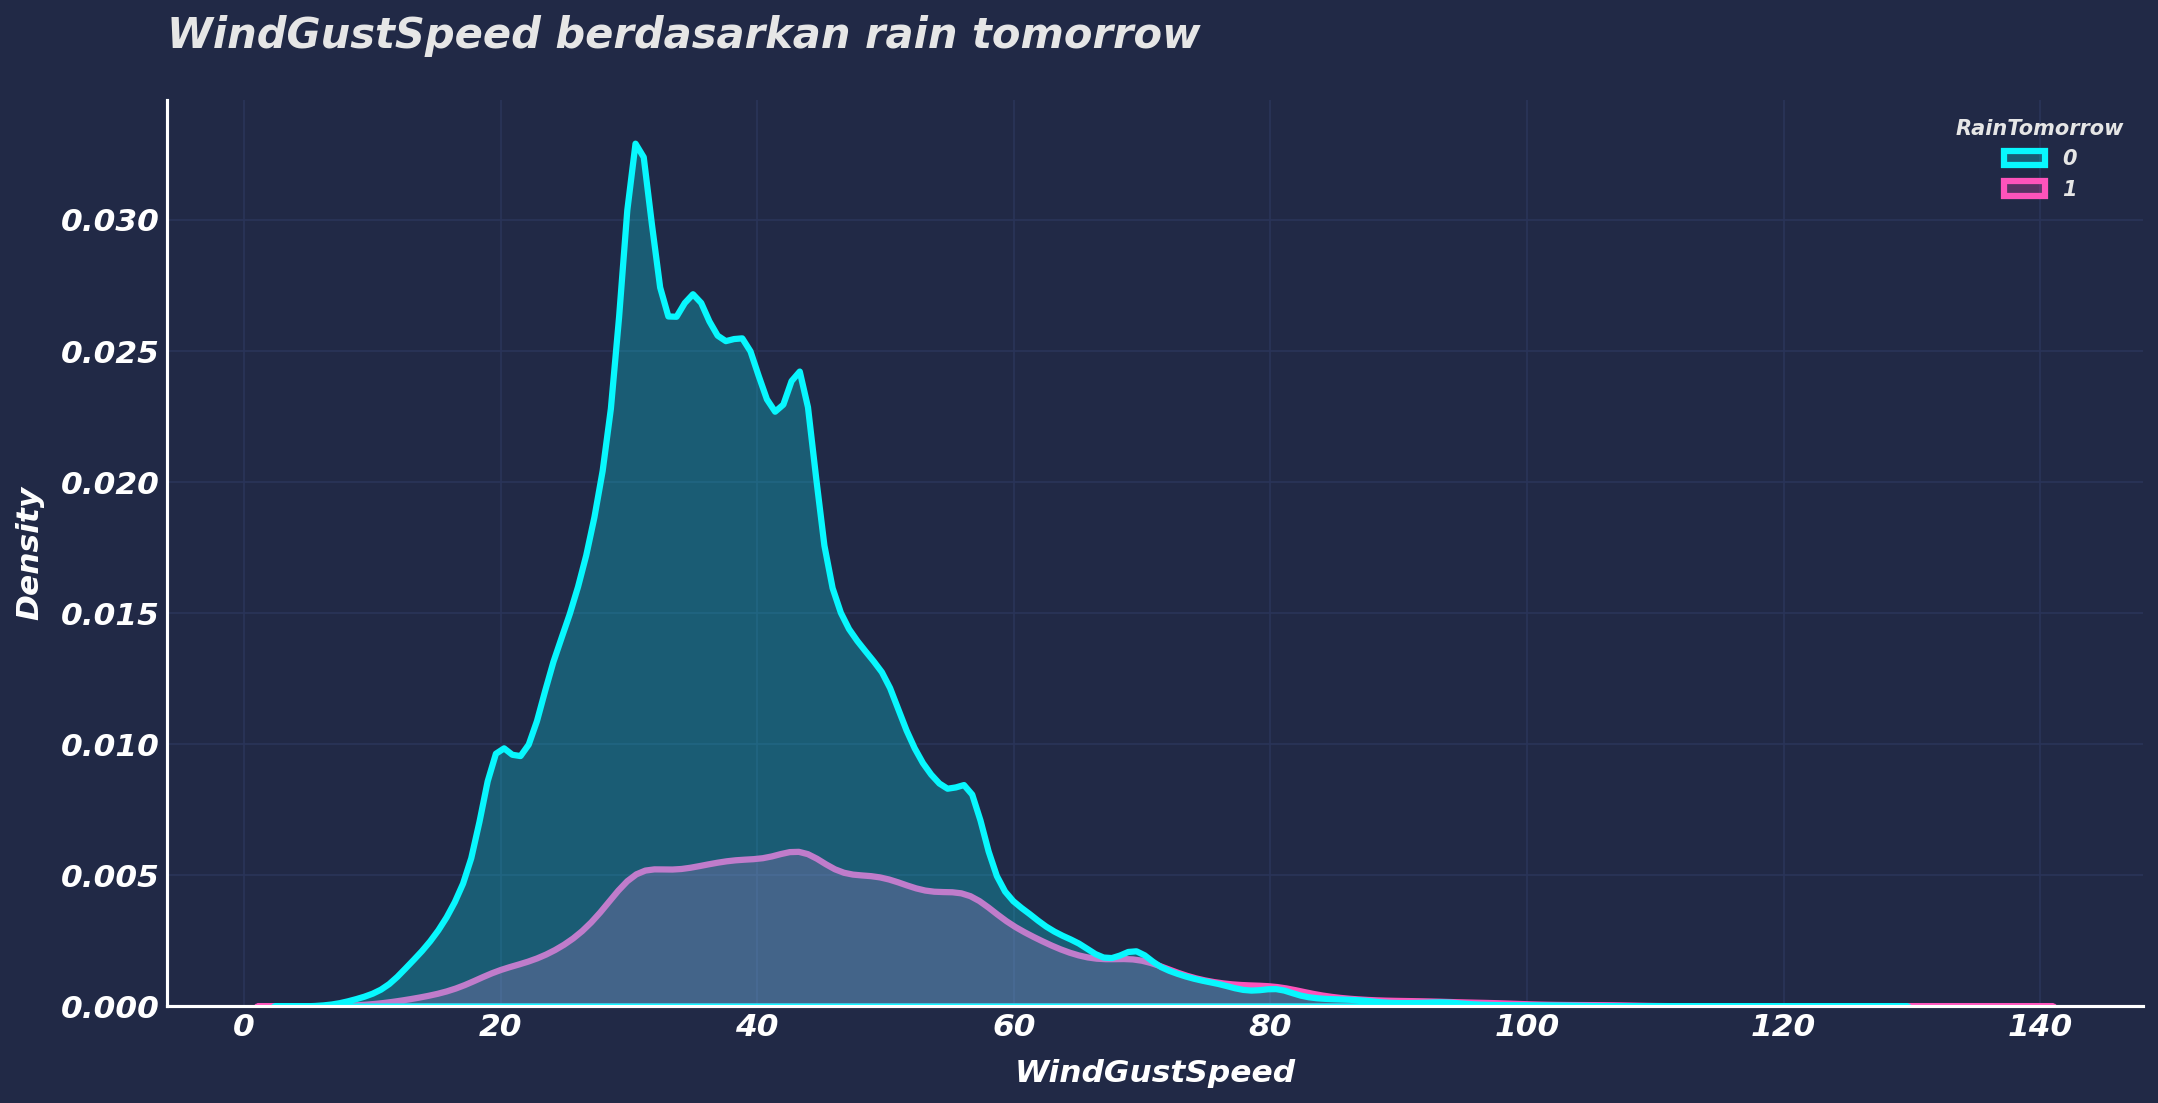

In [96]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.WindGustSpeed, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("WindGustSpeed berdasarkan rain tomorrow ") 

Text(0.0, 1.0, 'WindGustSpeed berdasarkan rain tomorrow ')

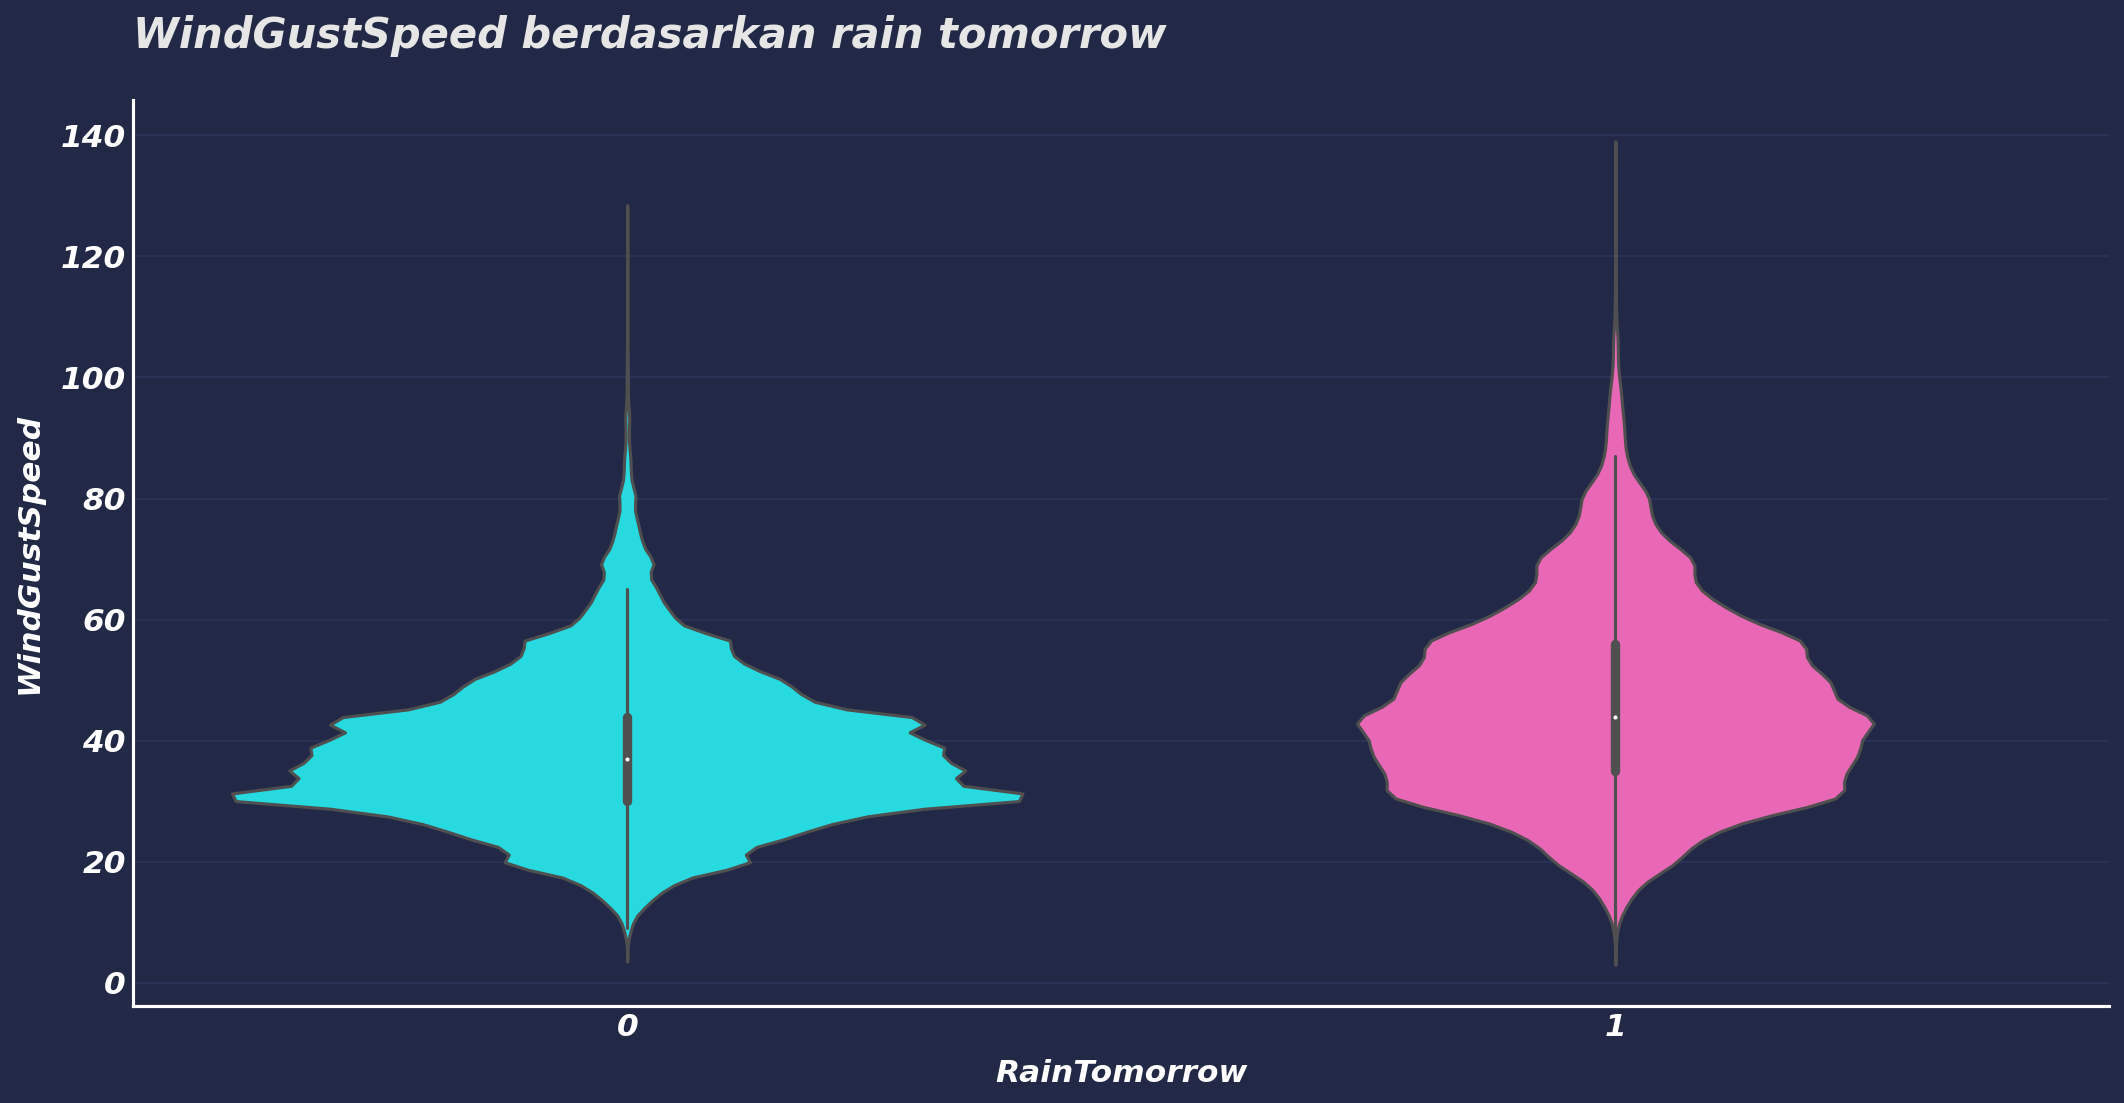

In [97]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.WindGustSpeed, x=df.RainTomorrow) 
plt.title("WindGustSpeed berdasarkan rain tomorrow ") 

In [98]:
#rata² WindGustSpeed berdasarkan RainTomorrow

df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

WindGustSpeed
RainTomorrow               
0                 38.288391
1                 45.946764

In [99]:
#fillna WindGustSpeed with windspeed3pm

df["WindGustSpeed"] = df.groupby("WindSpeed3pm")["WindGustSpeed"].apply(lambda x: x.fillna(x.median())) 
df["WindGustSpeed"].fillna(method ="bfill", inplace=True) 

In [100]:
#after fillna
df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

WindGustSpeed
RainTomorrow               
0                 38.318685
1                 45.403332

# windspeed3pm & windspeed9am

WindSpeed3pm skew: 0.6314326033476736
WindSpeed3pm Kurt: 0.7758645439565219

WindSpeed9am skew: 0.7754936899676234
WindSpeed9am Kurt: 1.2265551319579733


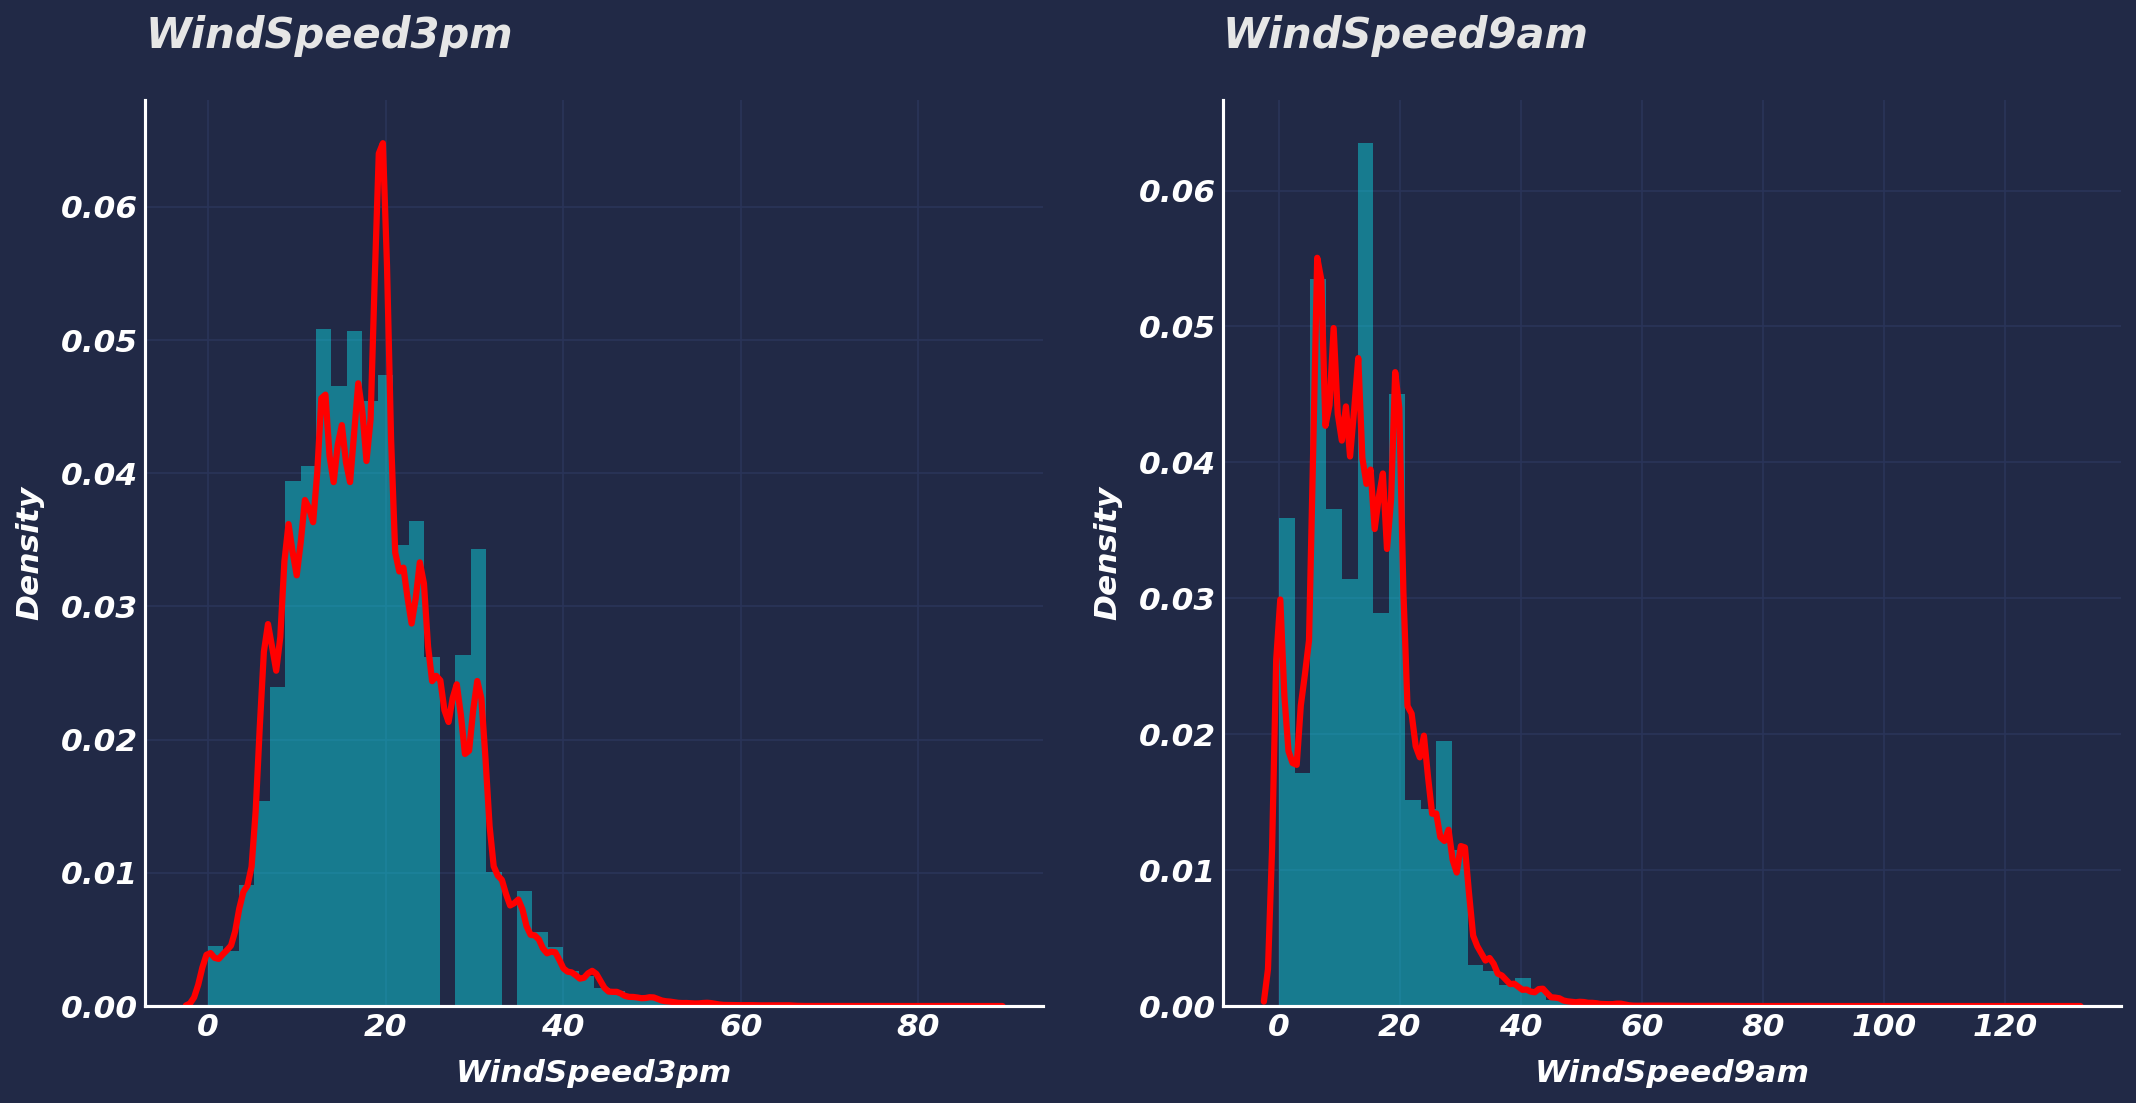

In [101]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#windspeed3pm
plt.subplot(121) 
sns.distplot(df.WindSpeed3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindSpeed3pm")

#windspeed9pm
plt.subplot(122) 
sns.distplot(df.WindSpeed9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("WindSpeed9am")


print(f"WindSpeed3pm skew: {df.WindSpeed3pm.skew()}")
print(f"WindSpeed3pm Kurt: {df.WindSpeed3pm.kurt()}")
print("") 
print(f"WindSpeed9am skew: {df.WindSpeed9am.skew()}")
print(f"WindSpeed9am Kurt: {df.WindSpeed9am.kurt()}")

Text(0.0, 1.0, 'WindSpedd9am berdasarkan rain tomorrow')

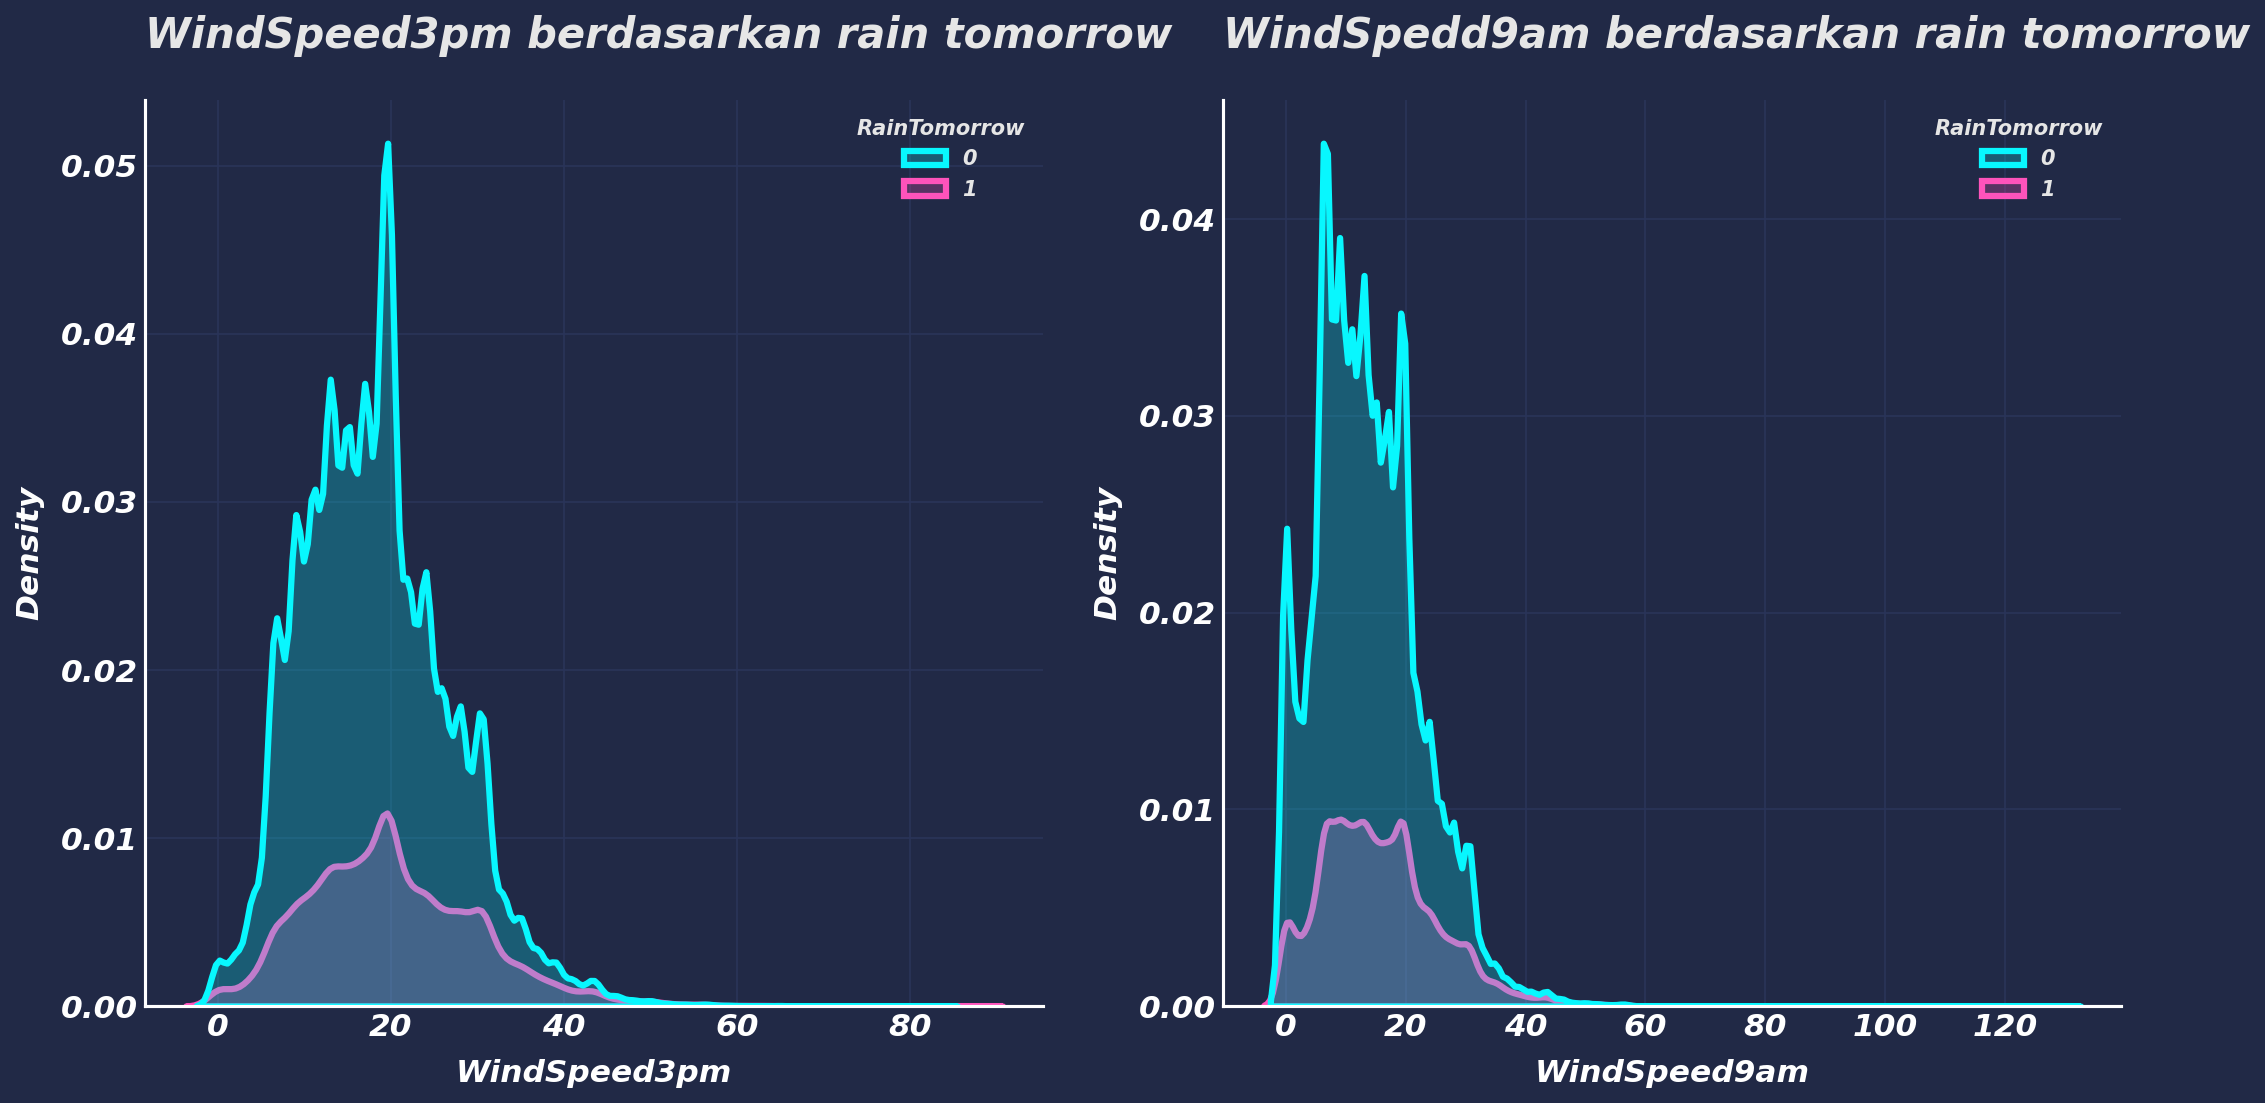

In [102]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#windspeed3pm
plt.subplot(121) 
sns.kdeplot(df.WindSpeed3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("WindSpeed3pm berdasarkan rain tomorrow")

#windspeed9am
plt.subplot(122) 
sns.kdeplot(df.WindSpeed9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("WindSpedd9am berdasarkan rain tomorrow")


In [103]:
df.groupby("RainTomorrow")["WindSpeed3pm", "WindSpeed9am"].mean()

WindSpeed3pm  WindSpeed9am
RainTomorrow                            
0                18.222804     13.567314
1                20.078509     15.508577

In [104]:
# fillna with bfill
df["WindSpeed3pm"].fillna(method="bfill", inplace=True)
df["WindSpeed9am"].fillna(method="bfill", inplace=True)


### humidity9am & humidity3pm

Humidity3pm skew: 0.034515442931485785
Humidity3pm Kurt: -0.511101194040585

Humidity9am skew: -0.48282077354746405
Humidity9am Kurt: -0.03924572082998923


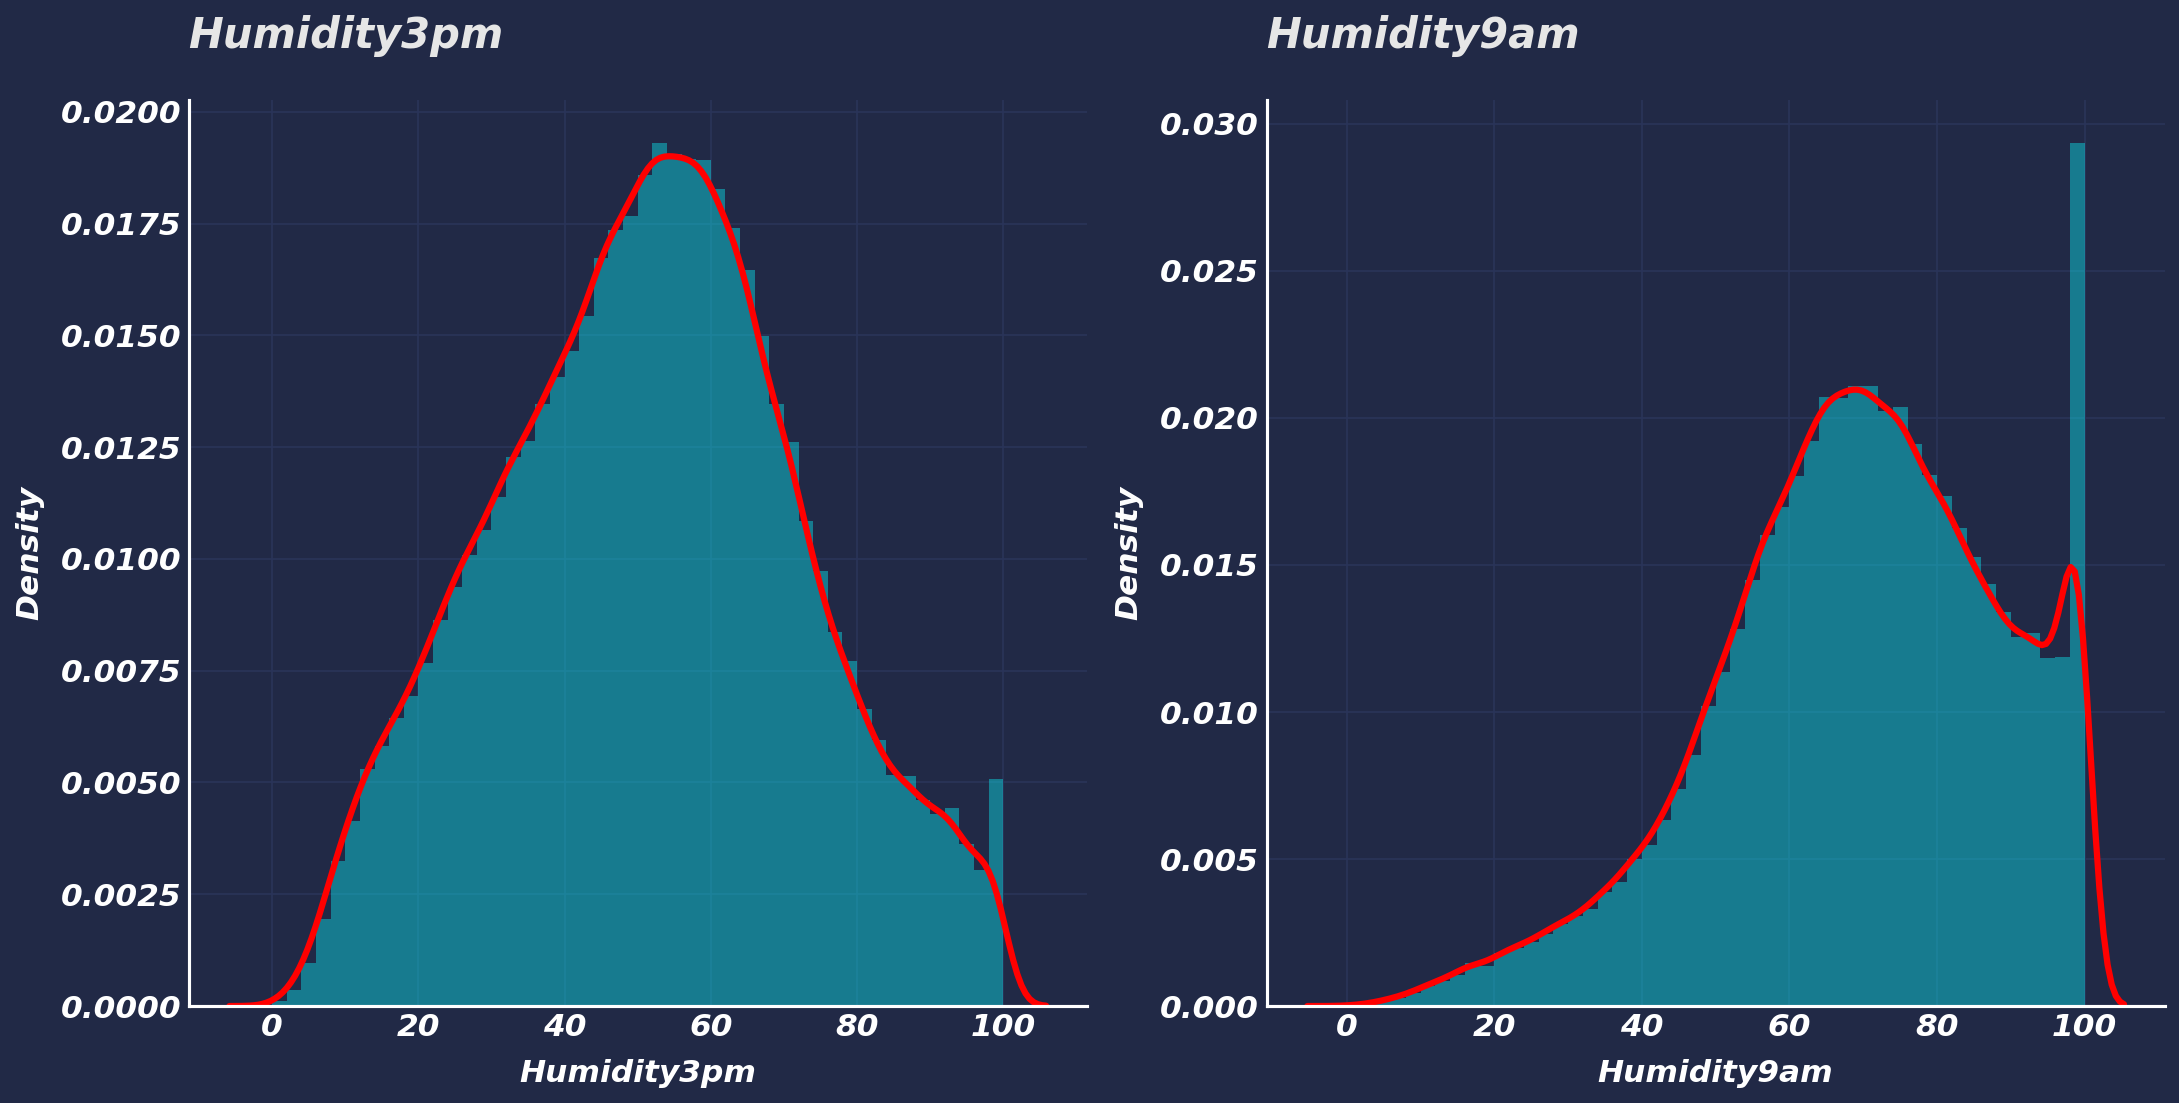

In [105]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#humidity3pm
plt.subplot(121) 
sns.distplot(df.Humidity3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Humidity3pm")

#Humidity9pm
plt.subplot(122) 
sns.distplot(df.Humidity9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Humidity9am")


print(f"Humidity3pm skew: {df.Humidity3pm.skew()}")
print(f"Humidity3pm Kurt: {df.Humidity3pm.kurt()}")
print("") 
print(f"Humidity9am skew: {df.Humidity9am.skew()}")
print(f"Humidity9am Kurt: {df.Humidity9am.kurt()}")

Text(0.0, 1.0, 'Humidity9am berdasarkan rain tomorrow')

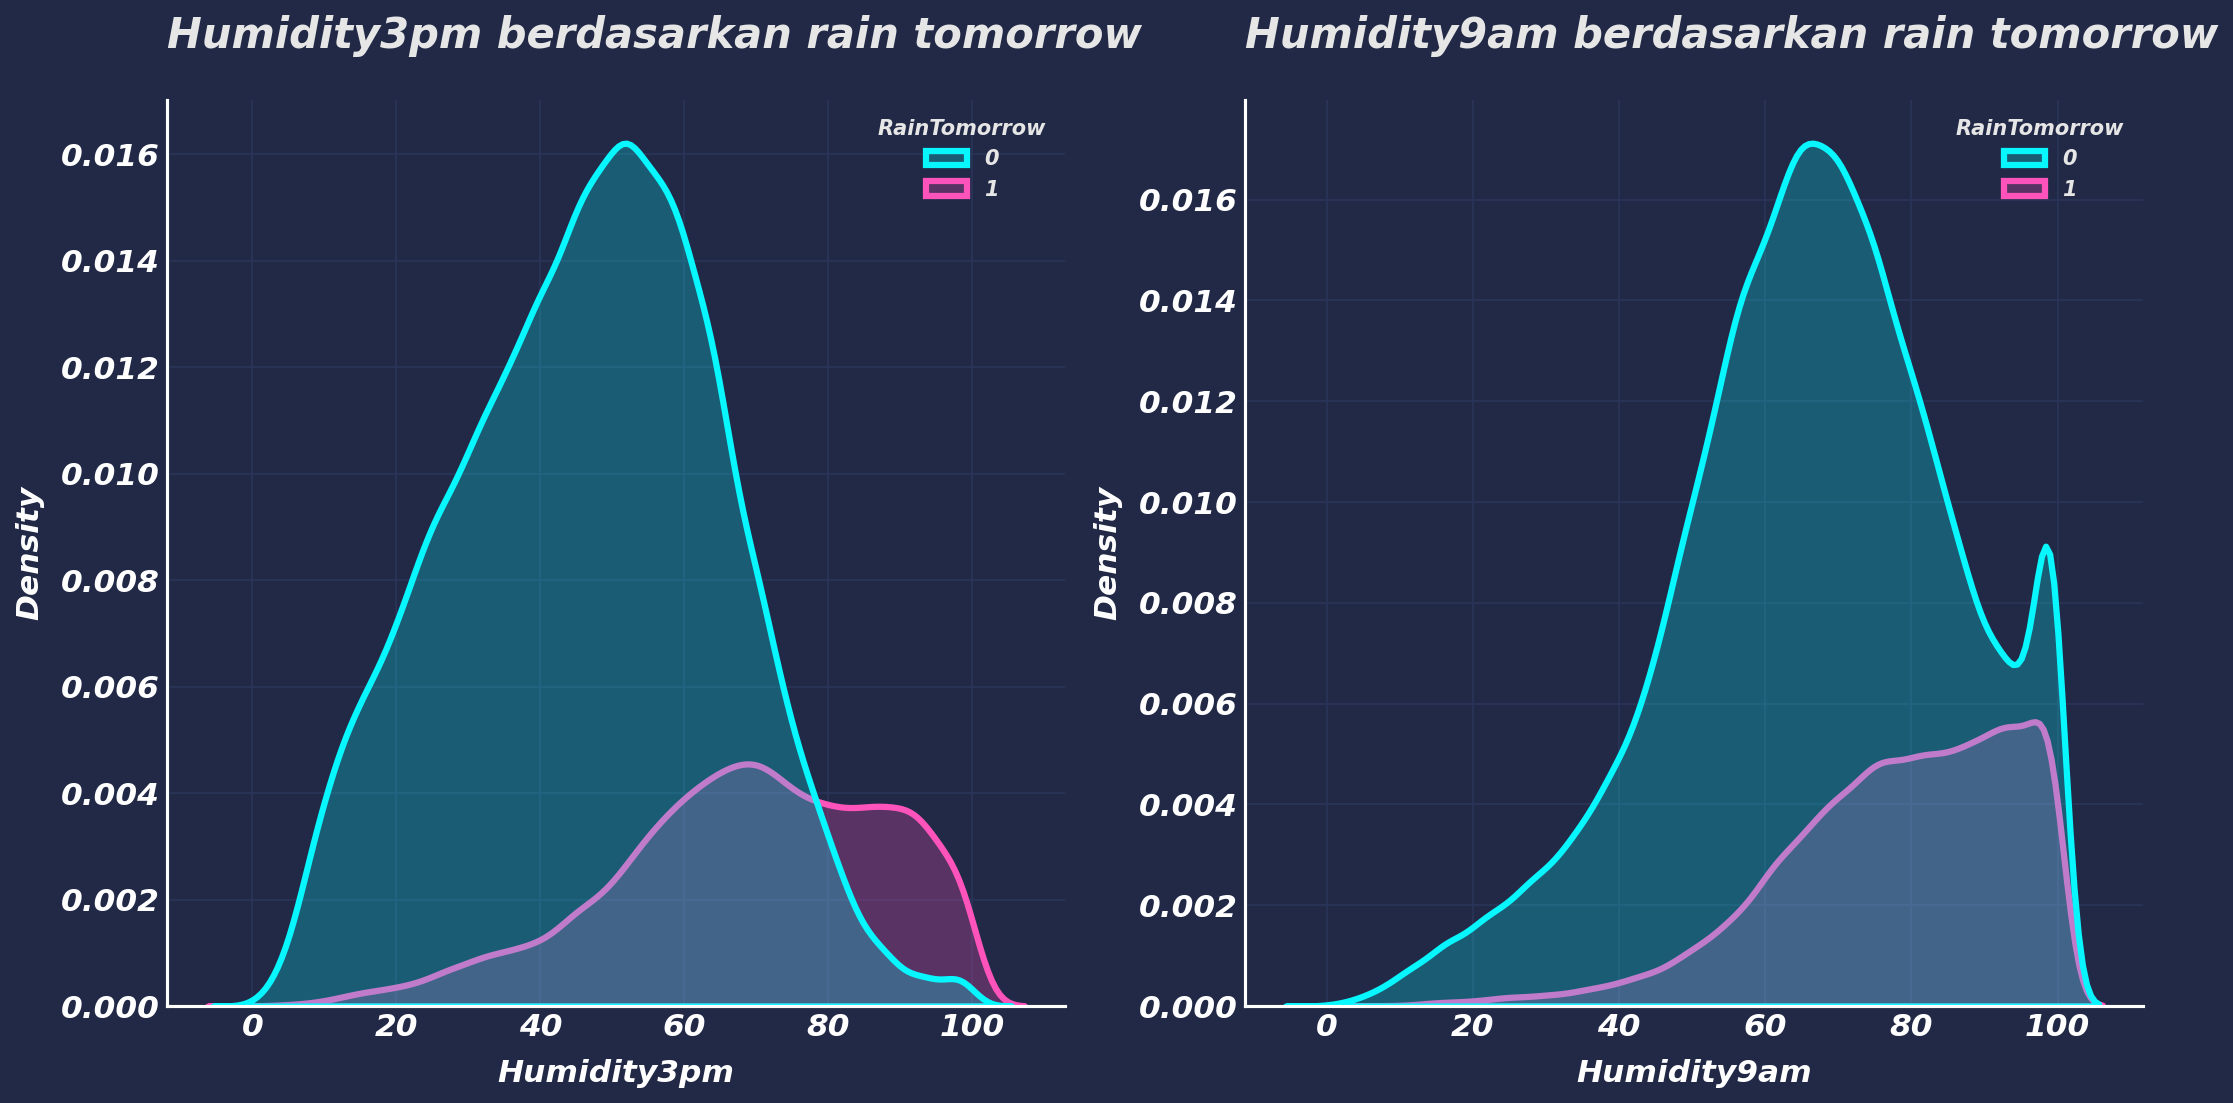

In [106]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Humidity3pm
plt.subplot(121) 
sns.kdeplot(df.Humidity3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Humidity3pm berdasarkan rain tomorrow")

#Humidity9am
plt.subplot(122) 
sns.kdeplot(df.Humidity9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Humidity9am berdasarkan rain tomorrow")


Text(0.0, 1.0, 'Humidity9am berdasarkan rain tomorrow')

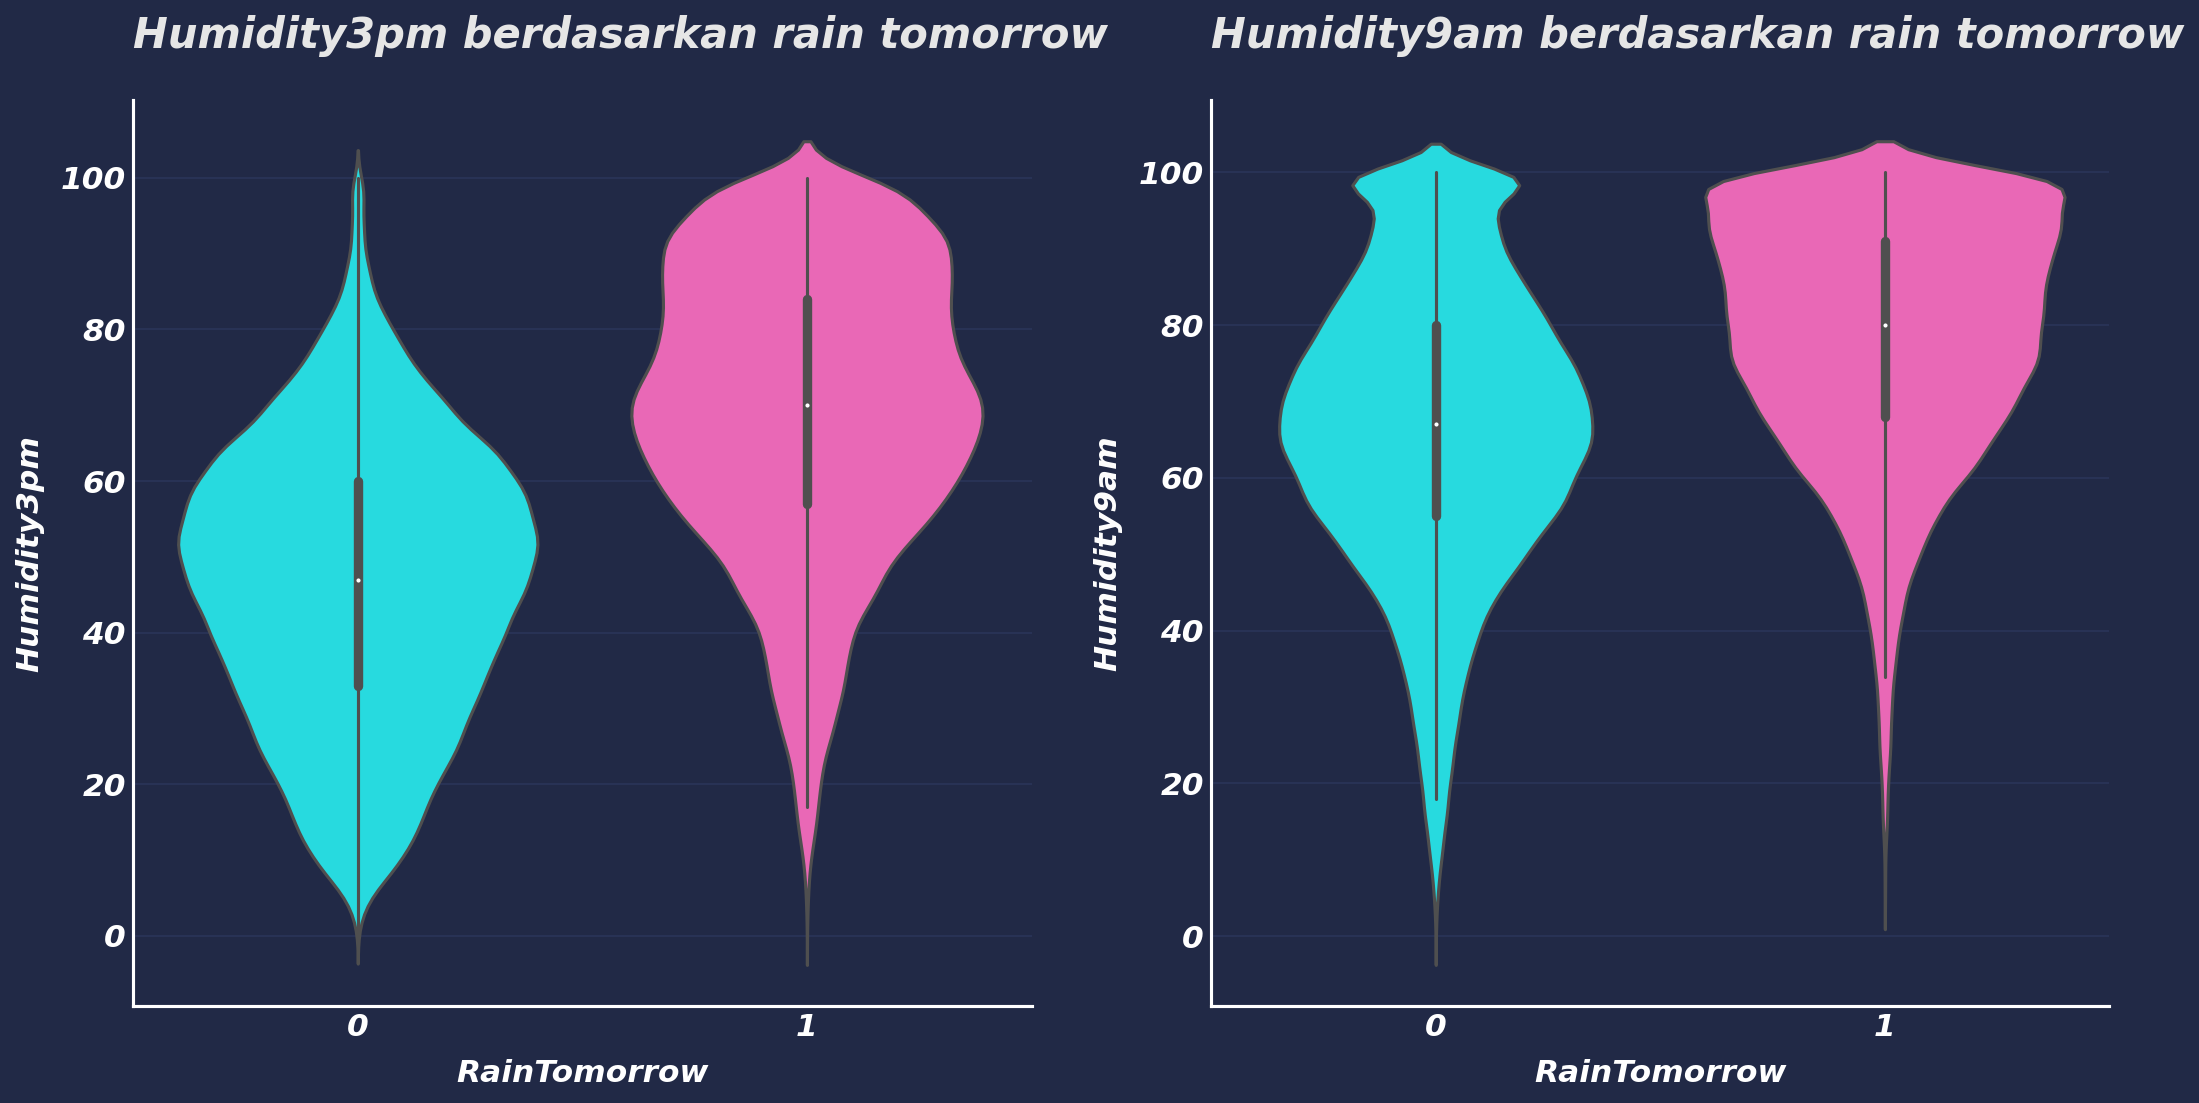

In [107]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Humidity3pm
plt.subplot(121) 
sns.violinplot(y = df.Humidity3pm, x=df.RainTomorrow) 
plt.title("Humidity3pm berdasarkan rain tomorrow")

#Humidity9am
plt.subplot(122) 
sns.violinplot(y= df.Humidity9am, x=df.RainTomorrow) 
plt.title("Humidity9am berdasarkan rain tomorrow")


In [108]:
df.groupby("RainTomorrow")["Humidity3pm", "Humidity9am"].mean()

Humidity3pm  Humidity9am
RainTomorrow                          
0               46.510625    66.217573
1               68.800019    77.983314

In [109]:
#fillna humidity3pm berdasarkan humidity 9am
df["Humidity3pm"] = df.groupby("Humidity9am")["Humidity3pm"].apply(lambda x: x.fillna(x.median())) 
df["Humidity3pm"].fillna(method="bfill", inplace=True) 

In [110]:
#fillna humidity9am berdasarkan humidity 3pm
df["Humidity9am"] = df.groupby("Humidity3pm")["Humidity9am"].apply(lambda x: x.fillna(x.median()))
df["Humidity9am"].fillna(method="bfill", inplace=True) 

In [111]:
df.groupby("RainTomorrow")["Humidity3pm", "Humidity9am"].mean()

Humidity3pm  Humidity9am
RainTomorrow                          
0               46.574205    66.214987
1               68.488691    77.948113

### pressure3pm & pressure9am

Pressure3pm skew: -0.04619761861409882
Pressure3pm Kurt: 0.13252078653819854

Pressure9am skew: -0.0962108938783355
Pressure9am Kurt: 0.23619998253949115


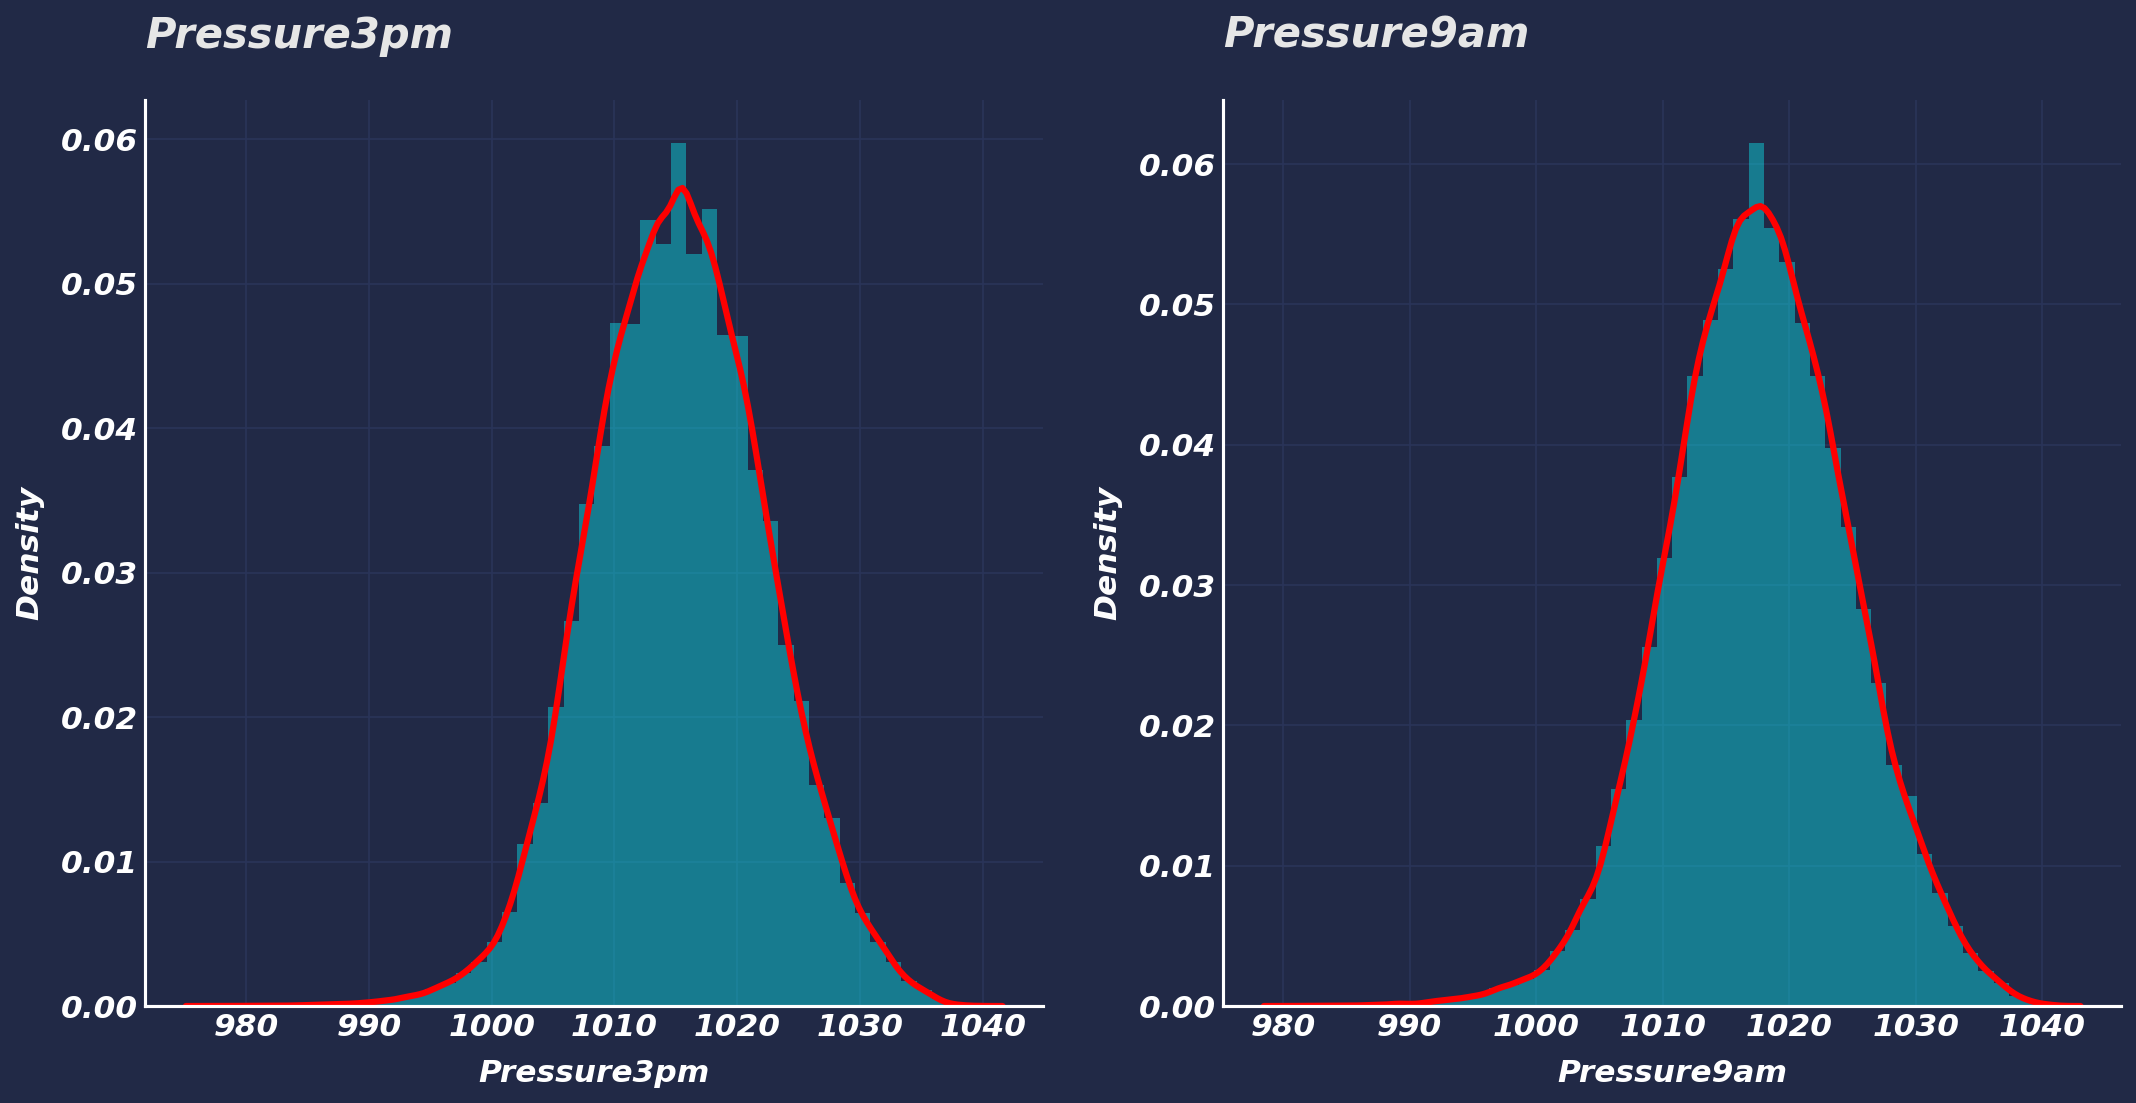

In [112]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure3pm
plt.subplot(121) 
sns.distplot(df.Pressure3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure3pm")

#pressure9am
plt.subplot(122) 
sns.distplot(df.Pressure9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure9am")


print(f"Pressure3pm skew: {df.Pressure3pm.skew()}")
print(f"Pressure3pm Kurt: {df.Pressure3pm.kurt()}")
print("") 
print(f"Pressure9am skew: {df.Pressure9am.skew()}")
print(f"Pressure9am Kurt: {df.Pressure9am.kurt()}")

Text(0.0, 1.0, 'Pressure9am berdasarkan rain tomorrow')

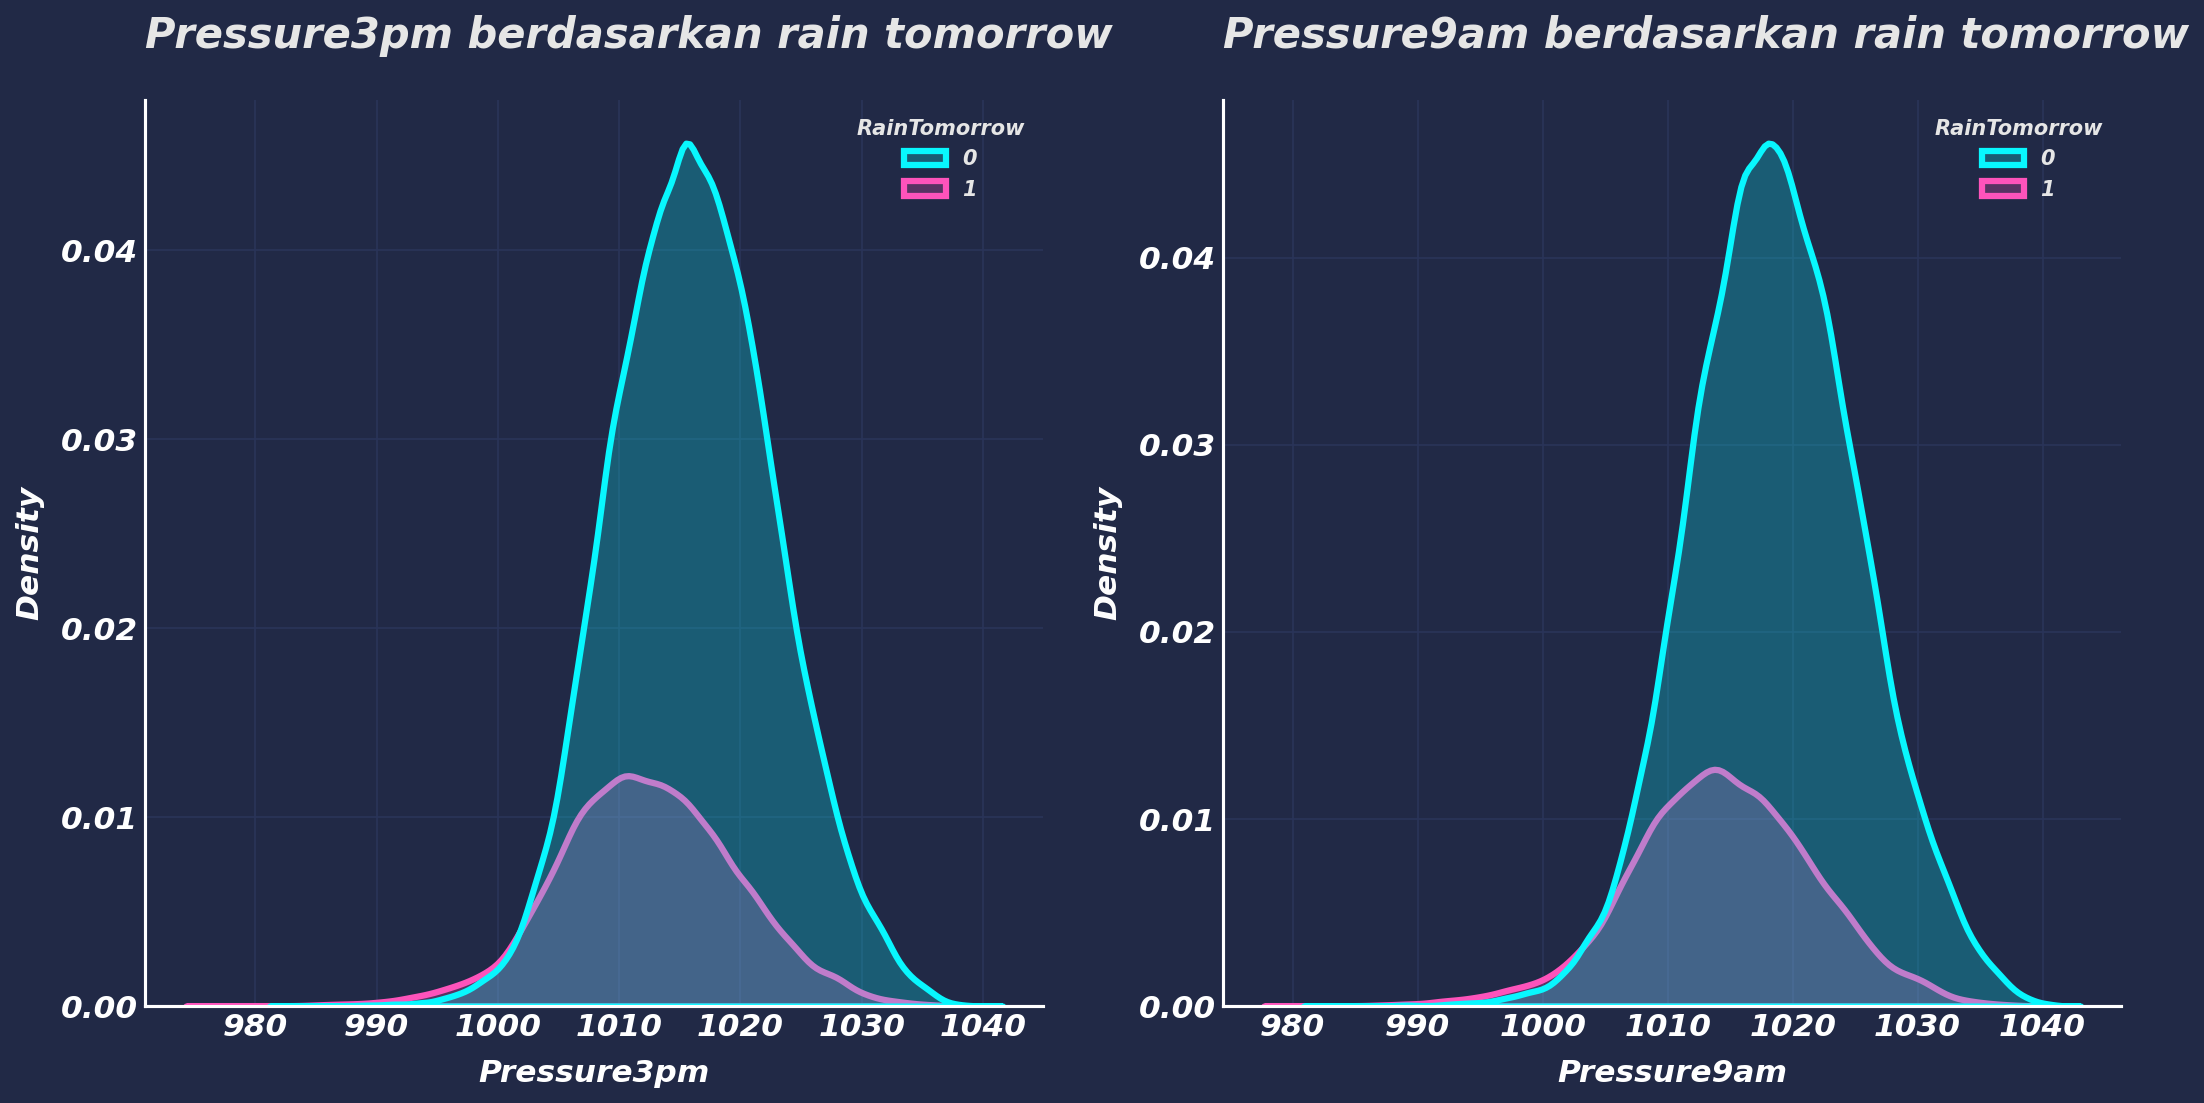

In [113]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure3pm
plt.subplot(121) 
sns.kdeplot(df.Pressure3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Pressure3pm berdasarkan rain tomorrow")

#Pressure9am
plt.subplot(122) 
sns.kdeplot(df.Pressure9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Pressure9am berdasarkan rain tomorrow")


In [114]:
df.groupby("RainTomorrow")["Pressure3pm", "Pressure9am"].mean()

Pressure3pm  Pressure9am
RainTomorrow                          
0             1016.113587  1018.595599
1             1012.300820  1014.400000

In [115]:
# buat feature baru "rata² pressure" 9am&3pm karena tidak ada perbedaan antara 9am&3pm

pressure = df[["Pressure3pm","Pressure9am"]].mean(axis=1)

In [116]:
pressure

0         1007.40
1         1009.20
2         1008.15
3         1015.20
4         1008.40
           ...   
145454    1022.95
145455    1022.45
145456    1021.30
145457    1018.90
145458    1017.95
Length: 142193, dtype: float64

In [117]:
pressure.isnull().sum()

13791

In [118]:
pressure.describe() 

count    128402.000000
mean       1016.455480
std           7.002327
min         979.750000
25%        1011.700000
50%        1016.400000
75%        1021.150000
max        1040.050000
dtype: float64

Pressure skew: -0.050325797706756194
Pressure Kurt: 0.15944241390849


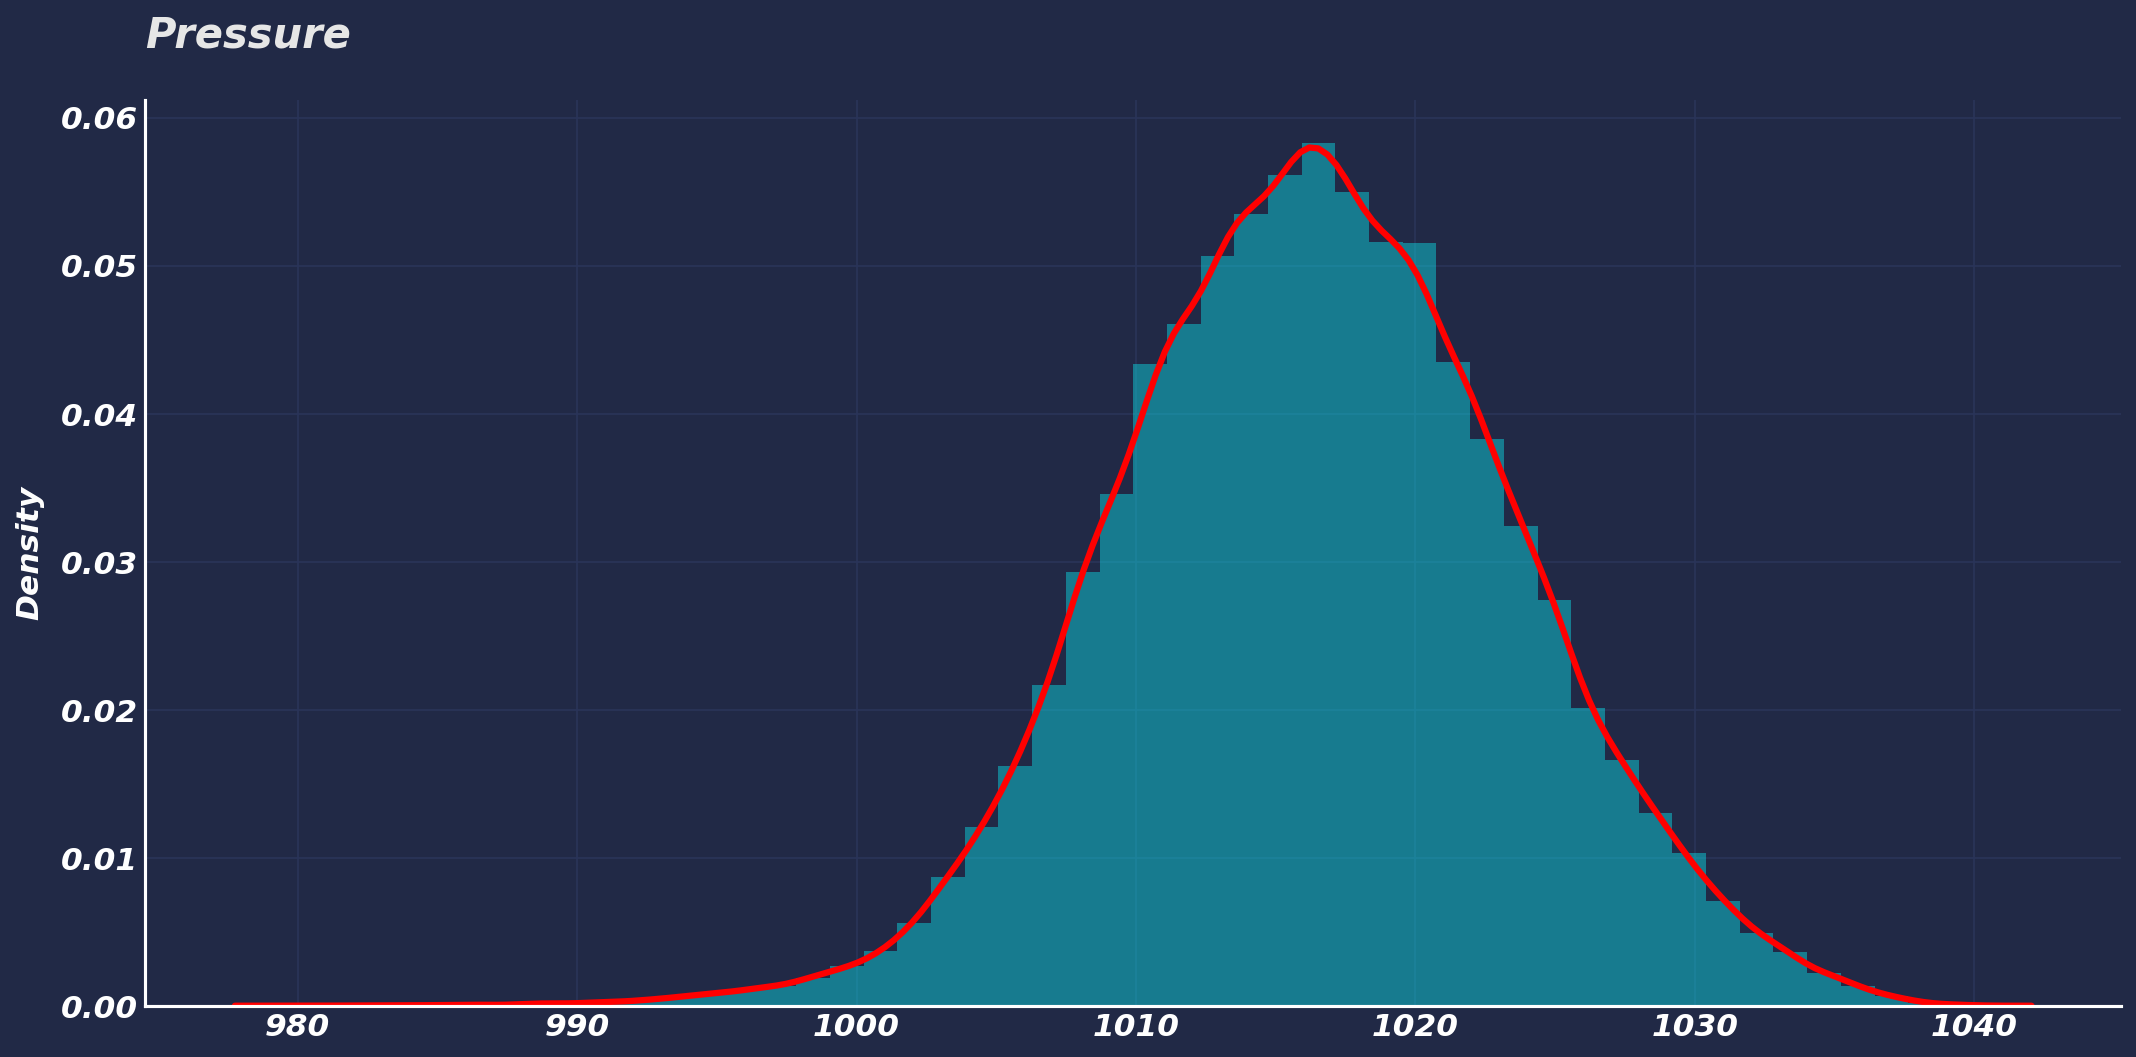

In [119]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressures
sns.distplot(pressure, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Pressure")

print(f"Pressure skew: {pressure.skew()}")
print(f"Pressure Kurt: {pressure.kurt()}")

Text(0.0, 1.0, 'Pressure berdasarkan rain tomorrow')

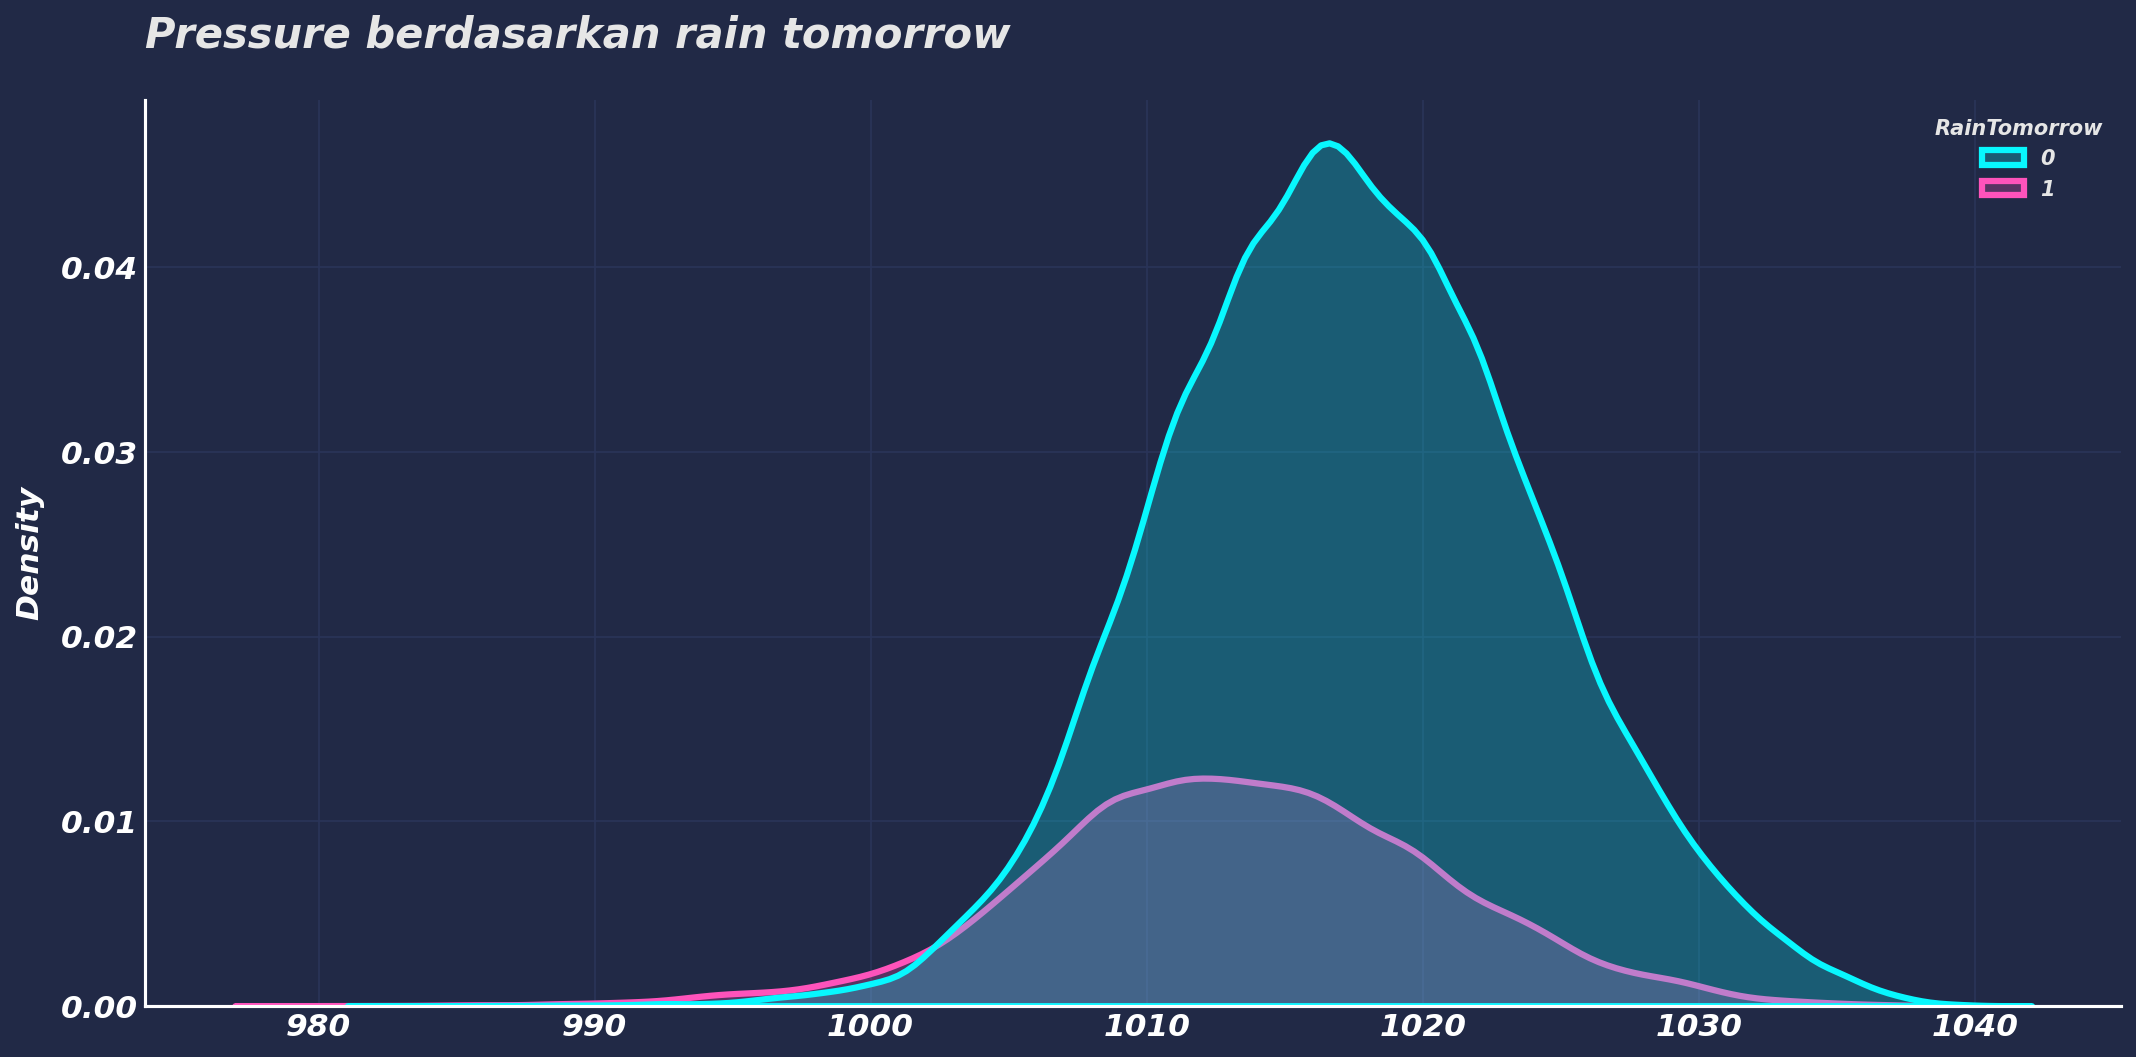

In [120]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#pressure
sns.kdeplot(pressure, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Pressure berdasarkan rain tomorrow")


In [121]:
df["Pressure"] = df[["Pressure3pm","Pressure9am"]].mean(axis=1) 

In [122]:
# fillna pressure berdasarkan windgustspeed

df["Pressure"] = df.groupby("WindGustSpeed")["Pressure"].apply(lambda x:  x.fillna(x.median())) 

In [123]:
#after fillna 

df.groupby("RainTomorrow")["Pressure"].mean().to_frame()

Pressure
RainTomorrow             
0             1017.329238
1             1013.600167

### Cloud9am & Cloud3pm

Cloud3pm skew: -0.22409236486115175
Cloud3pm Kurt: -1.4579325833857457

Cloud9am skew: -0.22428553889493957
Cloud9am Kurt: -1.5411594003596274


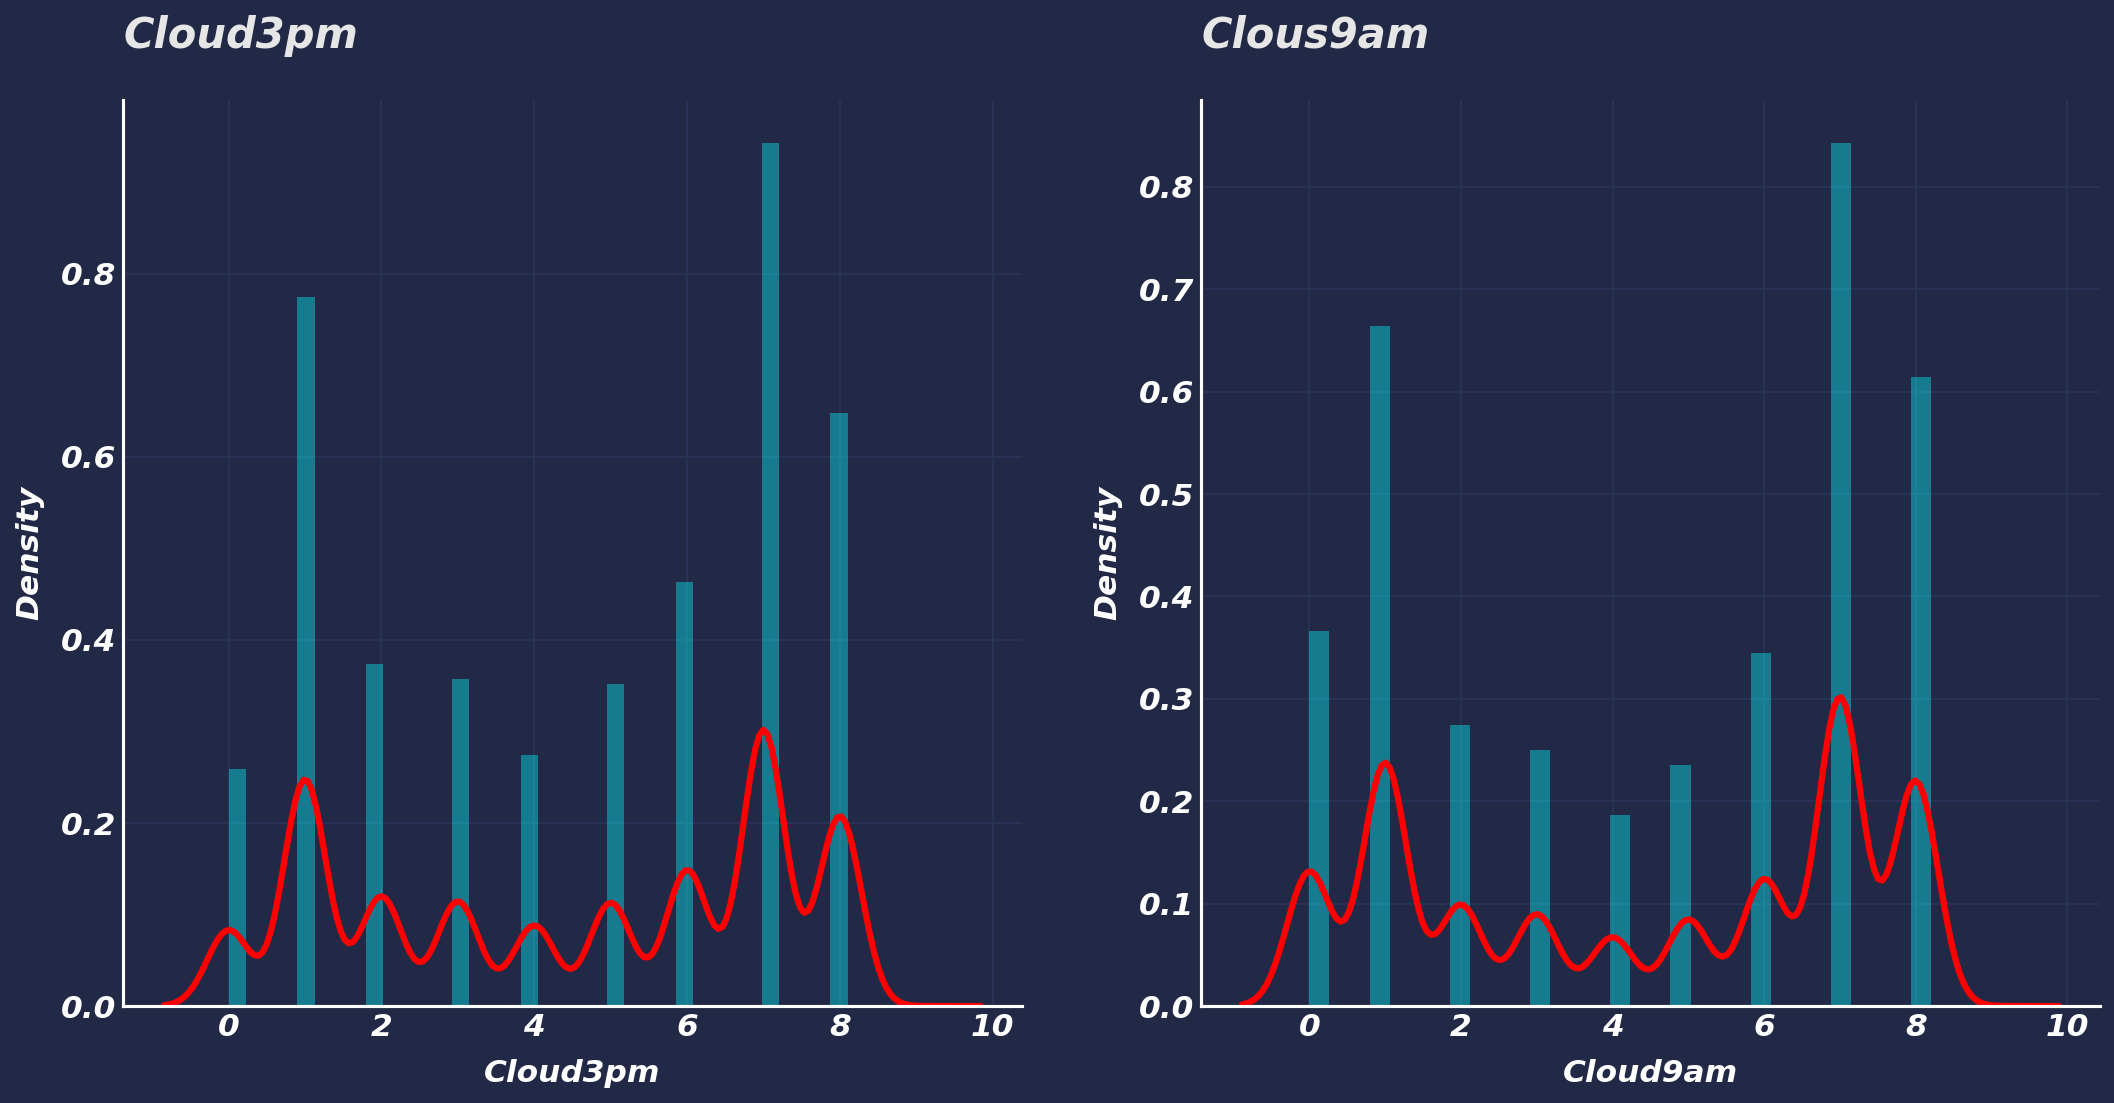

In [124]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud3pm
plt.subplot(121) 
sns.distplot(df.Cloud3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Cloud3pm")

#Cloud9am
plt.subplot(122) 
sns.distplot(df.Cloud9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Clous9am")


print(f"Cloud3pm skew: {df.Cloud3pm.skew()}")
print(f"Cloud3pm Kurt: {df.Cloud3pm.kurt()}")
print("") 
print(f"Cloud9am skew: {df.Cloud9am.skew()}")
print(f"Cloud9am Kurt: {df.Cloud9am.kurt()}")

Text(0.0, 1.0, 'Cloud 9am berdasarkan rain tomorrow')

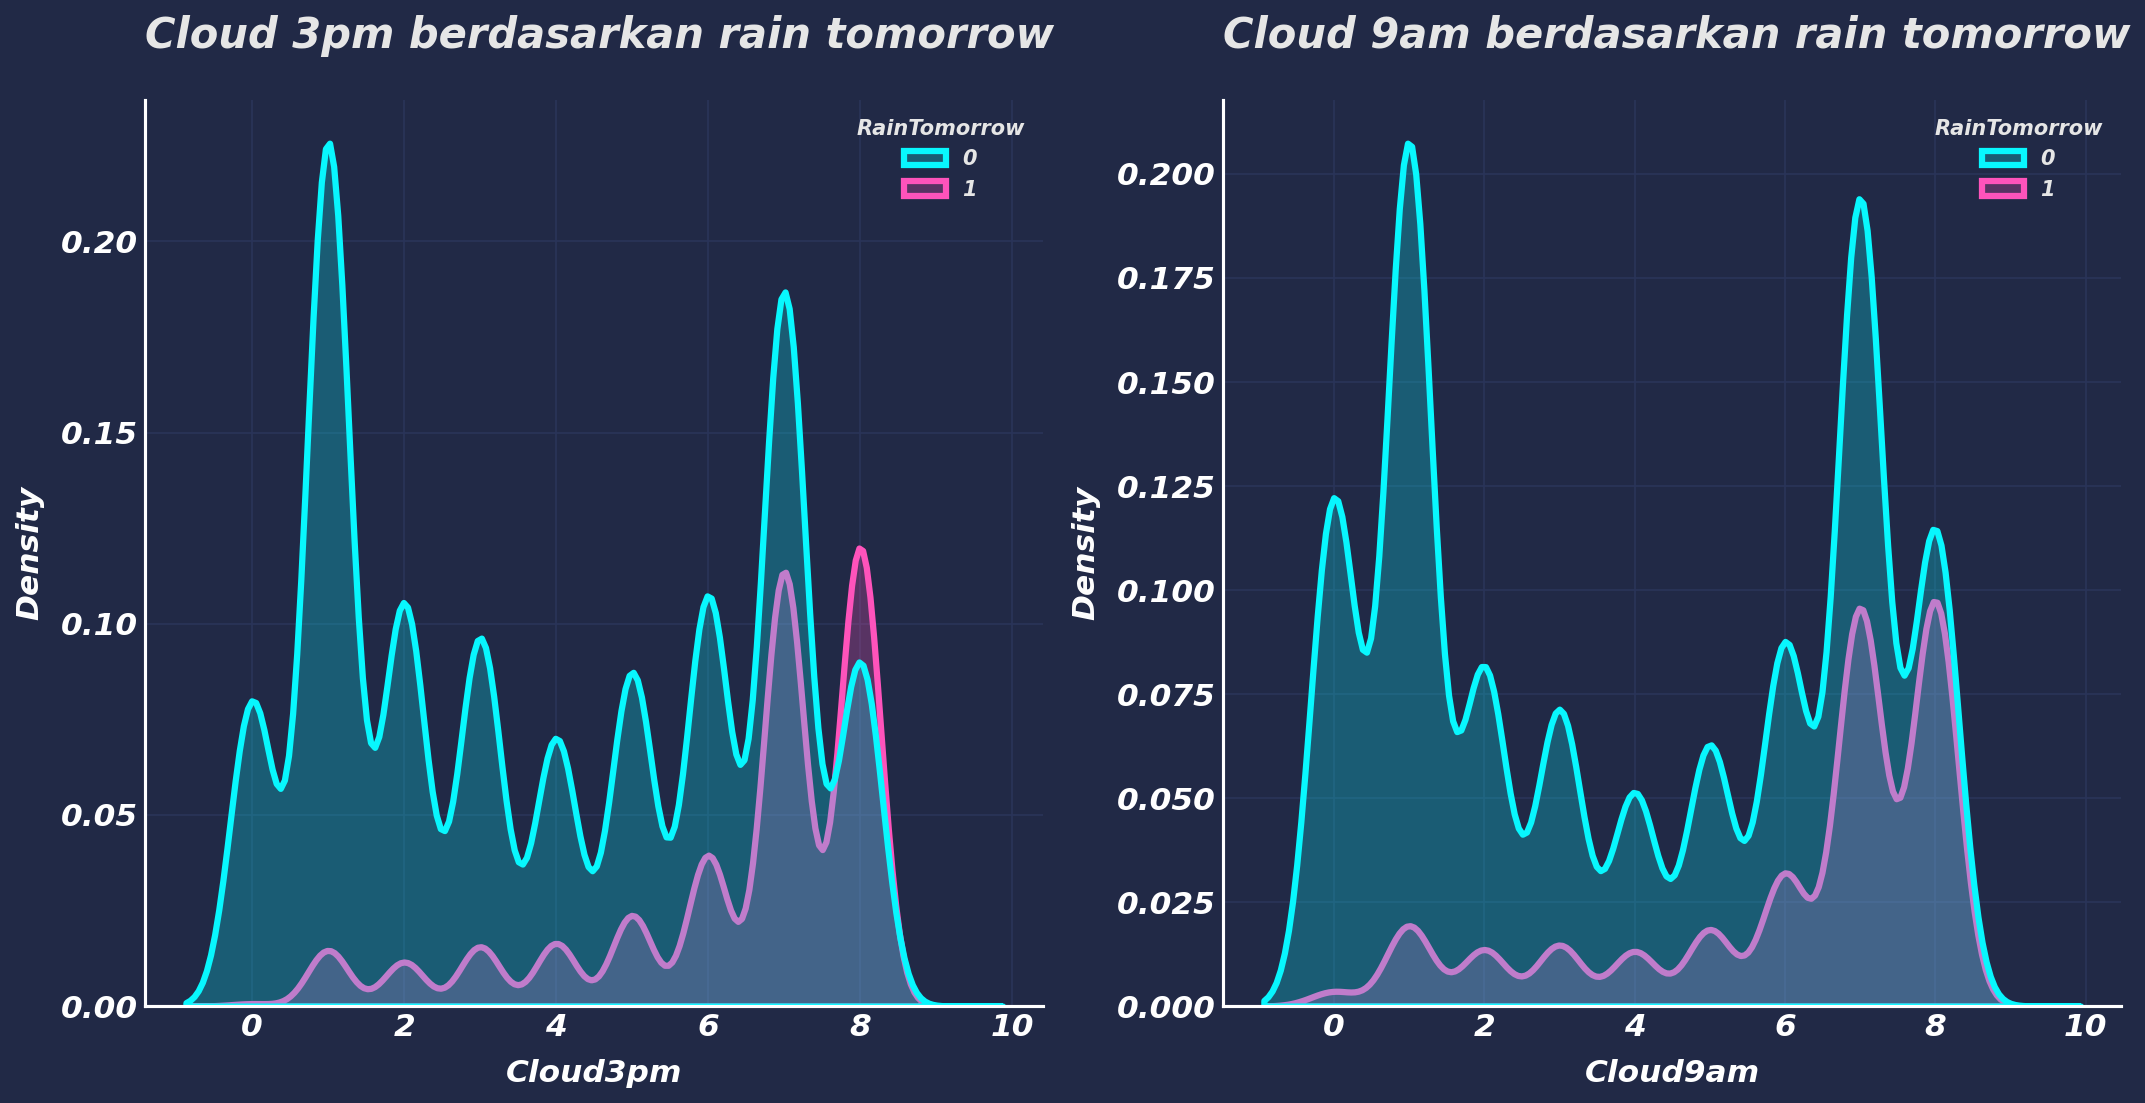

In [125]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud3pm
plt.subplot(121) 
sns.kdeplot(df.Cloud3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Cloud 3pm berdasarkan rain tomorrow")

#Cloud9am
plt.subplot(122) 
sns.kdeplot(df.Cloud9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Cloud 9am berdasarkan rain tomorrow")


In [126]:
df.groupby("RainTomorrow")["Cloud3pm","Cloud9am"].mean()

Cloud3pm  Cloud9am
RainTomorrow                    
0             3.921896  3.932282
1             6.360065  6.099990

In [127]:
# satukan cloud 3pm & 9am menjadi rata² cloud 
#karena distribution & distribution berdasatkan target yang sama 

Cloud = df[["Cloud3pm", "Cloud9am"]].mean(axis=1) 

In [128]:
Cloud.describe()

count    92516.000000
mean         4.461558
std          2.562633
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
dtype: float64

In [129]:
Cloud.isnull().sum()

49677

Cloud skew: -0.22659396175250626
Cloud Kurt: -1.2924549810042611


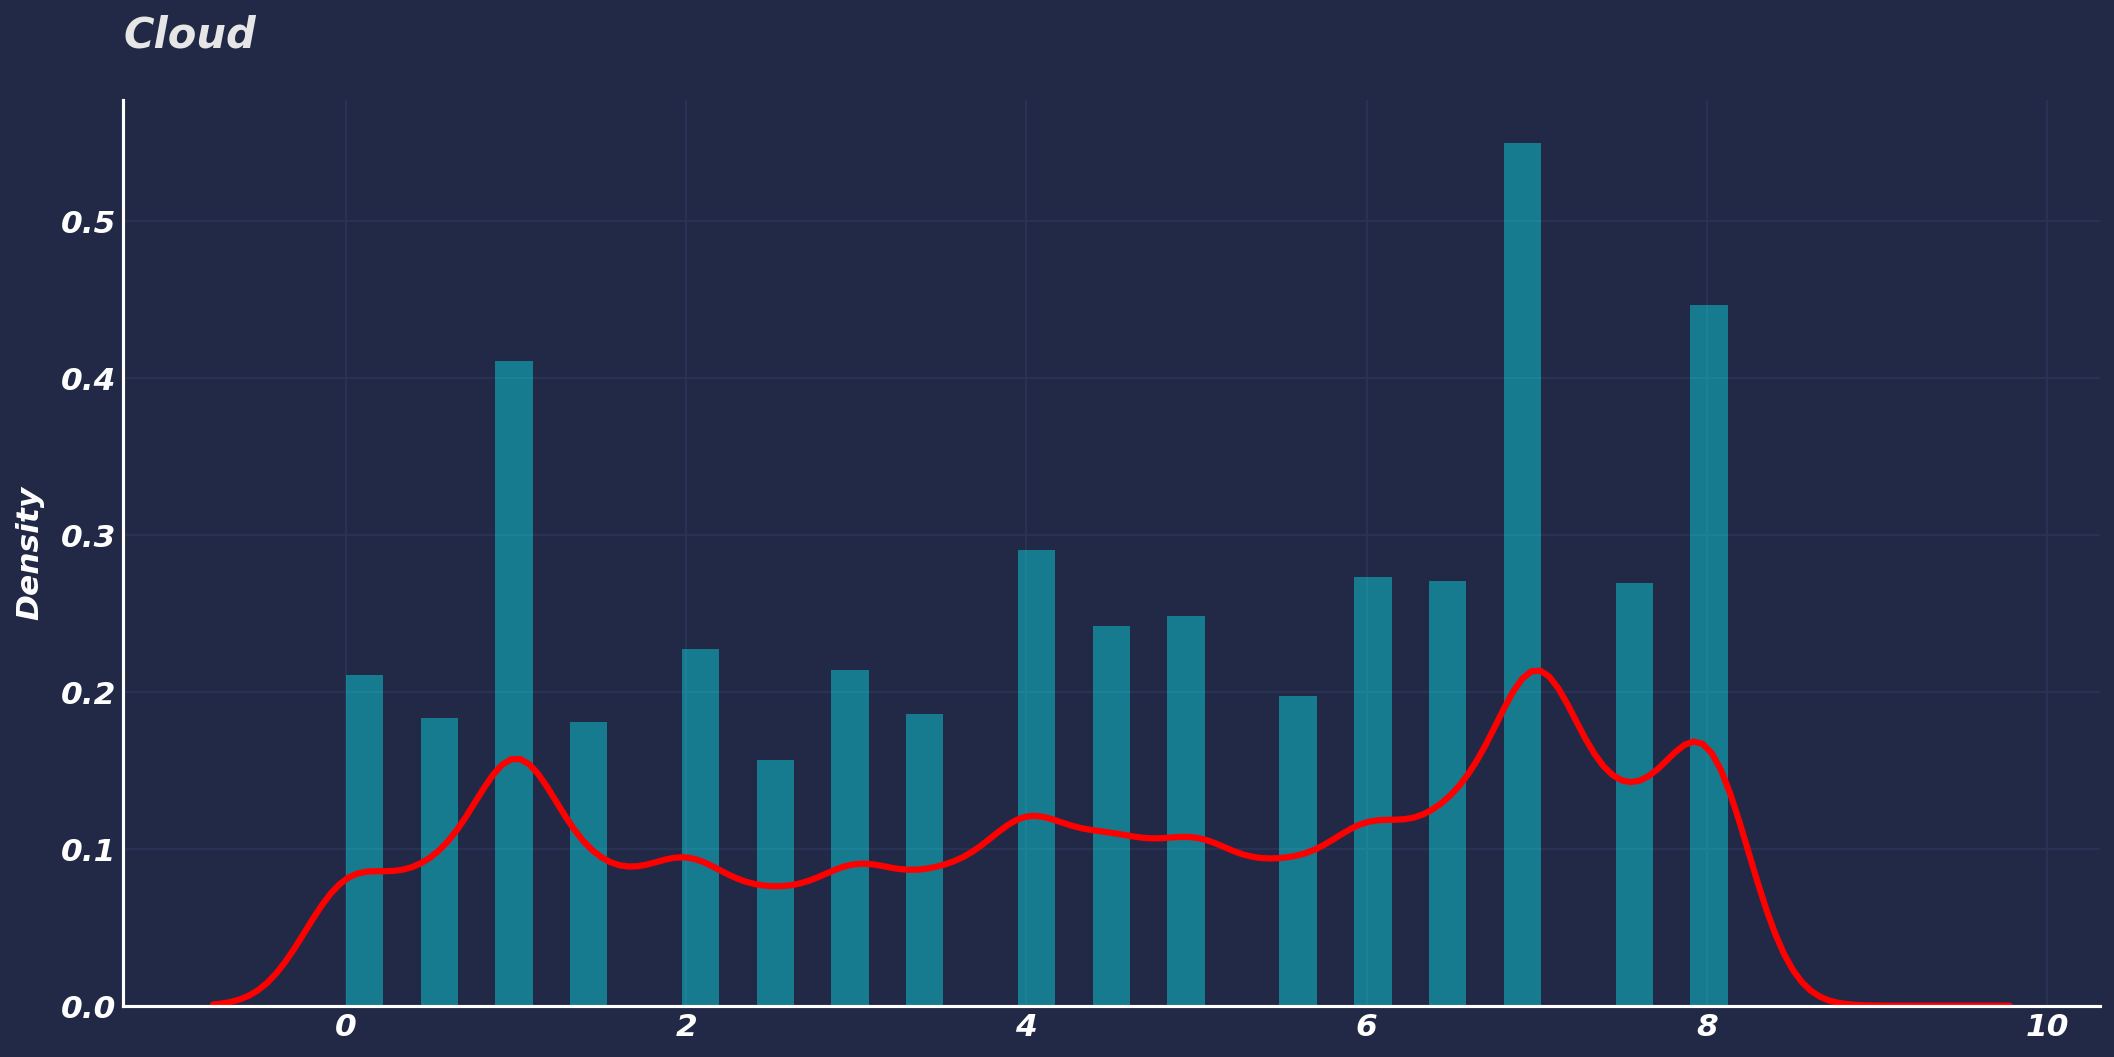

In [130]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud
sns.distplot(Cloud, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Cloud")

print(f"Cloud skew: {Cloud.skew()}")
print(f"Cloud Kurt: {Cloud.kurt()}")

Text(0.0, 1.0, 'Cloud berdasarkan rain tomorrow')

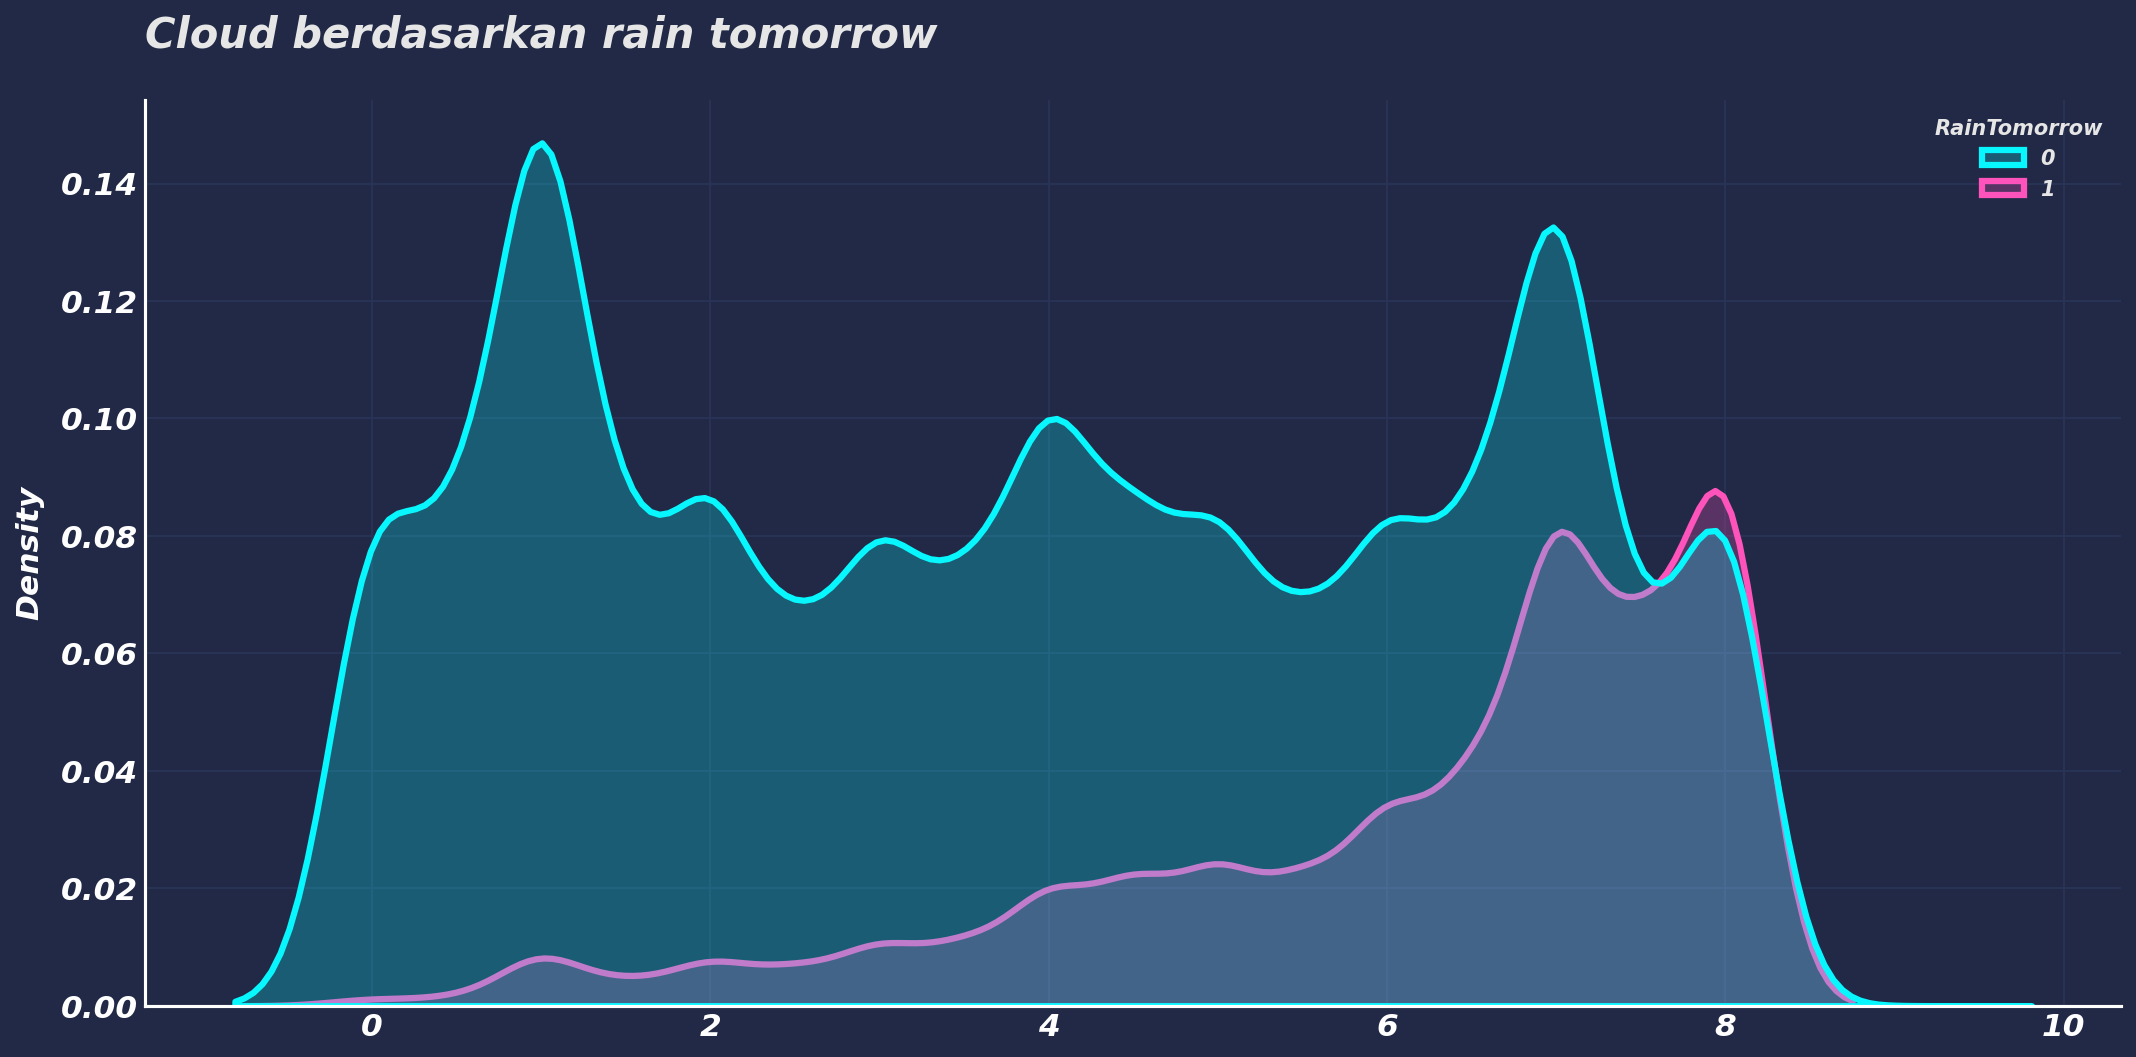

In [131]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Cloud
sns.kdeplot(Cloud, hue=df.RainTomorrow, linewidth=3, shade=True) 
plt.title("Cloud berdasarkan rain tomorrow")


In [154]:
df["Cloud"] = df[["Cloud3pm","Cloud9am"]].mean(axis=1)

In [155]:
df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

Cloud
RainTomorrow          
0             3.936669
1             6.201941

In [158]:
# fillna cloud berdasarkan humidity 3pm

df["Cloud"] = df.groupby("Humidity3pm")["Cloud"].apply(lambda x: x.fillna(x.median())) 

In [159]:
df.Cloud.isnull().sum()

0

In [160]:
#after fillna 

df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

Cloud
RainTomorrow          
0             4.006776
1             6.165315

### temp3pm & temp9am

Temp3pm skew: 0.2400541926656679
Temp3pm Kurt: -0.1464607023904354

Temp9am skew: 0.09138682047291519
Temp9am Kurt: -0.3491547666322461


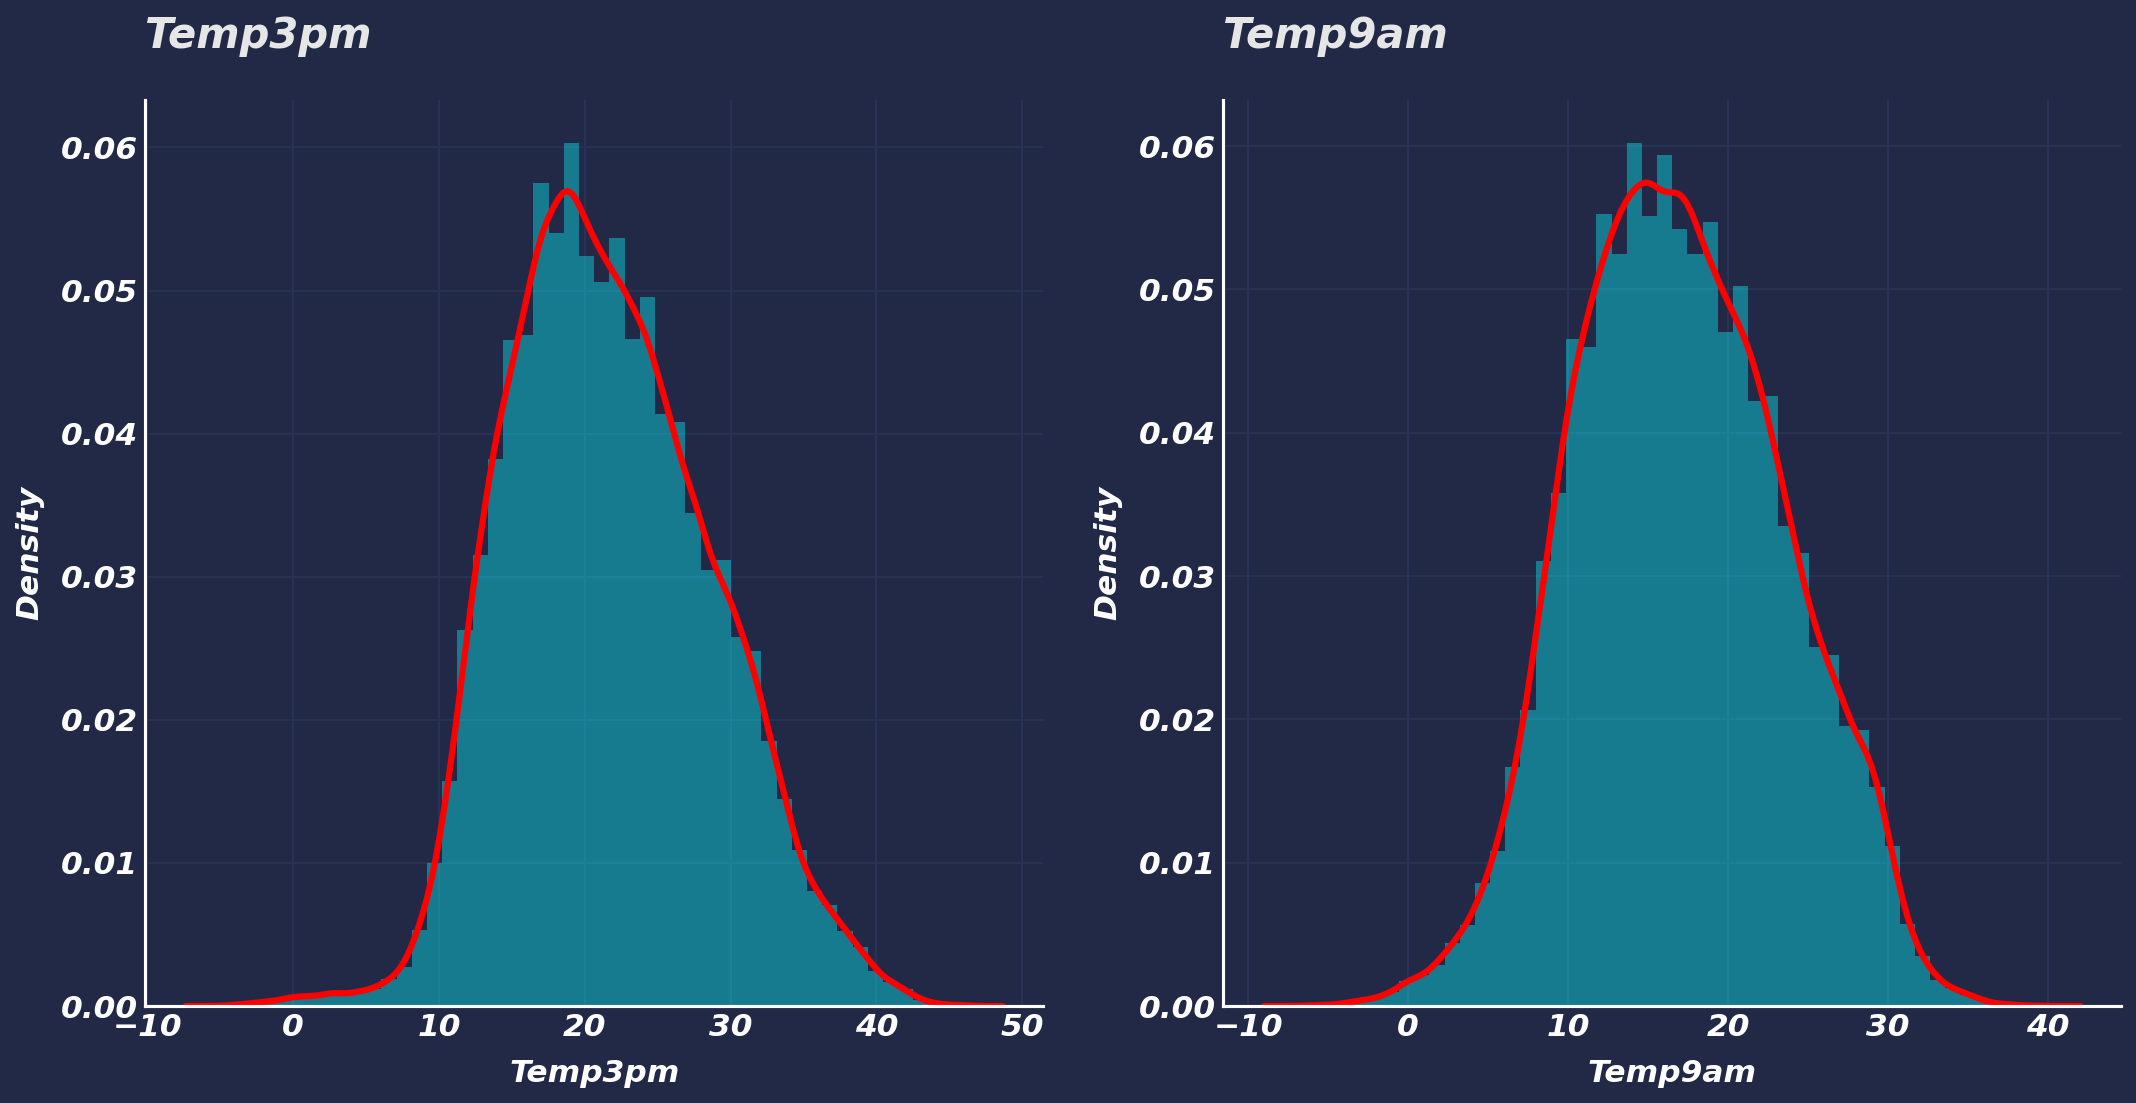

In [161]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Temp3pm
plt.subplot(121) 
sns.distplot(df.Temp3pm, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Temp3pm")

#Temp9am
plt.subplot(122) 
sns.distplot(df.Temp9am, kde_kws={"linewidth": 3,"color": "red"})
plt.title("Temp9am")


print(f"Temp3pm skew: {df.Temp3pm.skew()}")
print(f"Temp3pm Kurt: {df.Temp3pm.kurt()}")
print("") 
print(f"Temp9am skew: {df.Temp9am.skew()}")
print(f"Temp9am Kurt: {df.Temp9am.kurt()}")

Text(0.0, 1.0, 'Temp 9am berdasarkan rain tomorrow')

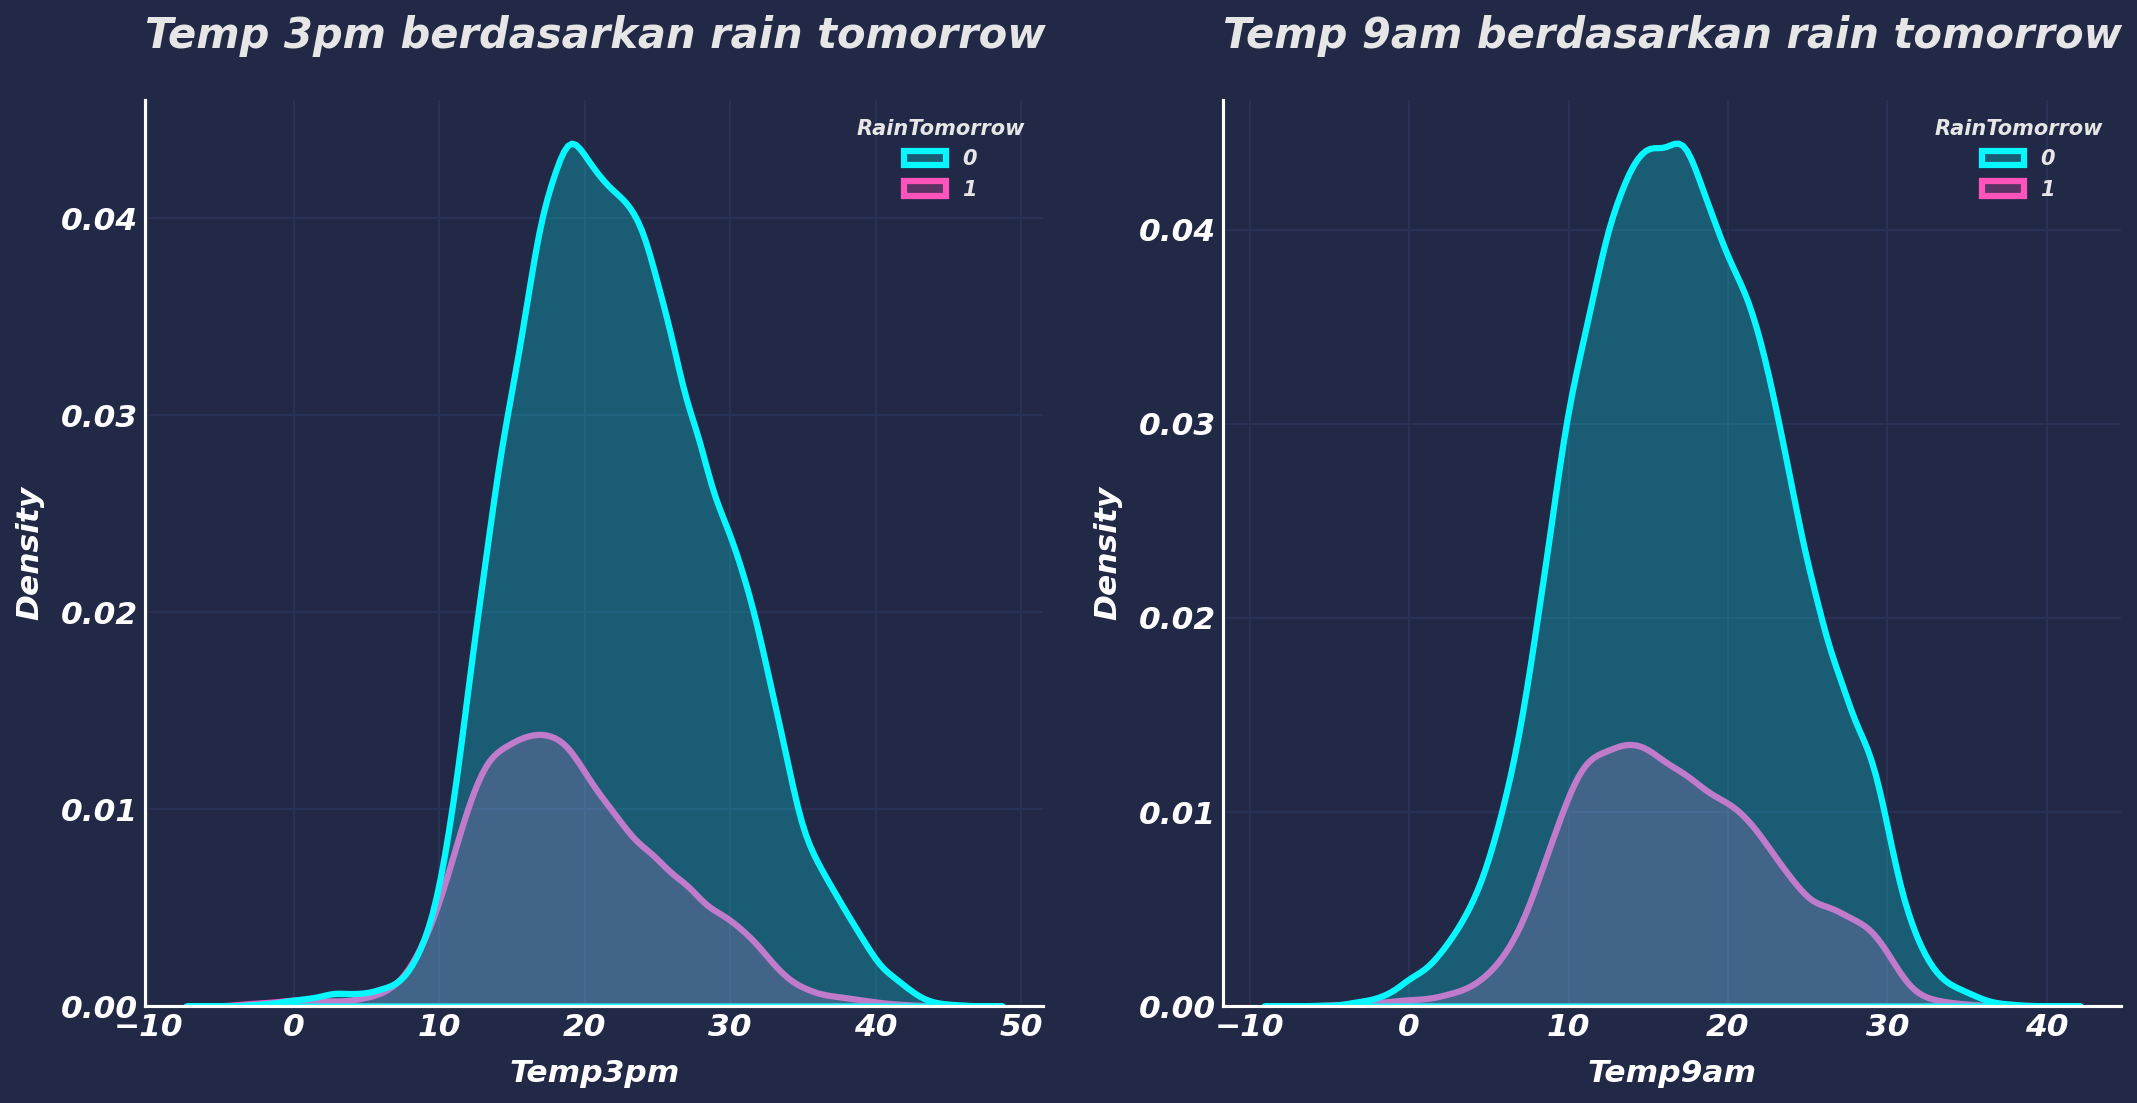

In [162]:
#fig,ax = plt.subplots(1,2,figsize=(17, 8)) 
plt.figure(figsize=(17, 8)) 

#Temp3pm
plt.subplot(121) 
sns.kdeplot(df.Temp3pm, hue=df.RainTomorrow, shade=True, linewidth=3) 
plt.title("Temp 3pm berdasarkan rain tomorrow")

#Temp9am
plt.subplot(122) 
sns.kdeplot(df.Temp9am, hue=df.RainTomorrow, shade=True,linewidth=3) 
plt.title("Temp 9am berdasarkan rain tomorrow")


In [163]:
df.groupby("RainTomorrow")["Temp3pm","Temp9am"].mean()

Temp3pm    Temp9am
RainTomorrow                      
0             22.402905  17.077001
1             19.197113  16.676598

In [165]:
# fillna temp3pm berdasarkan maxtempdf
df["Temp3pm"] = df.groupby("MaxTemp")["Temp3pm"].apply(lambda x: x.fillna(x.median())) 

In [166]:
# fillna temp9am berdasarkan mintemp
df["Temp9am"] = df.groupby("MinTemp")["Temp9am"].apply(lambda x: x.fillna(x.median())) 

### final

In [169]:
df.head()

Date Location  ...  Pressure  Cloud
0 2008-12-01   Albury  ...   1007.40    8.0
1 2008-12-02   Albury  ...   1009.20    2.0
2 2008-12-03   Albury  ...   1008.15    2.0
3 2008-12-04   Albury  ...   1015.20    1.5
4 2008-12-05   Albury  ...   1008.40    7.5

[5 rows x 28 columns]

In [170]:
#drop useless columns

usl = ["Date", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm"]
df.drop(usl, axis=1, inplace=True) 

In [172]:
# descriptive analytics of nukerical features
df.describe() 

MinTemp  ...          Cloud
count  142193.000000  ...  142193.000000
mean       12.185267  ...       4.490680
std         6.405691  ...       2.354432
min        -8.500000  ...       0.000000
25%         7.600000  ...       2.500000
50%        12.000000  ...       4.500000
75%        16.800000  ...       6.500000
max        33.900000  ...       9.000000

[8 rows x 14 columns]

In [173]:
# descriptive analytics of categoricala features
df.describe(exclude="number") 

Location WindGustDir  ...    date    Days
count     142193      142193  ...  142193  142193
unique        49          16  ...      31       7
top     Canberra           W  ...       1  Sunday
freq        3418       11755  ...    4688   20489

[4 rows x 9 columns]

In [175]:
df.sample(10)

Location  MinTemp  ...  Pressure  Cloud
80120       Watsonia     12.1  ...   1015.20    6.5
102614     Nuriootpa     16.4  ...   1006.20    8.0
90151         Cairns     27.5  ...   1004.05    5.0
108759        Albany     10.3  ...   1024.10    8.0
128566       Walpole     12.3  ...   1009.80    4.5
10595   CoffsHarbour      6.4  ...   1009.70    2.0
79594       Watsonia      8.7  ...   1008.10    6.5
2615          Albury      6.4  ...   1023.55    3.0
112068   Witchcliffe     10.3  ...   1012.60    4.5
13761          Moree     11.0  ...   1008.70    3.5

[10 rows x 23 columns]

In [174]:
print(df.isnull().any().sum())
print(df.duplicated().sum())
print(df.shape)

0
0
(142193, 23)


In [176]:
# make a new clean file 
df.to_csv("WeatherAUS(clean).csv",index=False)